# 2D segmentation over femur's head 

In [ ]:
!pip install torch torchvision
!pip install opencv-python-headless
!pip install albumentations
!pip install nibabel
!pip install matplotlib
!pip install Pillow
!pip install segmentation_models_pytorch

In [2]:
from analysis import *
from datasets import *
from inference import *
from metrics import *
from train import * 
from visualize import *

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

root = r"/content/drive/MyDrive/Runnare_fusco/NewPatients/NewPatients"
mean, std, im_h, im_w = [0.485, 0.456, 0.406], [0.229, 0.224, 0.225], 256, 256
trans = A.Compose([
    ToTensorV2(transpose_mask=True),
])
ds, tr_dl, val_dl, test_dl, n_cls = get_dls(root=root, transformations=trans, bs=16)

NRRD file number 1 is being converted...
NRRD file number 2 is being converted...
NRRD file number 3 is being converted...
NRRD file number 4 is being converted...
NRRD file number 5 is being converted...
NRRD file number 6 is being converted...
NRRD file number 7 is being converted...
NRRD file number 8 is being converted...
NRRD file number 9 is being converted...
NRRD file number 10 is being converted...
NRRD file number 11 is being converted...
NRRD file number 12 is being converted...
NRRD file number 13 is being converted...
NRRD file number 14 is being converted...
NRRD file number 15 is being converted...
NRRD file number 16 is being converted...
NRRD file number 17 is being converted...
NRRD file number 18 is being converted...
NRRD file number 19 is being converted...
NRRD file number 20 is being converted...
NRRD file number 21 is being converted...
NRRD file number 22 is being converted...
NRRD file number 23 is being converted...
NRRD file number 24 is being converted...
N

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


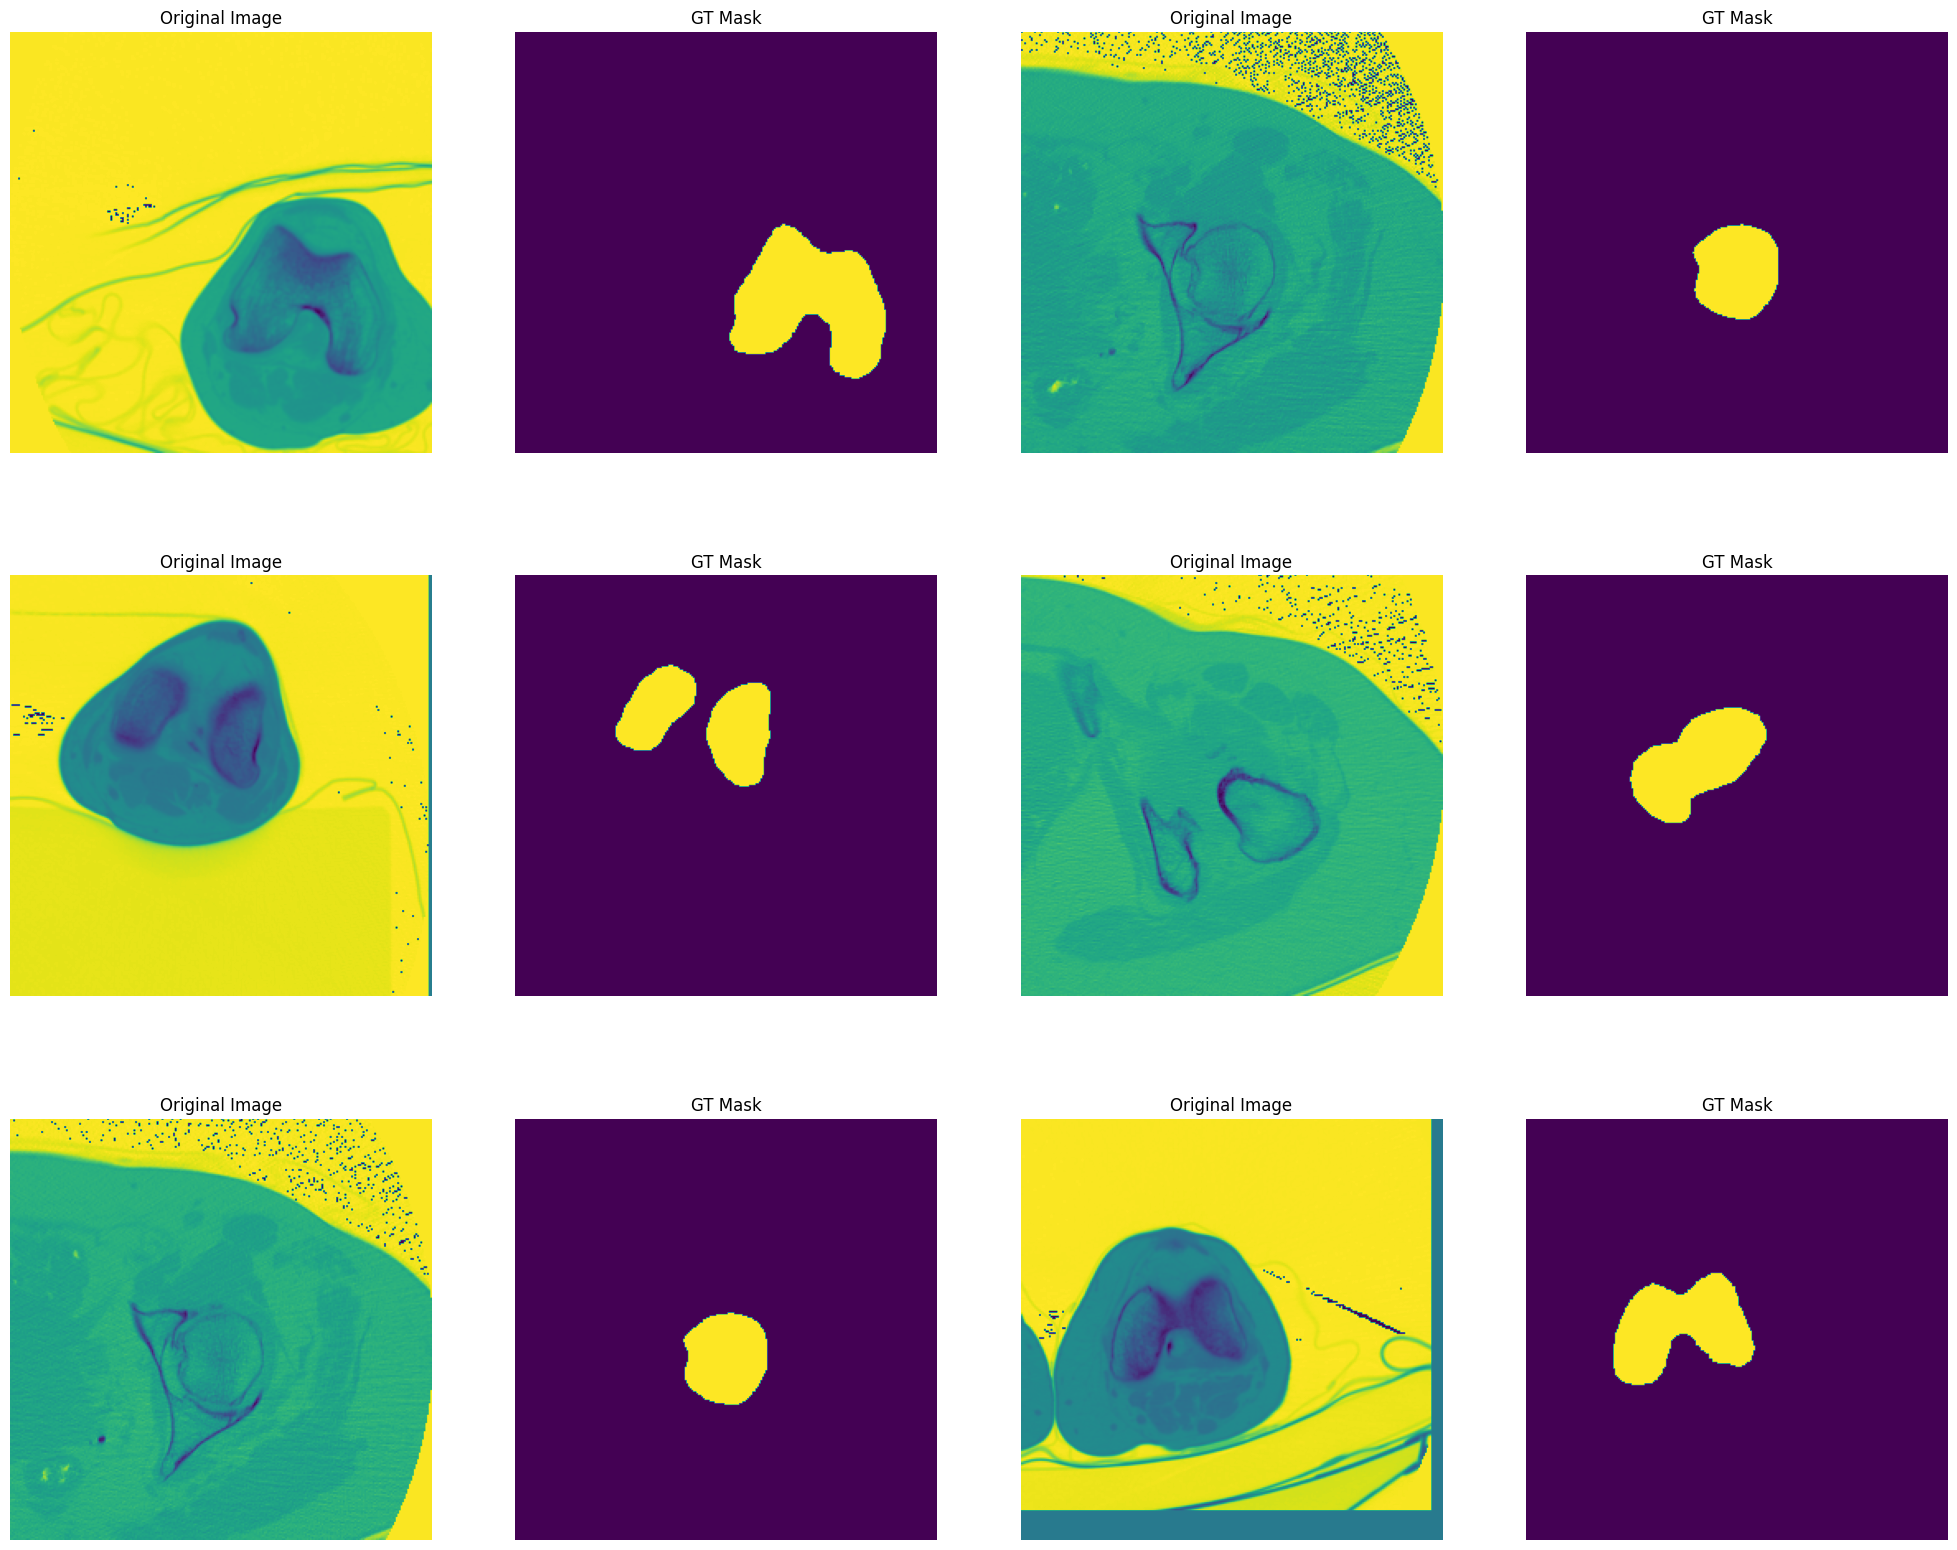

In [7]:
visualize(tr_dl.dataset, n_ims = 12)

# Resnet 50

In [9]:
import segmentation_models_pytorch as smp, time
model= smp.Unet(
    encoder_name='resnet50',
    encoder_weights="imagenet",
    encoder_depth=5,
    in_channels=1,
    classes=n_cls,
    activation=None,
    )

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 102MB/s]


In [10]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model.parameters(), lr = 3e-4)

In [11]:
from PIL import Image
from tqdm import tqdm

In [12]:
EPOCHS = 5

In [13]:
device = "cuda" if torch.cuda.is_available() else "cpu"

history = train(model = model, tr_dl = tr_dl, val_dl = val_dl,
                 loss_fn = loss_fn, opt = optimizer, device = device,
                 epochs = EPOCHS, save_prefix = "UnetResnet50",n_cls = n_cls)

Start training process...
Epoch 1 train process is started...


  0%|          | 0/60 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 60/60 [00:23<00:00,  2.59it/s]


Epoch 1 validation process is started...


100%|██████████| 20/20 [00:03<00:00,  5.01it/s]


Epoch 1 train process is completed.

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Epoch 1 train process results: 

Train Time         -> 27.148 secs
Train Loss         -> 0.109
Train PA           -> 0.909
Train IoU          -> 0.835
Validation Loss    -> 0.041
Validation PA      -> 0.961
Validation IoU     -> 0.917

Loss decreased from inf to 0.041!
Saving the model with the best loss value...
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Epoch 2 train process is started...


100%|██████████| 60/60 [00:18<00:00,  3.21it/s]


Epoch 2 validation process is started...


100%|██████████| 20/20 [00:02<00:00,  8.16it/s]


Epoch 2 train process is completed.

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Epoch 2 train process results: 

Train Time         -> 21.139 secs
Train Loss         -> 0.034
Train PA           -> 0.913
Train IoU          -> 0.925
Validation Loss    -> 0.022
Validation PA      -> 0.961
Validation IoU     -> 0.954

Loss decreased from 0.041 to 0.022!
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Epoch 3 train process is started...


100%|██████████| 60/60 [00:18<00:00,  3.22it/s]


Epoch 3 validation process is started...


100%|██████████| 20/20 [00:02<00:00,  8.09it/s]


Epoch 3 train process is completed.

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Epoch 3 train process results: 

Train Time         -> 21.155 secs
Train Loss         -> 0.021
Train PA           -> 0.913
Train IoU          -> 0.948
Validation Loss    -> 0.019
Validation PA      -> 0.962
Validation IoU     -> 0.949

Loss decreased from 0.022 to 0.019!
Saving the model with the best loss value...
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Epoch 4 train process is started...


100%|██████████| 60/60 [00:19<00:00,  3.11it/s]


Epoch 4 validation process is started...


100%|██████████| 20/20 [00:02<00:00,  6.90it/s]


Epoch 4 train process is completed.

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Epoch 4 train process results: 

Train Time         -> 22.191 secs
Train Loss         -> 0.016
Train PA           -> 0.912
Train IoU          -> 0.957
Validation Loss    -> 0.015
Validation PA      -> 0.962
Validation IoU     -> 0.960

Loss decreased from 0.019 to 0.015!
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Epoch 5 train process is started...


100%|██████████| 60/60 [00:19<00:00,  3.10it/s]


Epoch 5 validation process is started...


100%|██████████| 20/20 [00:02<00:00,  7.88it/s]

Epoch 5 train process is completed.

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Epoch 5 train process results: 

Train Time         -> 21.937 secs
Train Loss         -> 0.012
Train PA           -> 0.912
Train IoU          -> 0.965
Validation Loss    -> 0.016
Validation PA      -> 0.962
Validation IoU     -> 0.955

Loss did not decrease for 1 epoch(s)!
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Train process is completed in 1.911 minutes.


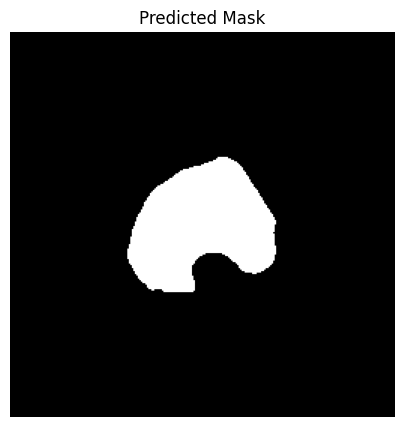

In [16]:
import torch
import matplotlib.pyplot as plt

plot_single_image(test_dl, model, torch.device('cuda'), 320-27)


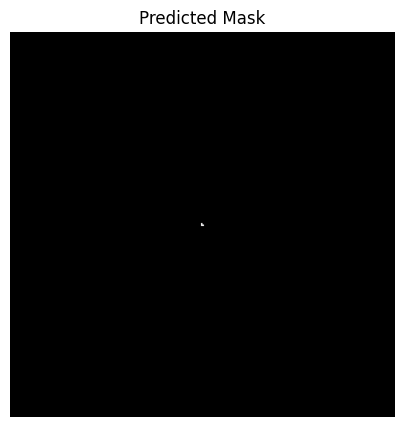

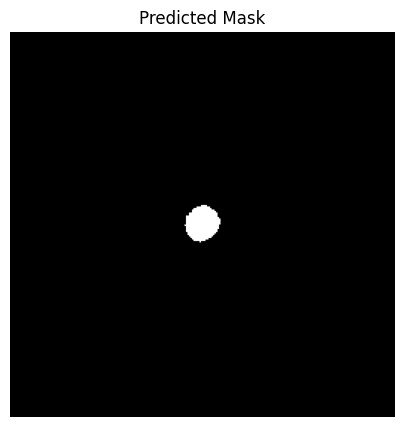

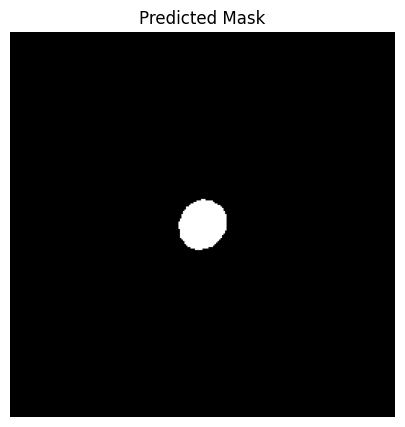

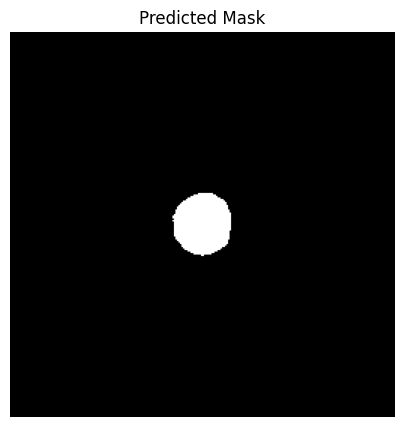

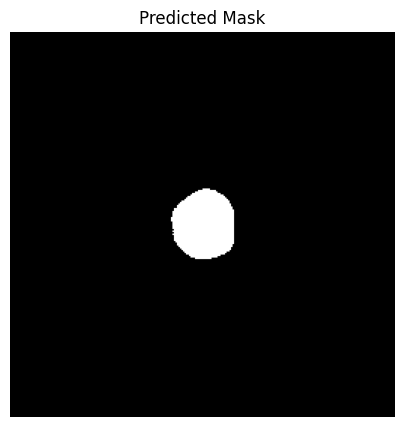

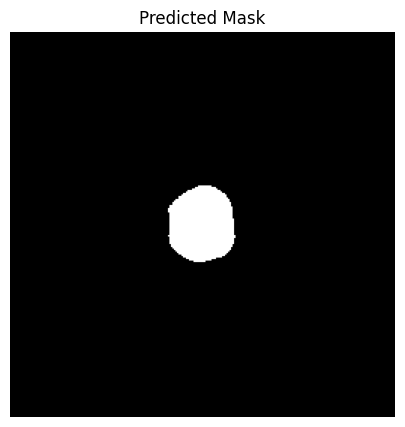

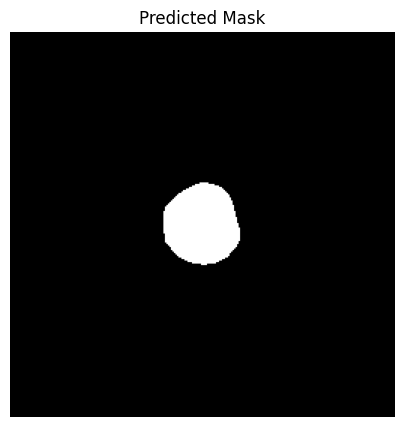

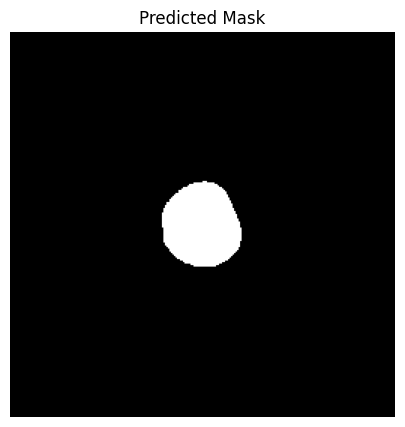

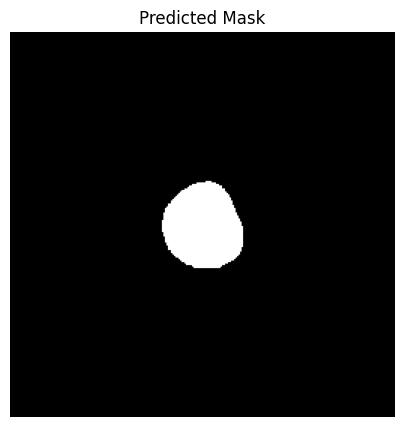

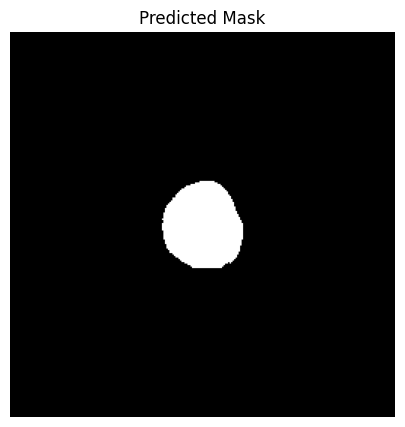

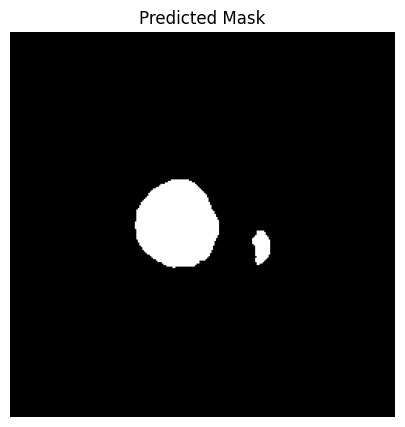

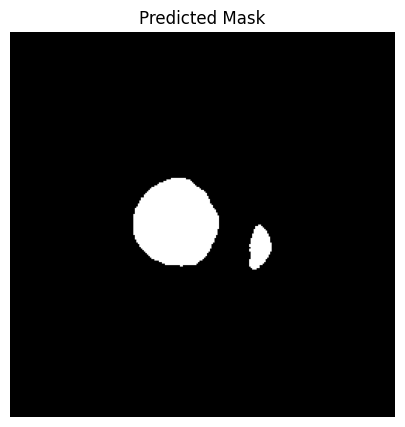

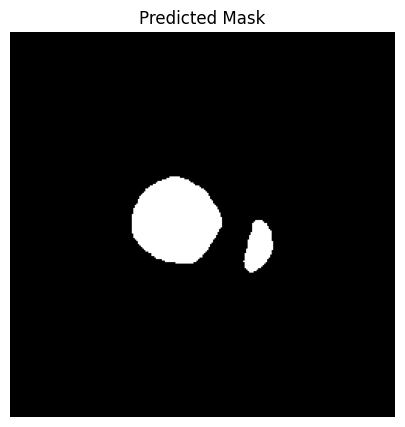

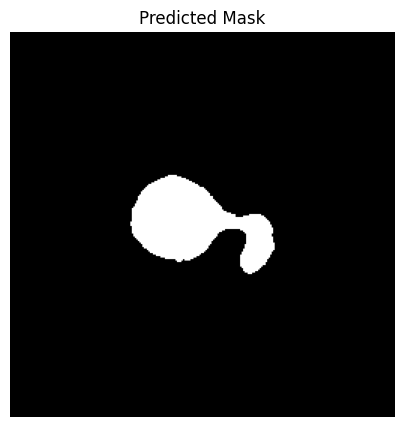

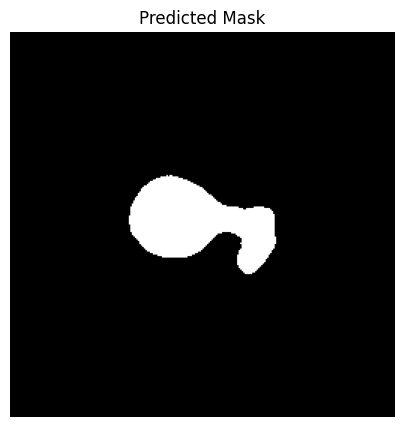

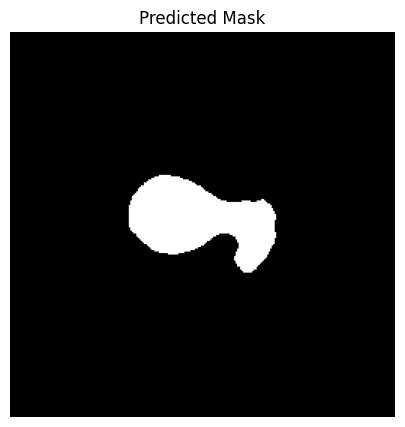

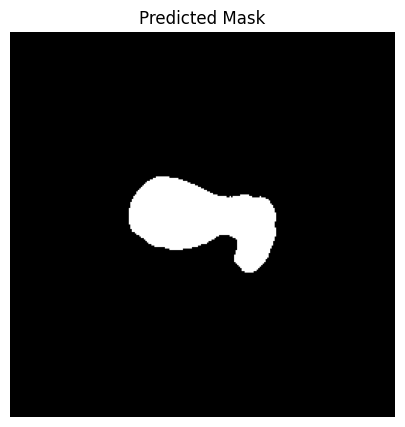

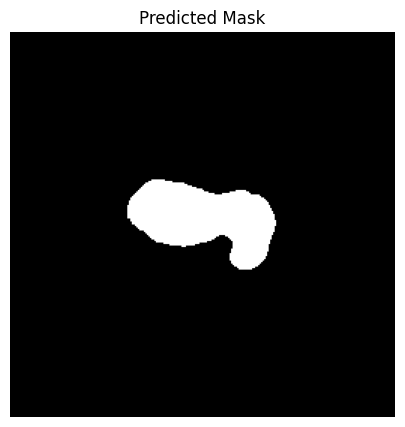

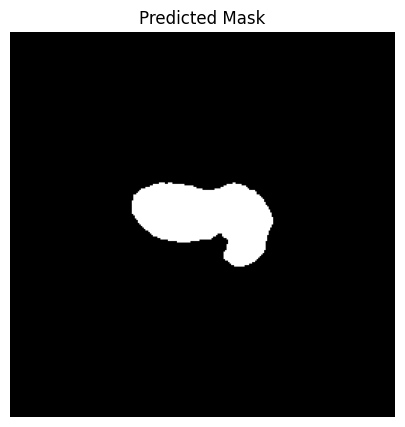

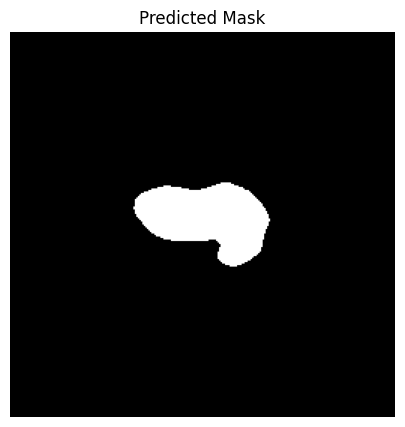

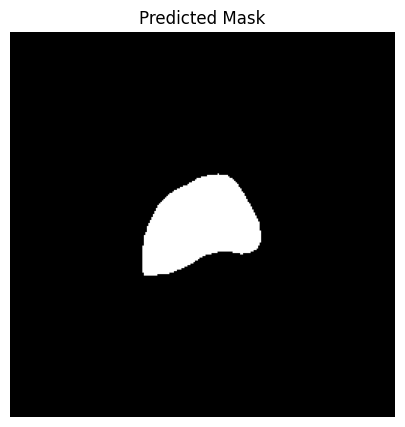

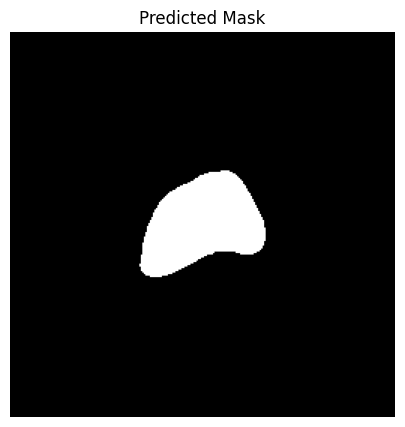

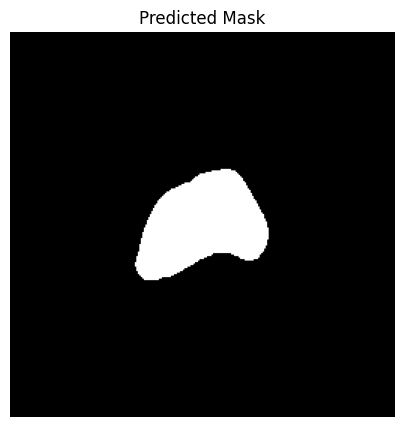

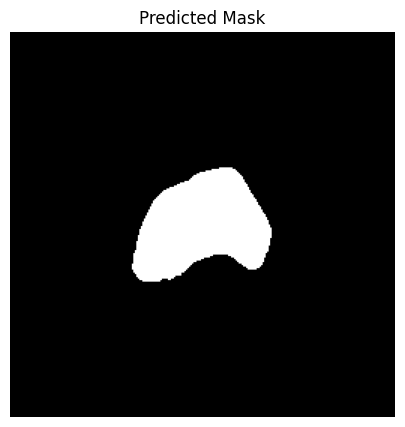

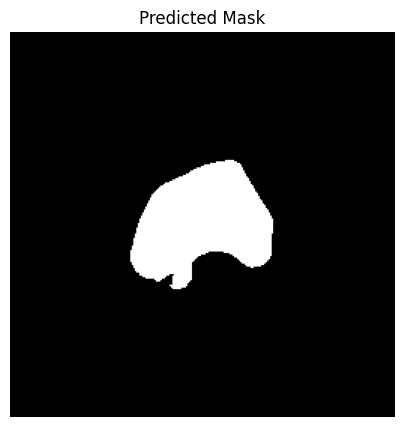

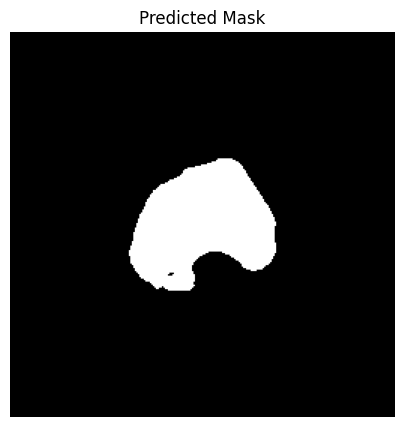

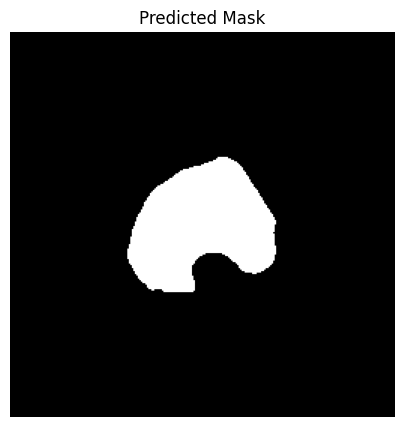

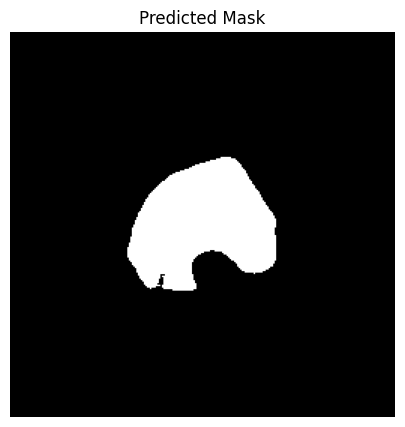

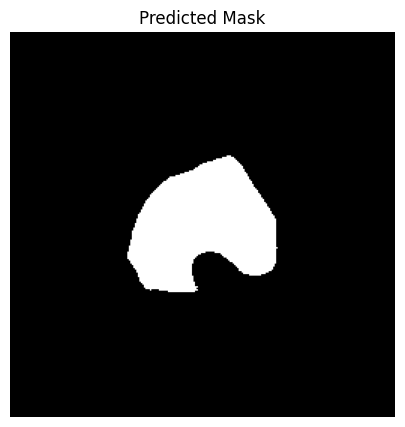

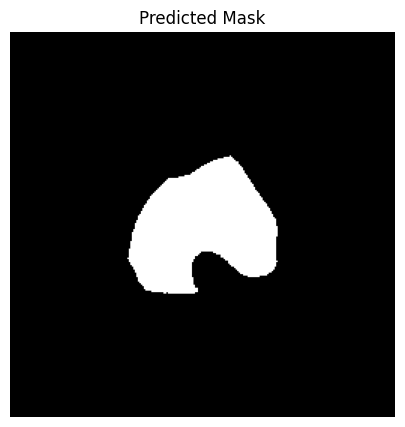

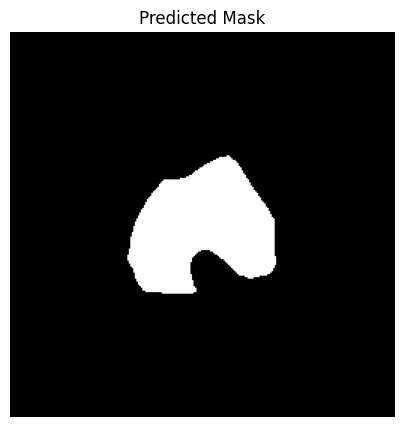

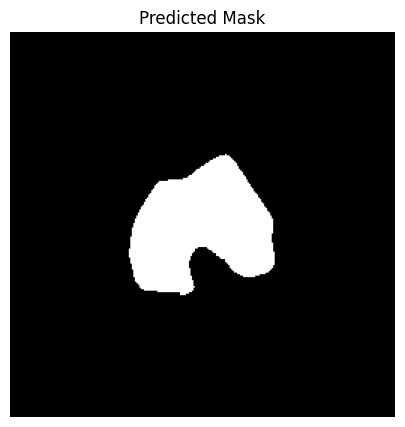

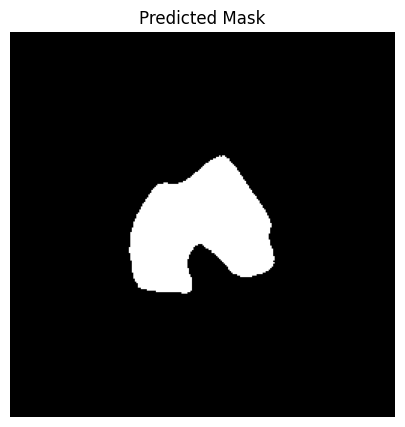

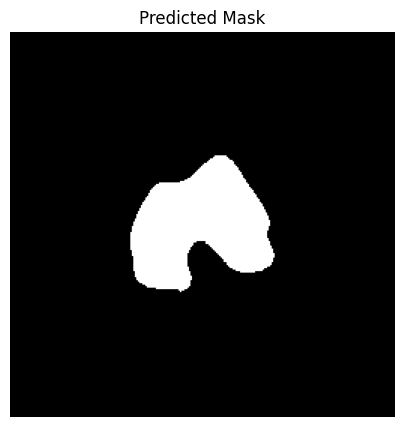

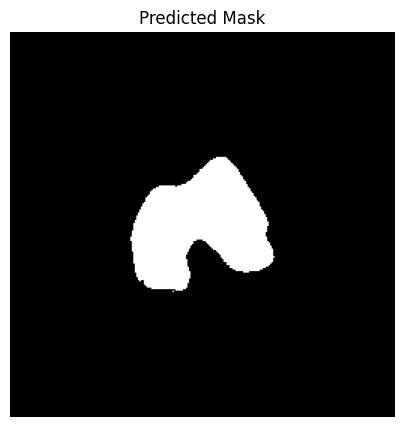

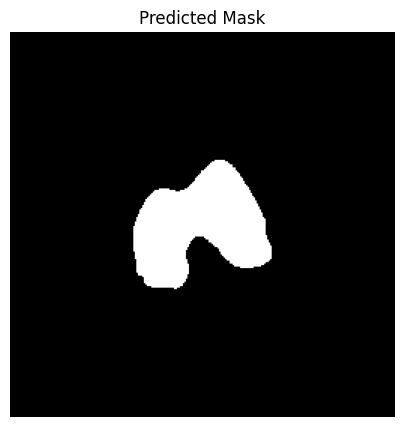

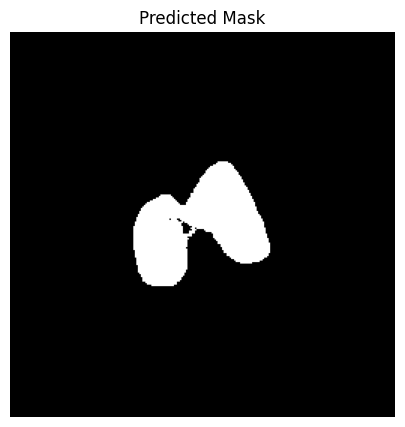

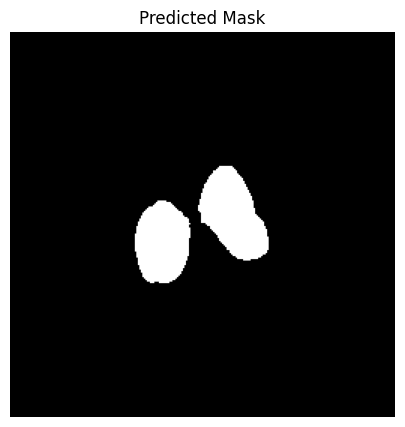

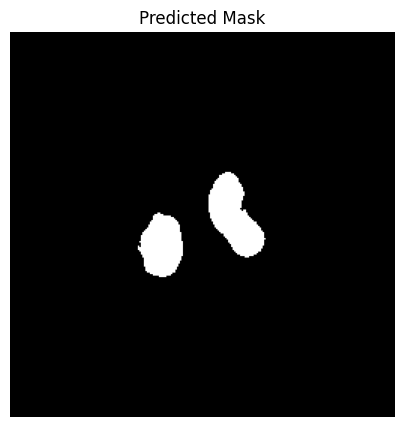

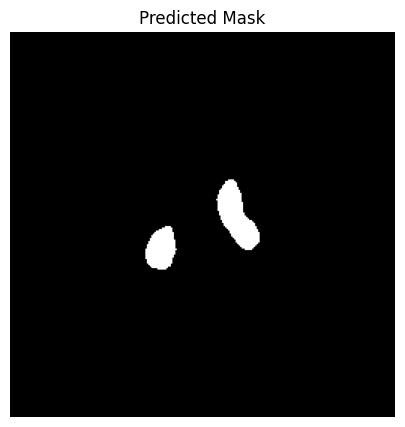

In [17]:
for i in range(40):
  index = 319 - i
  plot_single_image(test_dl, model, torch.device('cuda'), index)

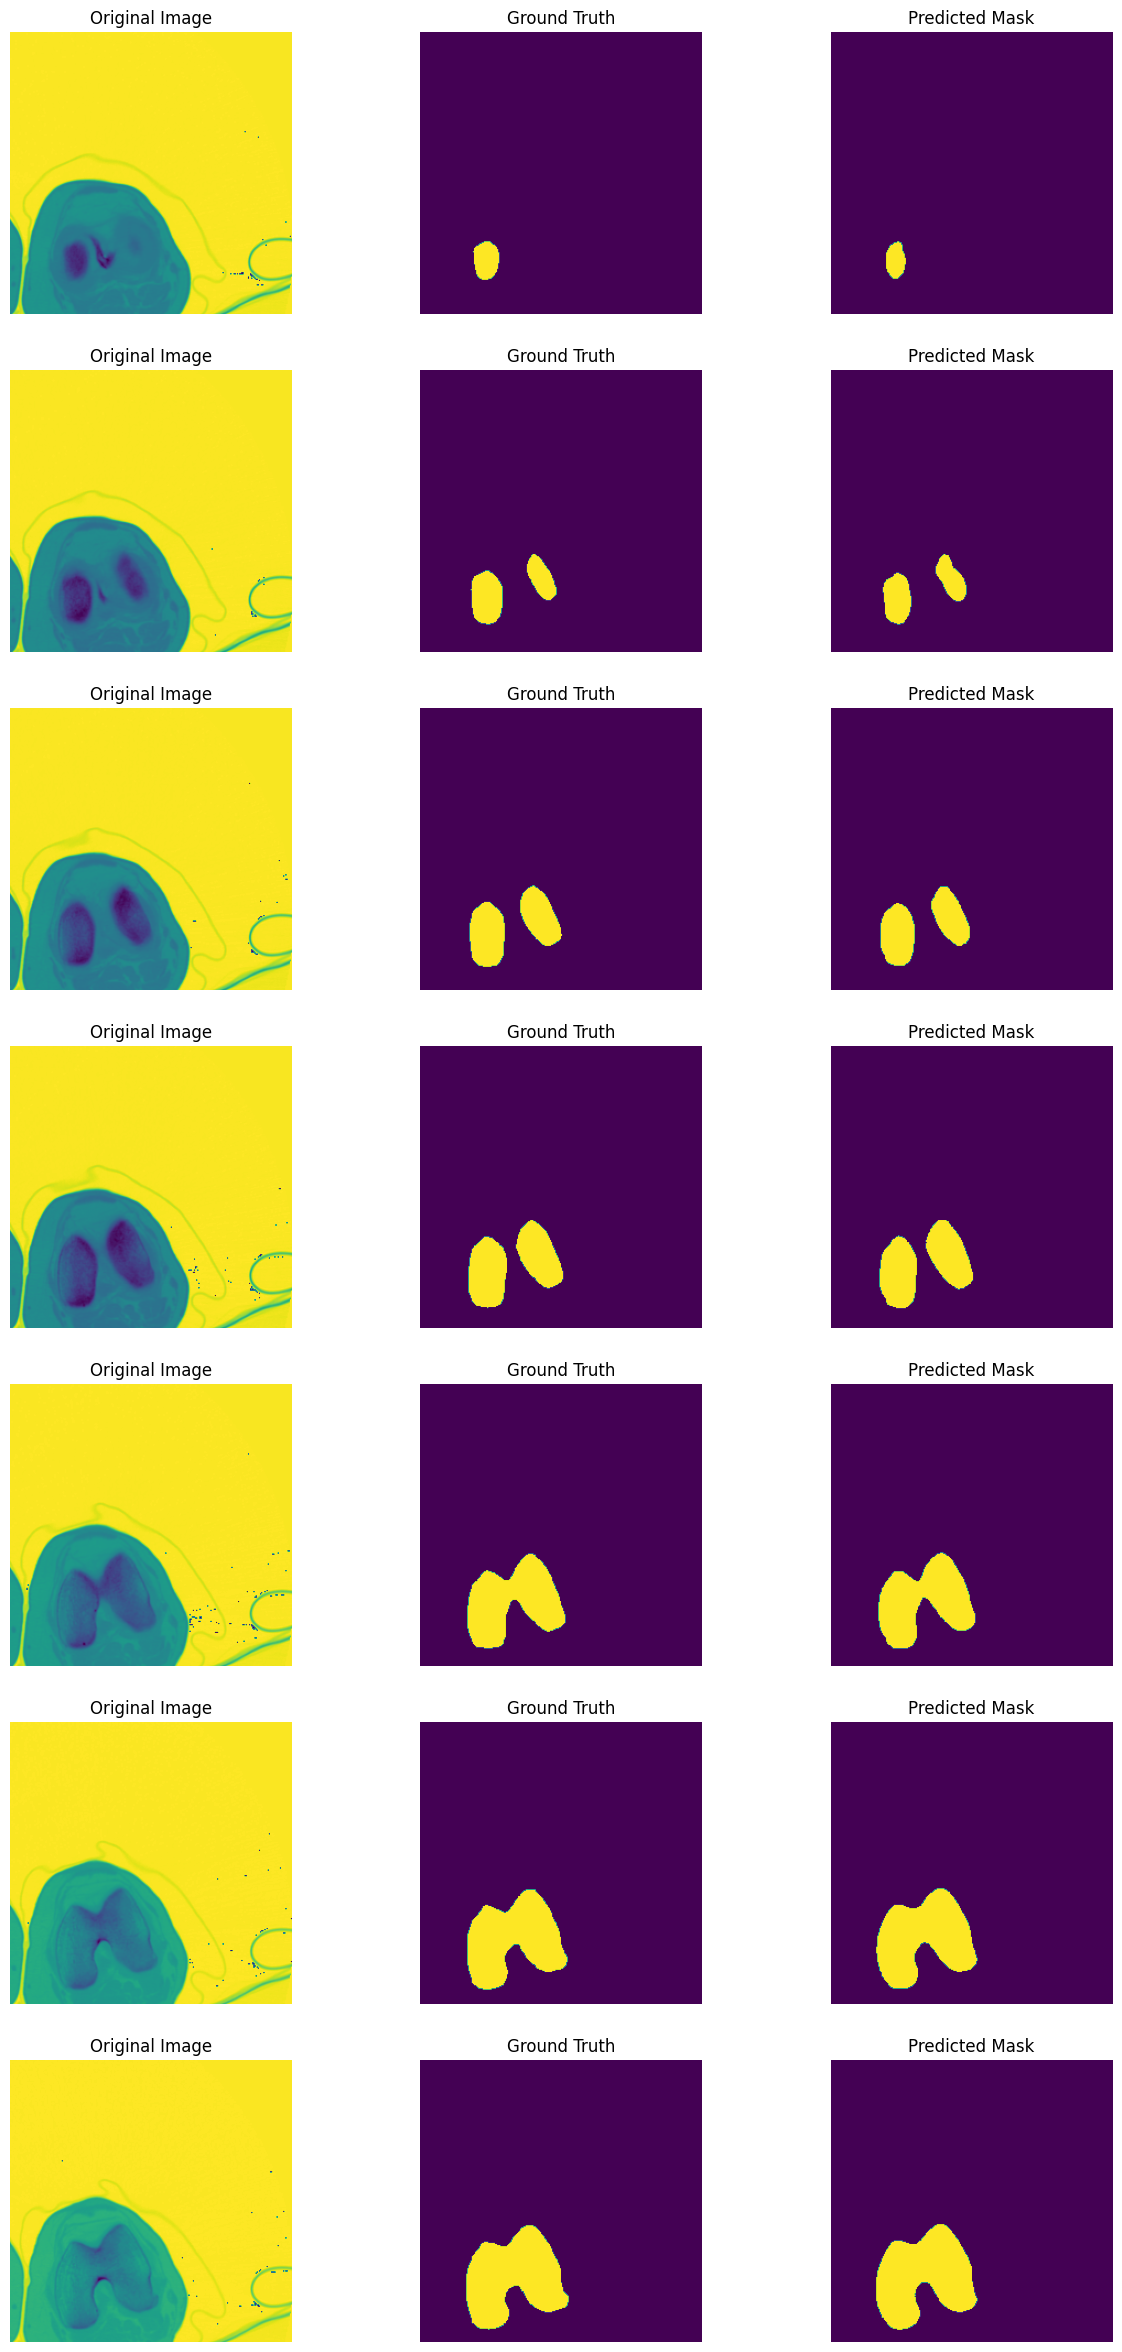

In [20]:
inference(test_dl, model, "cuda", 21)

In [21]:
volume_similarities,vol_sim_abs, miou_test, dicescores, execution_time, list_mioU3D,list_dice3D = calculate_results(model,test_dl )

print_results(miou_test,dicescores,volume_similarities,vol_sim_abs,execution_time,list_mioU3D,list_dice3D)

100%|██████████| 320/320 [00:06<00:00, 50.40it/s]

The MIOU for the segmentation over the test set resulted in:
0.909  +\-  0.093

The MIOU 3D for the segmentation over the test set resulted in:
0.931  +\-  0.014

The Dicescore for the segmentation over the test set resulted in:
0.949  +\-  0.073

The Dicescore 3D for the segmentation over the test set resulted in:
0.964  +\-  0.008

The volume similarity for the segmentation over the test set resulted in:
1.003  +\-  0.016

The volume similarity abs for the segmentation over the test set resulted in:
0.987  +\-  0.01


The time needed for the segmentation of 8 3D images is:
6.42 seconds.


# Resnet 34

In [22]:
import segmentation_models_pytorch as smp, time
model= smp.Unet(
    encoder_name='resnet34',
    encoder_weights="imagenet",
    encoder_depth=5,
    in_channels=1,
    classes=n_cls,
    activation=None,
    )

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 239MB/s]


In [23]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model.parameters(), lr = 3e-4)


In [25]:


device = "cuda" if torch.cuda.is_available() else "cpu"

history = train(model = model, tr_dl = tr_dl, val_dl = val_dl,
                 loss_fn = loss_fn, opt = optimizer, device = device,
                 epochs = EPOCHS, save_prefix = "UnetResnet34", n_cls= n_cls)

Start training process...
Epoch 1 train process is started...


100%|██████████| 60/60 [00:12<00:00,  4.65it/s]


Epoch 1 validation process is started...


100%|██████████| 20/20 [00:01<00:00, 10.79it/s]


Epoch 1 train process is completed.

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Epoch 1 train process results: 

Train Time         -> 14.771 secs
Train Loss         -> 0.146
Train PA           -> 0.901
Train IoU          -> 0.792
Validation Loss    -> 0.062
Validation PA      -> 0.960
Validation IoU     -> 0.877

Loss decreased from inf to 0.062!
Saving the model with the best loss value...
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Epoch 2 train process is started...


100%|██████████| 60/60 [00:12<00:00,  4.70it/s]


Epoch 2 validation process is started...


100%|██████████| 20/20 [00:01<00:00, 10.95it/s]


Epoch 2 train process is completed.

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Epoch 2 train process results: 

Train Time         -> 14.609 secs
Train Loss         -> 0.042
Train PA           -> 0.912
Train IoU          -> 0.914
Validation Loss    -> 0.027
Validation PA      -> 0.961
Validation IoU     -> 0.940

Loss decreased from 0.062 to 0.027!
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Epoch 3 train process is started...


100%|██████████| 60/60 [00:12<00:00,  4.72it/s]


Epoch 3 validation process is started...


100%|██████████| 20/20 [00:01<00:00, 10.87it/s]


Epoch 3 train process is completed.

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Epoch 3 train process results: 

Train Time         -> 14.585 secs
Train Loss         -> 0.027
Train PA           -> 0.913
Train IoU          -> 0.934
Validation Loss    -> 0.041
Validation PA      -> 0.959
Validation IoU     -> 0.880

Loss did not decrease for 1 epoch(s)!
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Epoch 4 train process is started...


100%|██████████| 60/60 [00:12<00:00,  4.73it/s]


Epoch 4 validation process is started...


100%|██████████| 20/20 [00:01<00:00, 11.04it/s]


Epoch 4 train process is completed.

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Epoch 4 train process results: 

Train Time         -> 14.518 secs
Train Loss         -> 0.019
Train PA           -> 0.912
Train IoU          -> 0.951
Validation Loss    -> 0.017
Validation PA      -> 0.962
Validation IoU     -> 0.953

Loss decreased from 0.041 to 0.017!
Saving the model with the best loss value...
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Epoch 5 train process is started...


100%|██████████| 60/60 [00:12<00:00,  4.78it/s]


Epoch 5 validation process is started...


100%|██████████| 20/20 [00:01<00:00, 10.96it/s]

Epoch 5 train process is completed.

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Epoch 5 train process results: 

Train Time         -> 14.393 secs
Train Loss         -> 0.015
Train PA           -> 0.912
Train IoU          -> 0.960
Validation Loss    -> 0.016
Validation PA      -> 0.962
Validation IoU     -> 0.956

Loss decreased from 0.017 to 0.016!
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Train process is completed in 1.223 minutes.


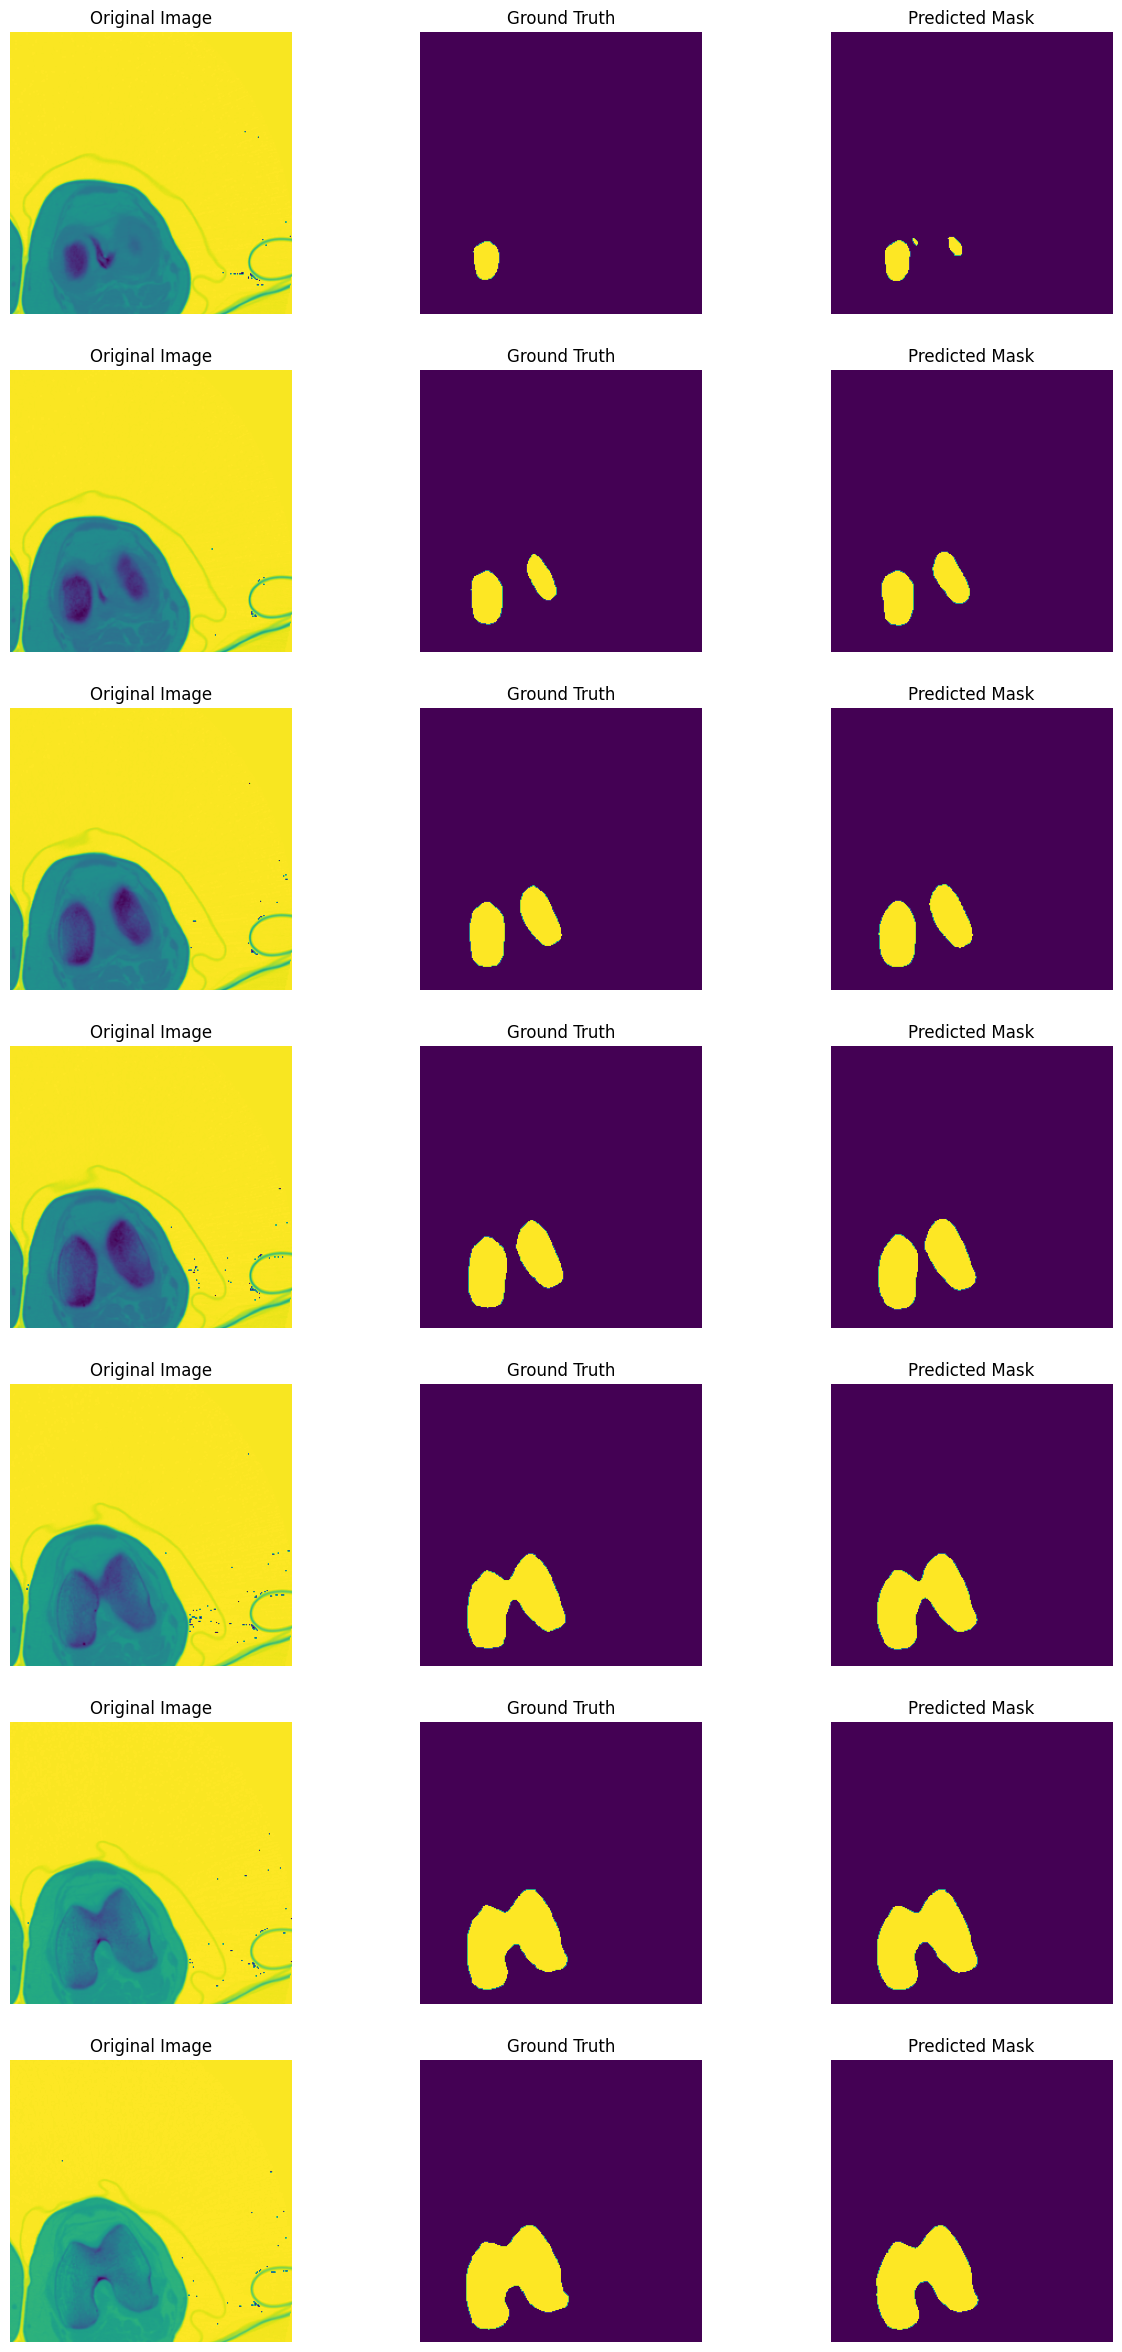

In [26]:
# model = torch.load("saved_models/liver_best_model.pt")
inference(test_dl, model = model,device =  "cuda", n_ims = 21)

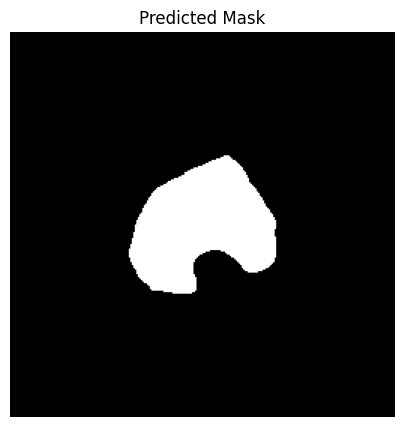

In [27]:
plot_single_image(test_dl, model, torch.device('cuda'), 320-27)

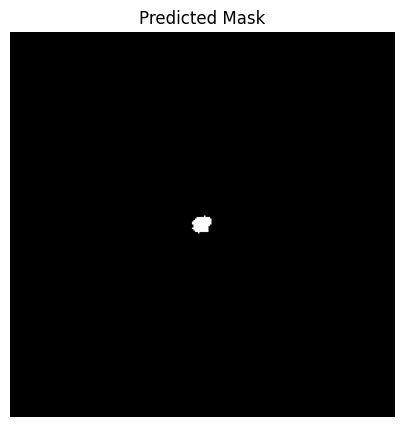

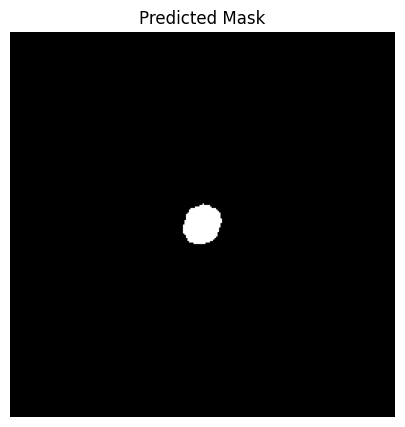

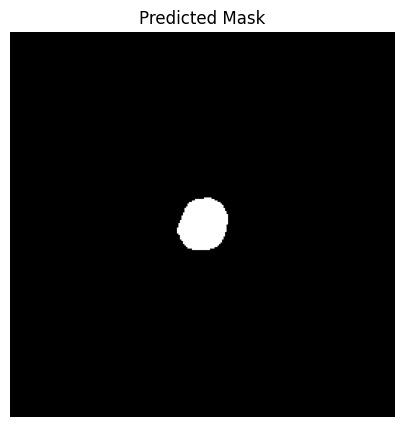

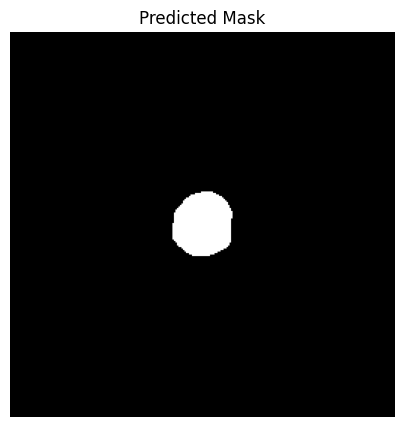

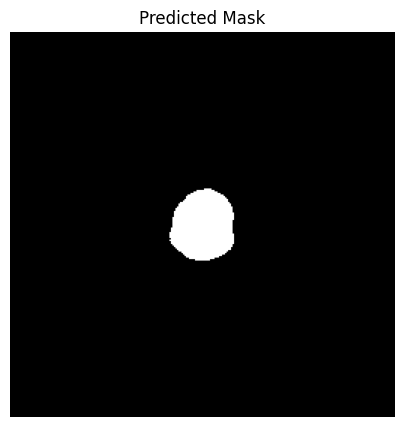

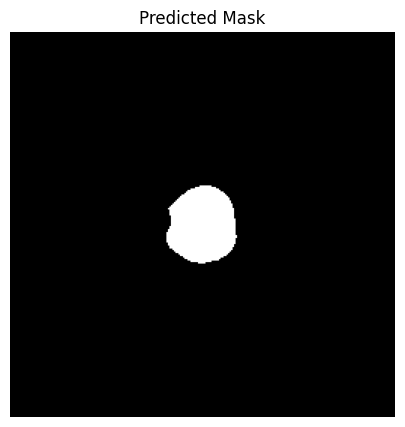

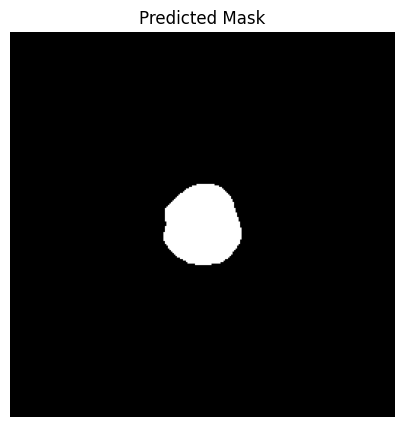

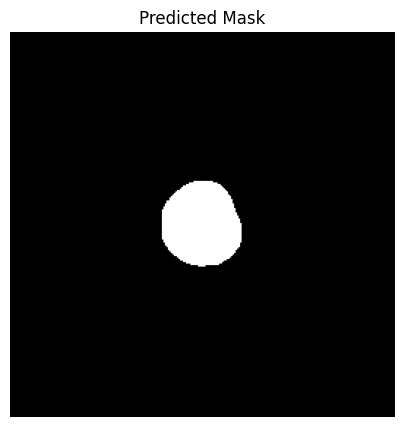

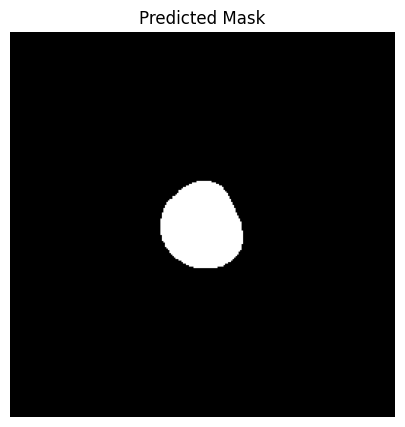

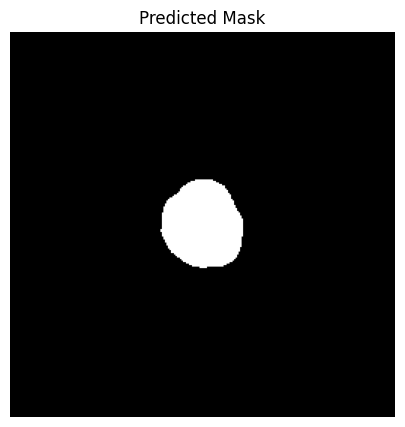

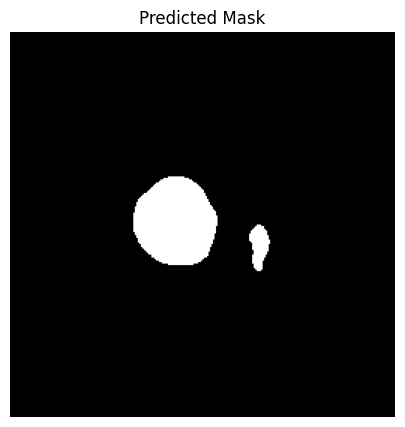

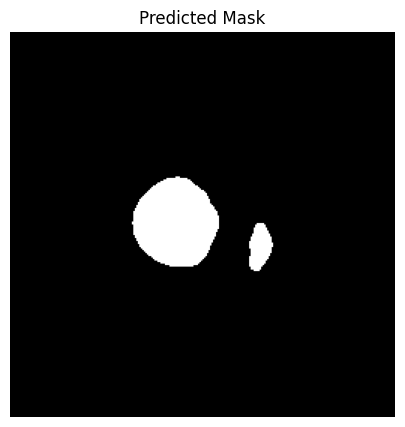

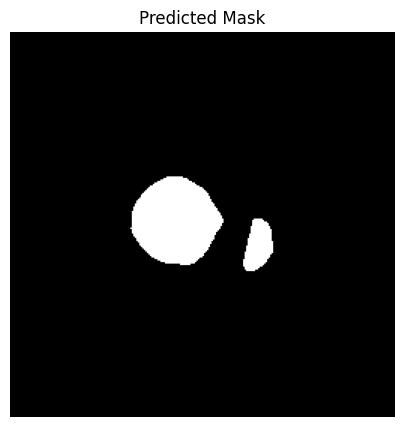

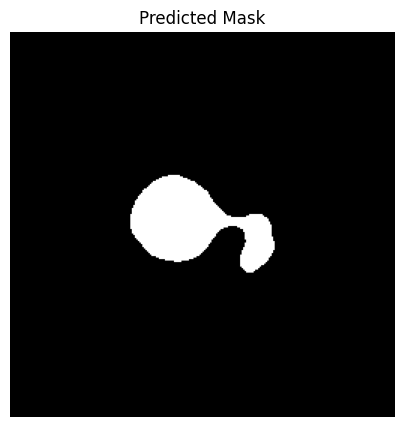

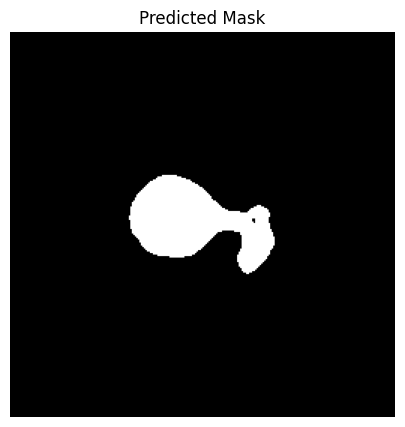

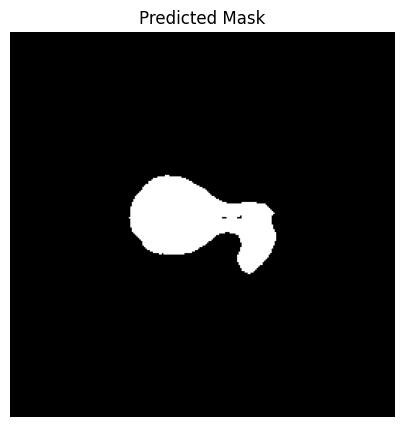

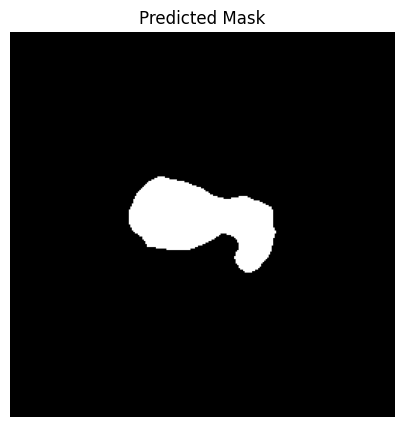

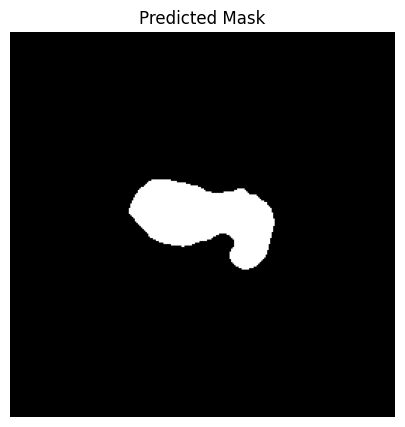

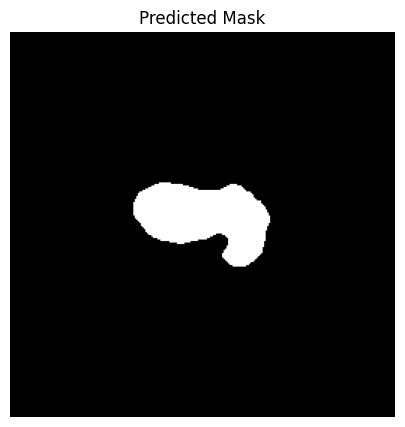

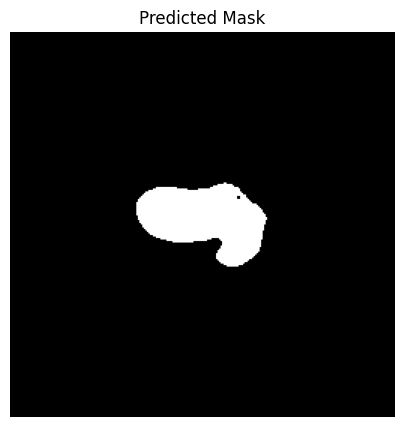

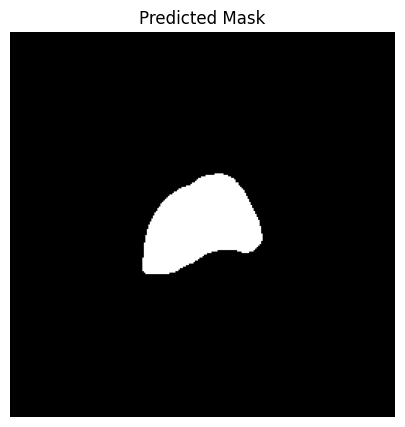

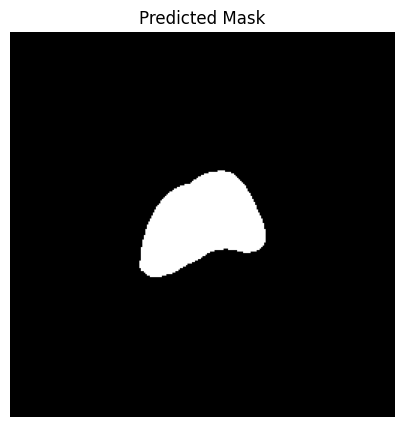

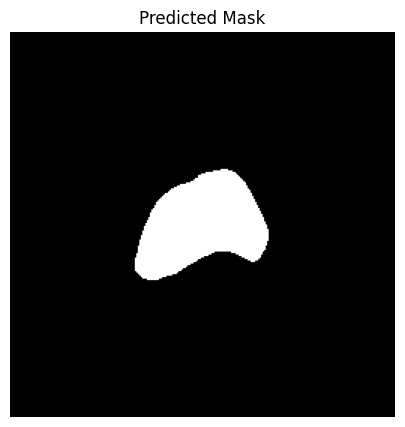

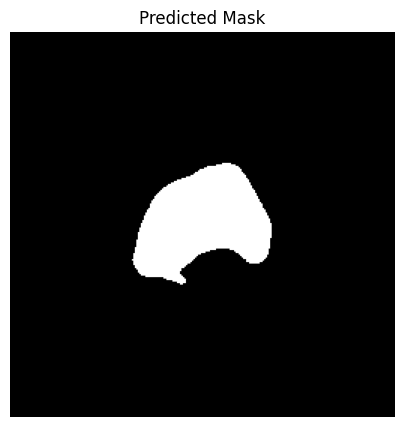

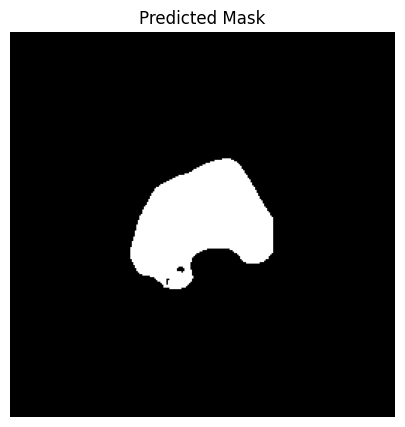

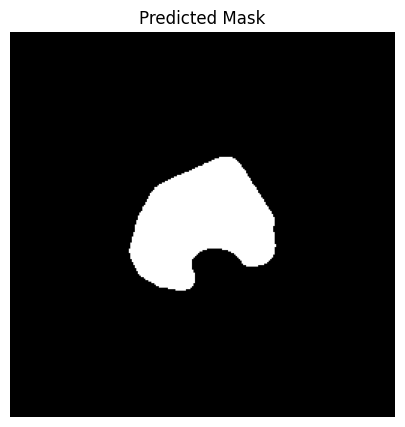

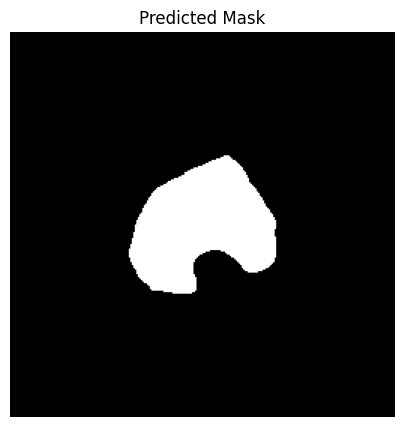

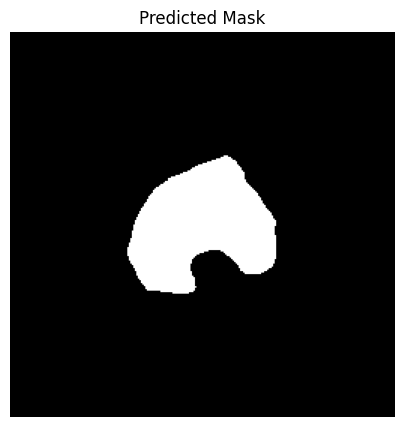

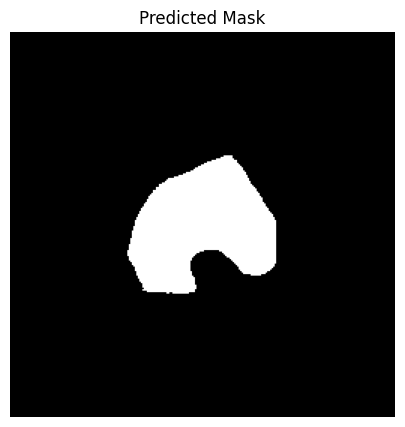

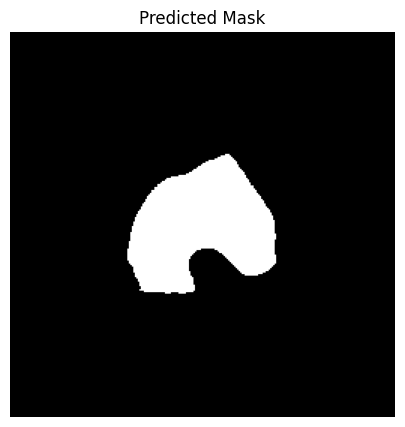

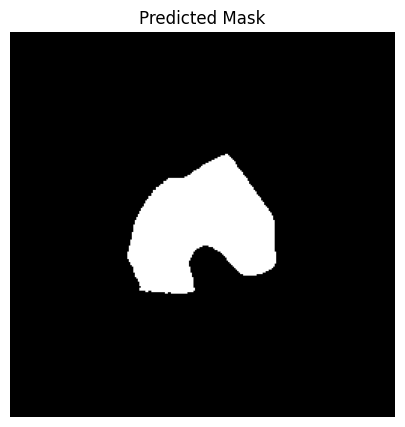

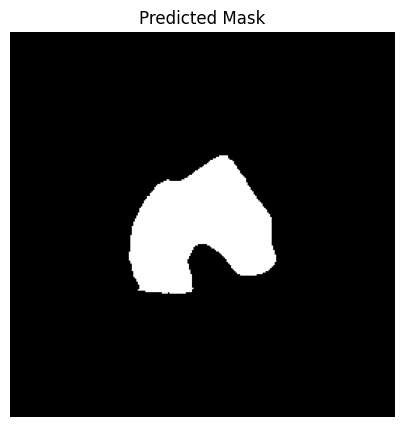

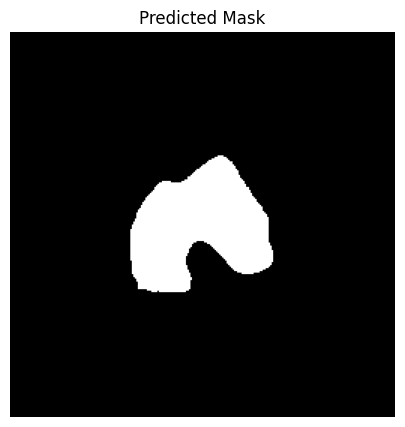

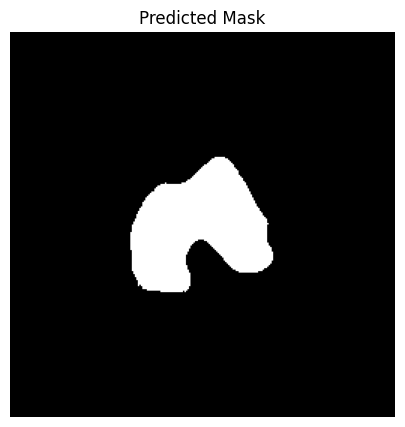

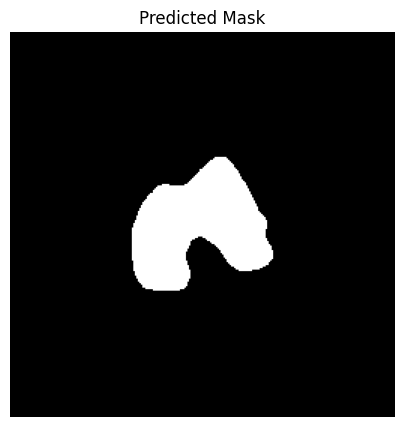

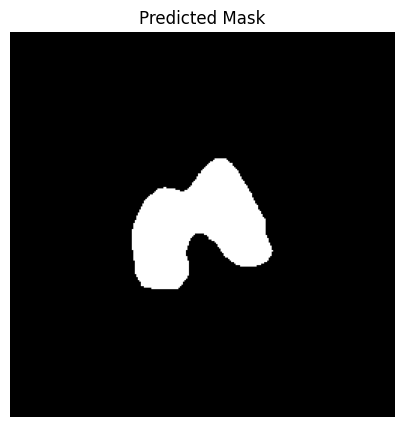

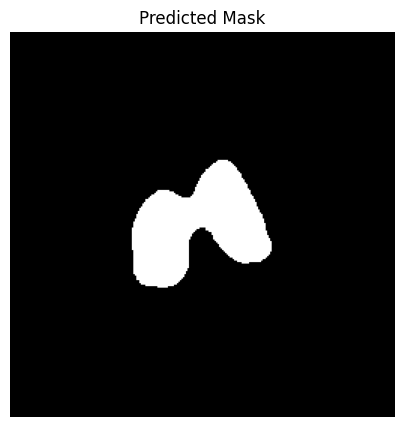

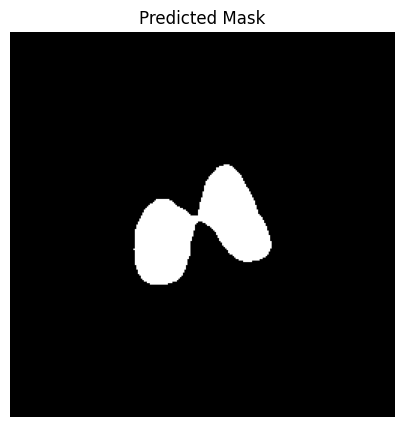

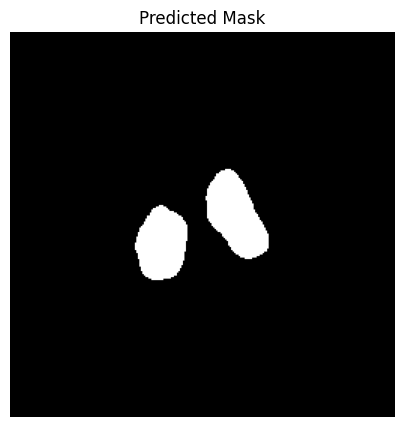

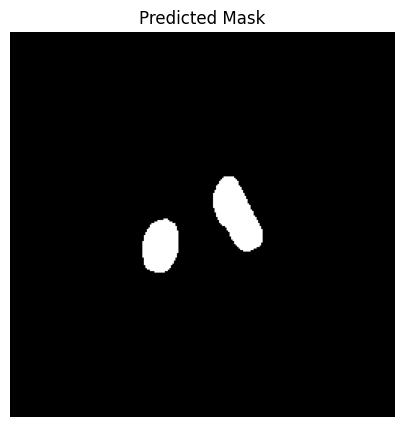

In [28]:
for i in range(40):
  index = 319 - i
  plot_single_image(test_dl, model, torch.device('cuda'), index)

In [29]:
volume_similarities,vol_sim_abs, miou_test, dicescores, execution_time, list_mioU3D,list_dice3D = calculate_results(model,test_dl )

print_results(miou_test,dicescores,volume_similarities,vol_sim_abs,execution_time,list_mioU3D,list_dice3D)

100%|██████████| 320/320 [00:05<00:00, 59.11it/s]

The MIOU for the segmentation over the test set resulted in:
0.923  +\-  0.088

The MIOU 3D for the segmentation over the test set resulted in:
0.941  +\-  0.011

The Dicescore for the segmentation over the test set resulted in:
0.957  +\-  0.066

The Dicescore 3D for the segmentation over the test set resulted in:
0.97  +\-  0.006

The volume similarity for the segmentation over the test set resulted in:
1.001  +\-  0.013

The volume similarity abs for the segmentation over the test set resulted in:
0.989  +\-  0.007


The time needed for the segmentation of 8 3D images is:
5.48 seconds.


#Resnet50 Unet++

In [30]:


model = smp.UnetPlusPlus(
    encoder_name='resnet50',
    encoder_depth=5,
    encoder_weights="imagenet",
    in_channels=1,
    classes=n_cls,
    activation=None,
    )



In [31]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model.parameters(), lr = 3e-4)


In [33]:

device = "cuda" if torch.cuda.is_available() else "cpu"

history = train(model = model, tr_dl = tr_dl, val_dl = val_dl,
                 loss_fn = loss_fn, opt = optimizer, device = device,
                 epochs = EPOCHS, save_prefix = "UnetppResnet50", n_cls=n_cls)

Start training process...
Epoch 1 train process is started...


100%|██████████| 60/60 [00:52<00:00,  1.14it/s]


Epoch 1 validation process is started...


100%|██████████| 20/20 [00:06<00:00,  3.00it/s]


Epoch 1 train process is completed.

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Epoch 1 train process results: 

Train Time         -> 59.509 secs
Train Loss         -> 0.617
Train PA           -> 0.719
Train IoU          -> 0.596
Validation Loss    -> 0.383
Validation PA      -> 0.956
Validation IoU     -> 0.883

Loss decreased from inf to 0.383!
Saving the model with the best loss value...
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Epoch 2 train process is started...


100%|██████████| 60/60 [00:52<00:00,  1.14it/s]


Epoch 2 validation process is started...


100%|██████████| 20/20 [00:06<00:00,  3.13it/s]


Epoch 2 train process is completed.

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Epoch 2 train process results: 

Train Time         -> 58.857 secs
Train Loss         -> 0.198
Train PA           -> 0.912
Train IoU          -> 0.899
Validation Loss    -> 0.107
Validation PA      -> 0.961
Validation IoU     -> 0.950

Loss decreased from 0.383 to 0.107!
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Epoch 3 train process is started...


100%|██████████| 60/60 [00:52<00:00,  1.14it/s]


Epoch 3 validation process is started...


100%|██████████| 20/20 [00:06<00:00,  2.99it/s]


Epoch 3 train process is completed.

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Epoch 3 train process results: 

Train Time         -> 59.262 secs
Train Loss         -> 0.083
Train PA           -> 0.914
Train IoU          -> 0.923
Validation Loss    -> 0.055
Validation PA      -> 0.961
Validation IoU     -> 0.947

Loss decreased from 0.107 to 0.055!
Saving the model with the best loss value...
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Epoch 4 train process is started...


100%|██████████| 60/60 [00:52<00:00,  1.14it/s]


Epoch 4 validation process is started...


100%|██████████| 20/20 [00:06<00:00,  3.14it/s]


Epoch 4 train process is completed.

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Epoch 4 train process results: 

Train Time         -> 58.851 secs
Train Loss         -> 0.048
Train PA           -> 0.913
Train IoU          -> 0.944
Validation Loss    -> 0.037
Validation PA      -> 0.962
Validation IoU     -> 0.958

Loss decreased from 0.055 to 0.037!
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Epoch 5 train process is started...


100%|██████████| 60/60 [00:52<00:00,  1.14it/s]


Epoch 5 validation process is started...


100%|██████████| 20/20 [00:06<00:00,  3.01it/s]


Epoch 5 train process is completed.

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Epoch 5 train process results: 

Train Time         -> 59.140 secs
Train Loss         -> 0.032
Train PA           -> 0.913
Train IoU          -> 0.960
Validation Loss    -> 0.028
Validation PA      -> 0.963
Validation IoU     -> 0.960

Loss decreased from 0.037 to 0.028!
Saving the model with the best loss value...
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Train process is completed in 4.953 minutes.


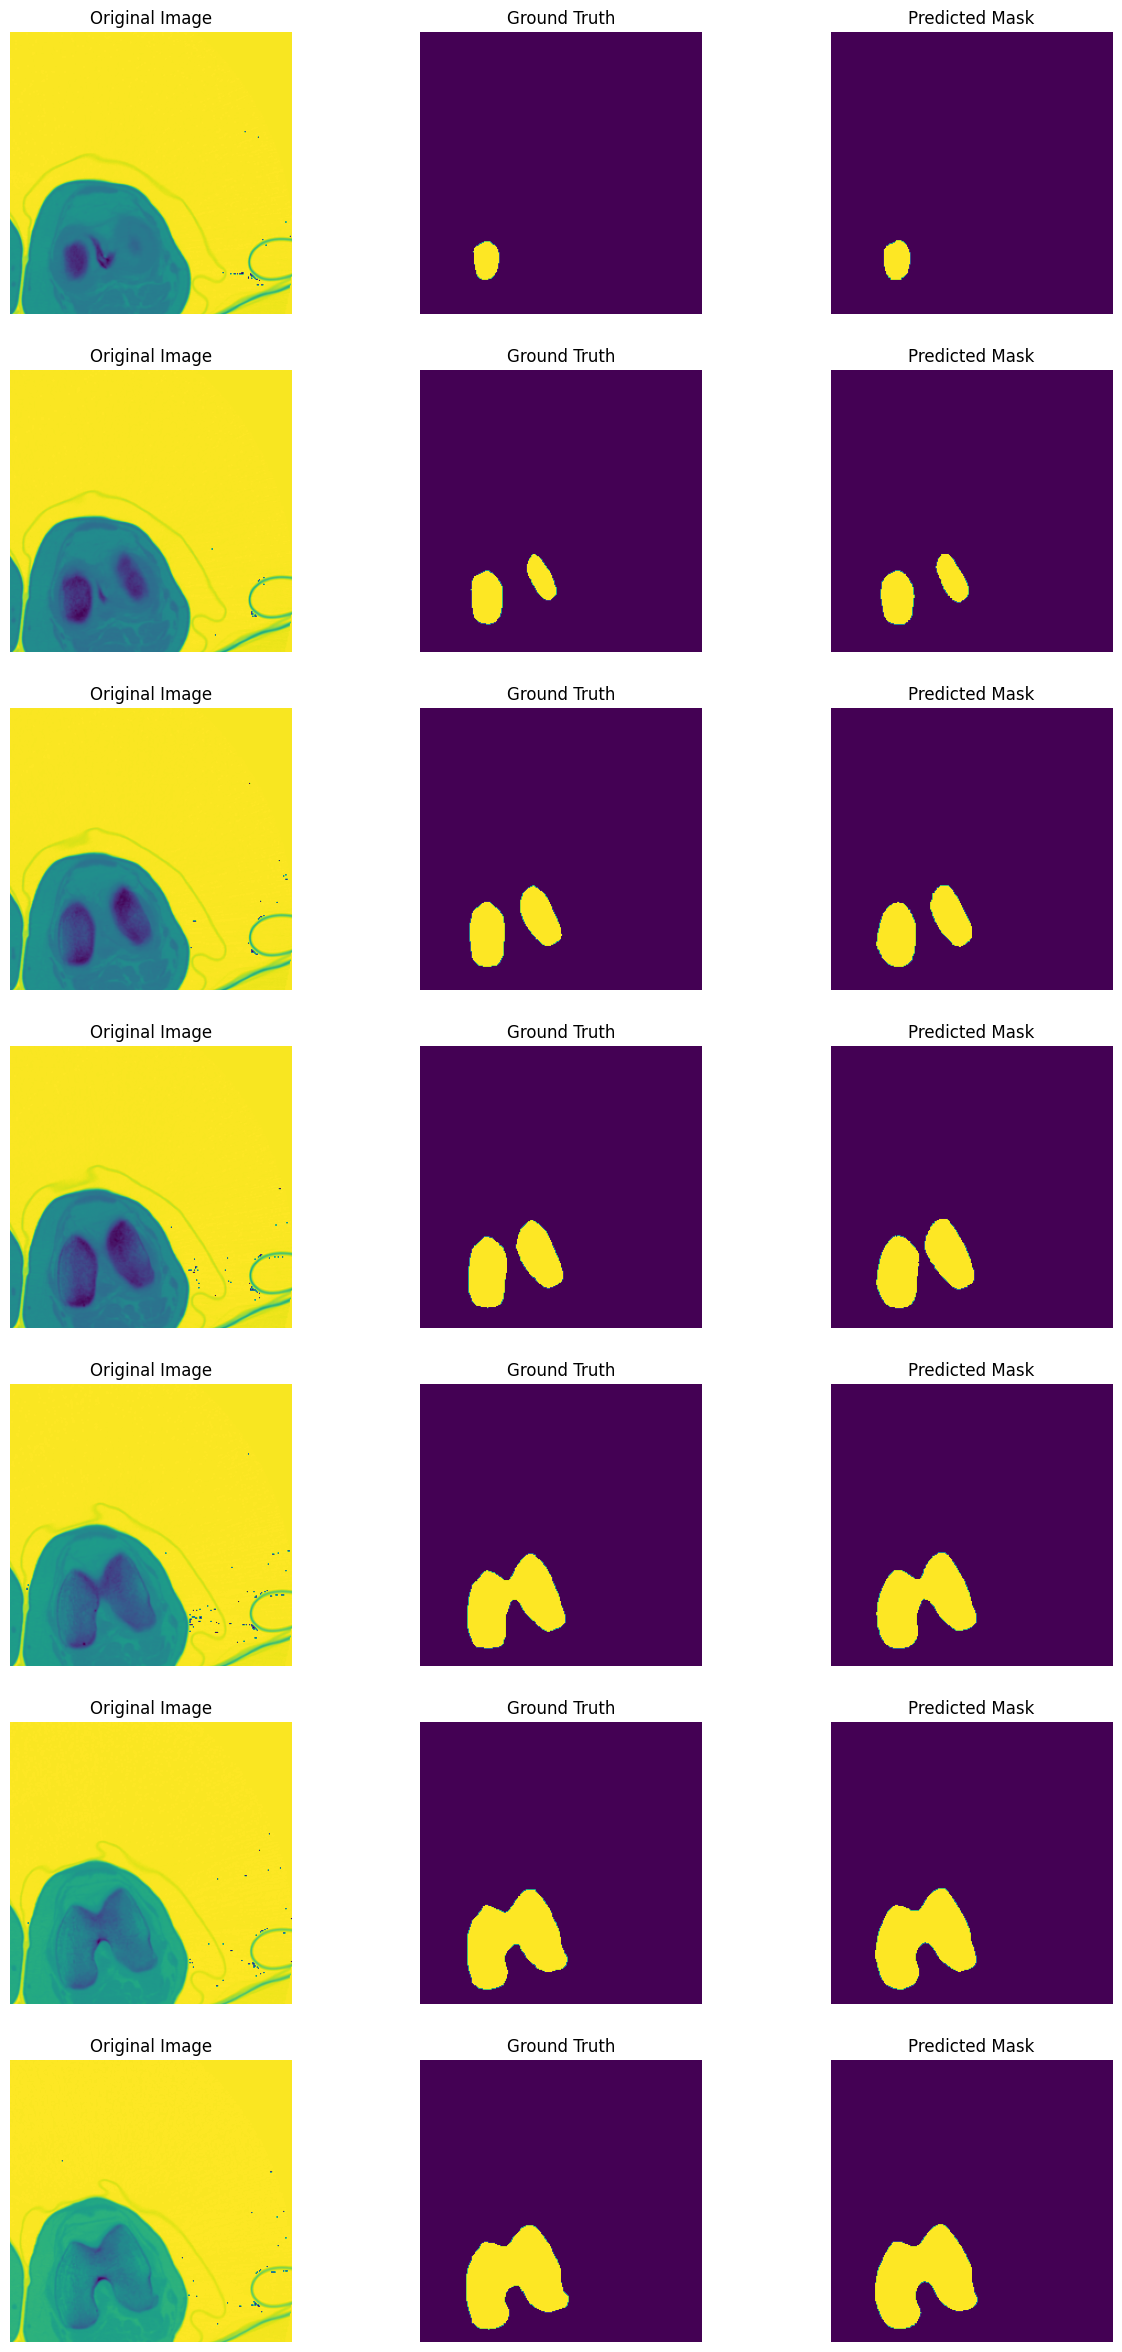

In [34]:
# model = torch.load("saved_models/liver_best_model.pt")
inference(test_dl, model = model, device = device,n_ims = 21)

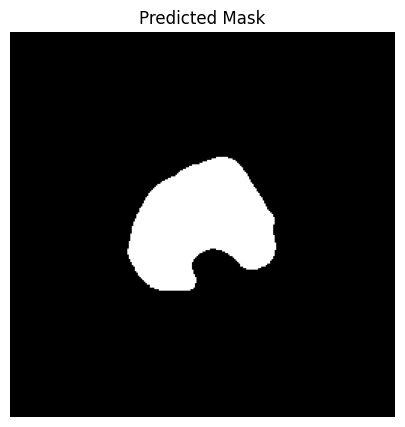

In [35]:

plot_single_image(test_dl, model, torch.device('cuda'), 320-27)

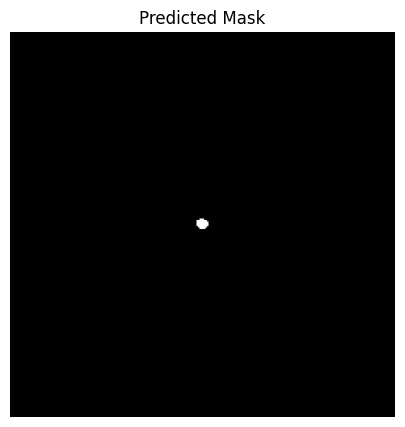

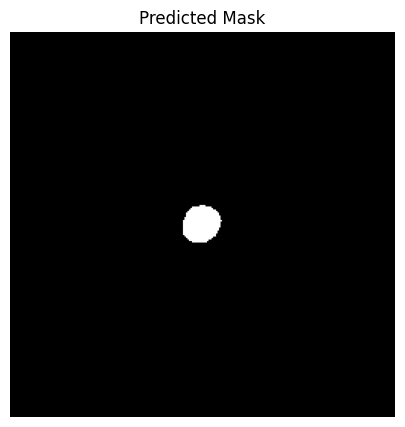

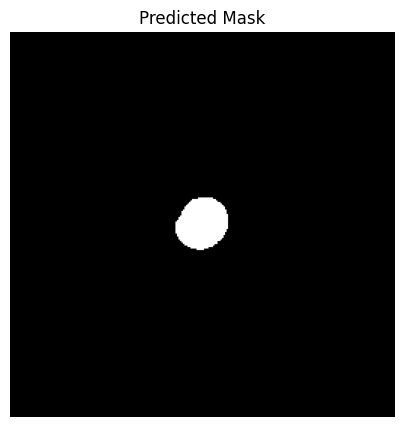

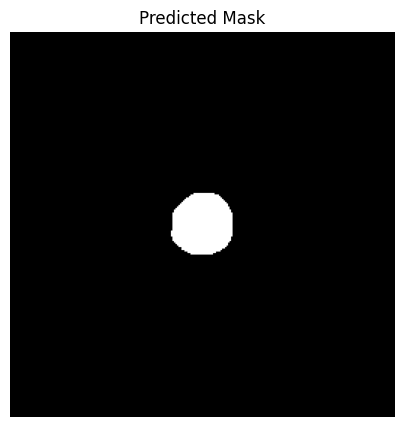

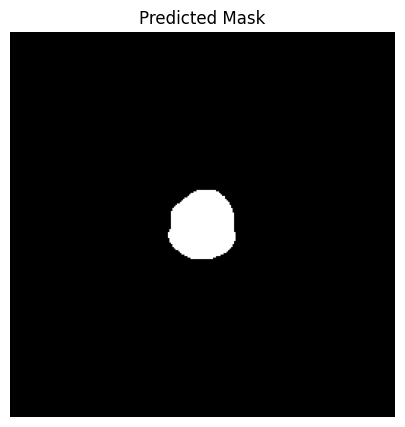

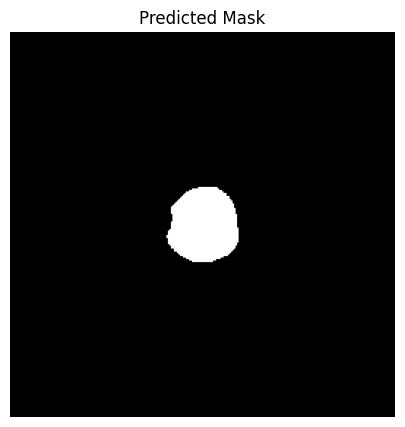

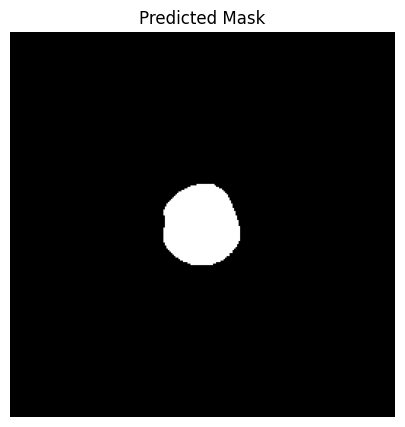

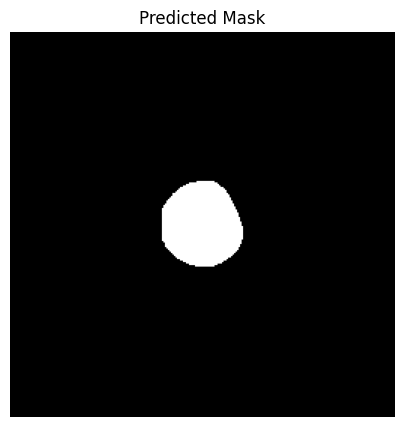

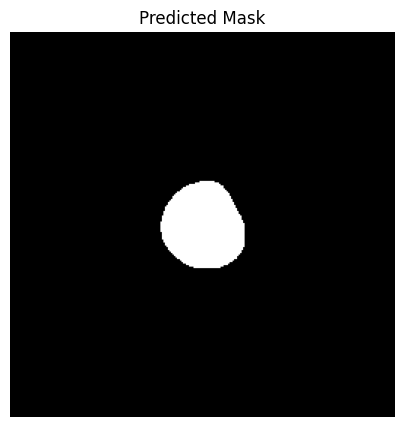

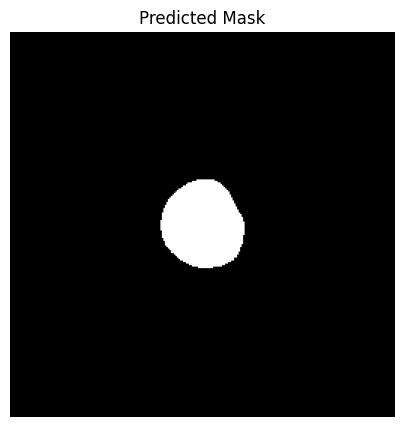

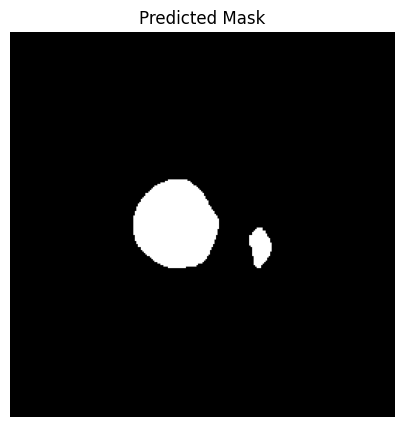

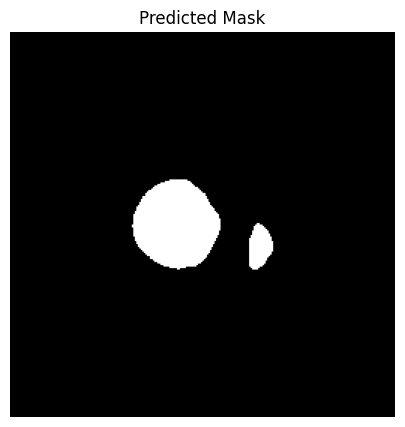

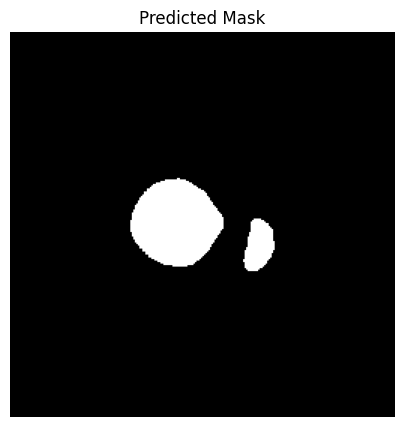

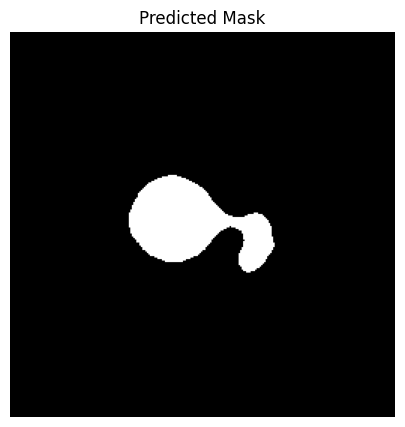

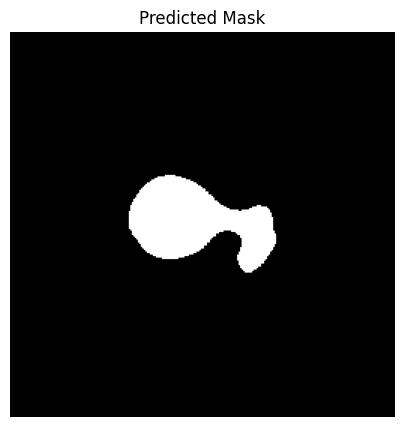

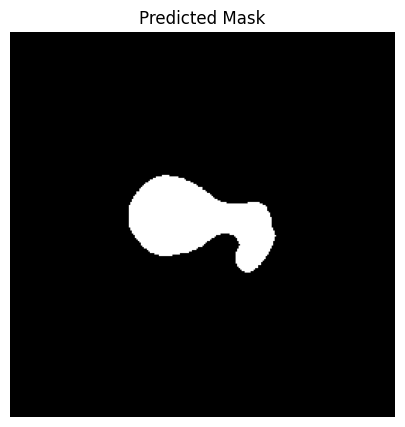

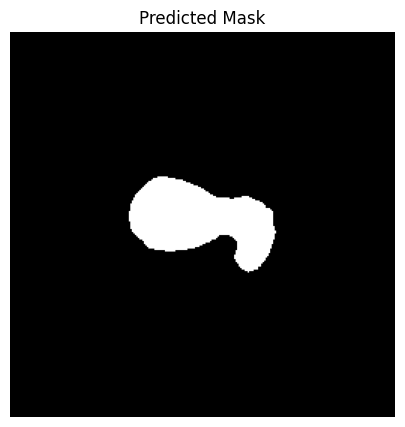

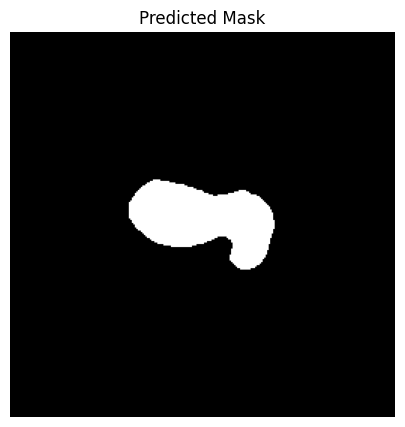

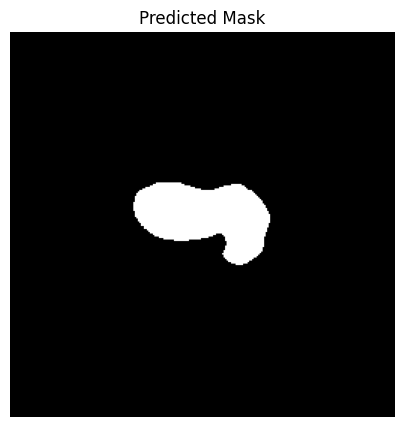

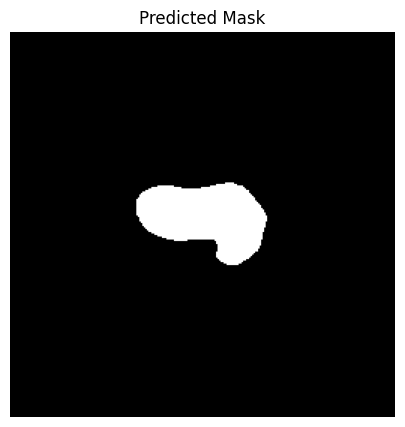

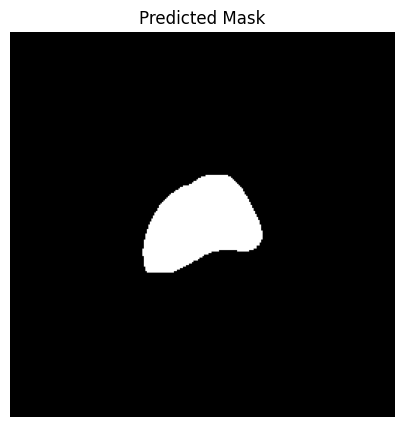

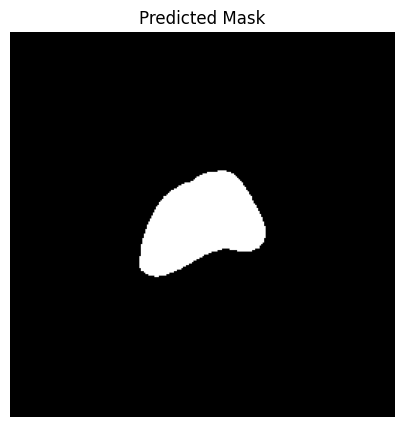

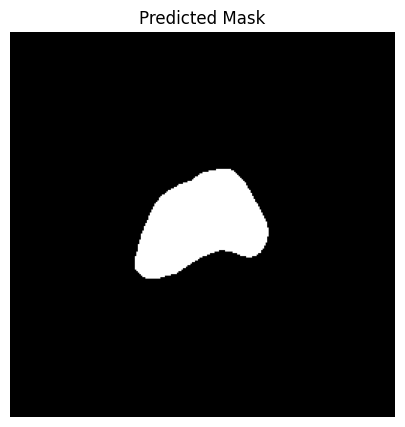

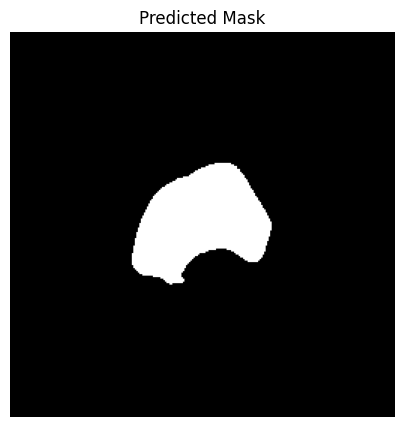

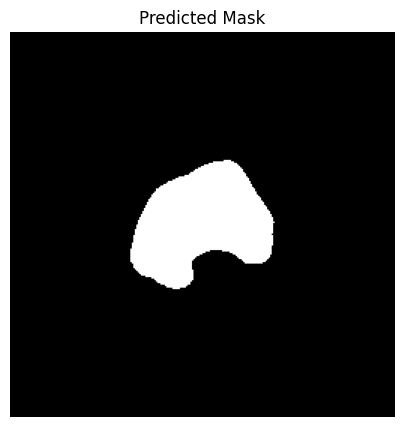

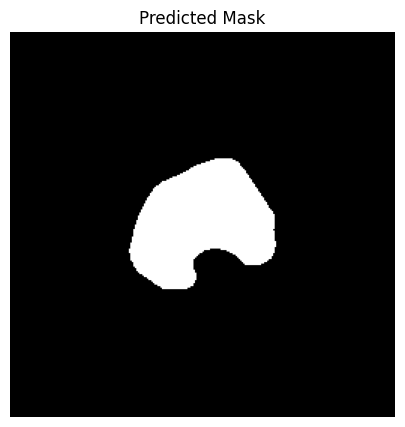

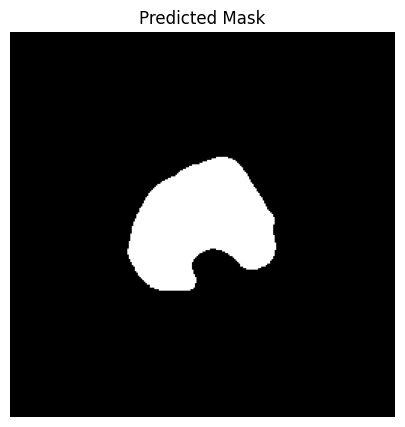

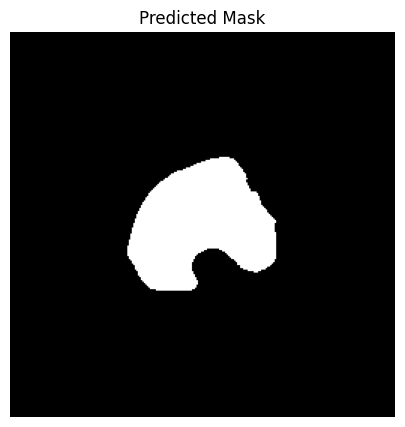

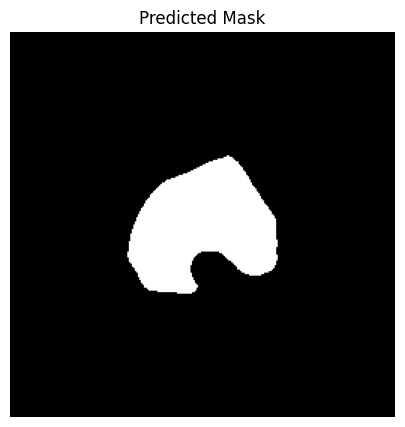

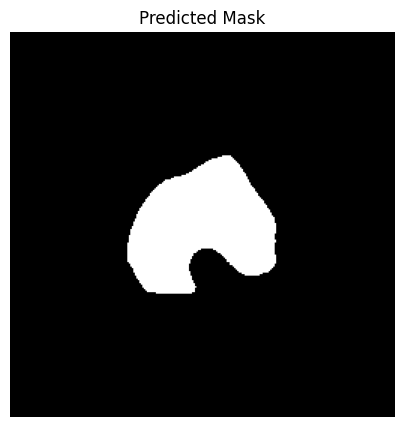

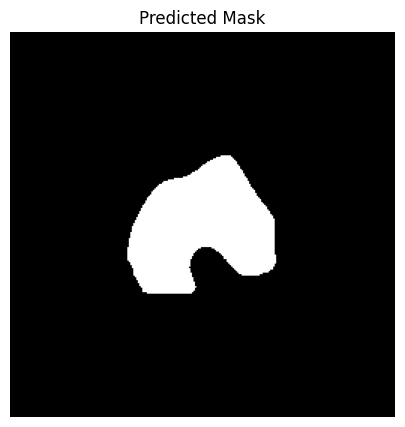

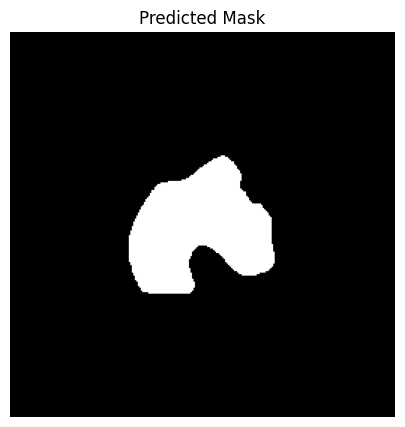

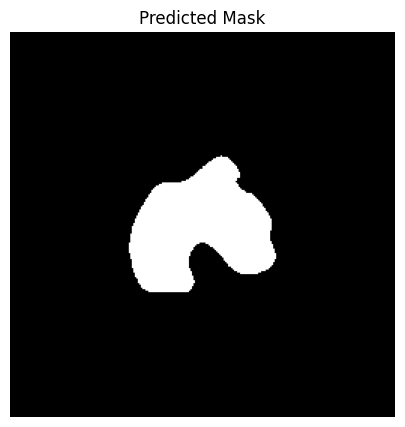

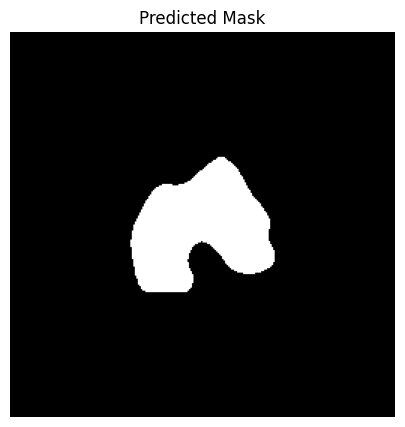

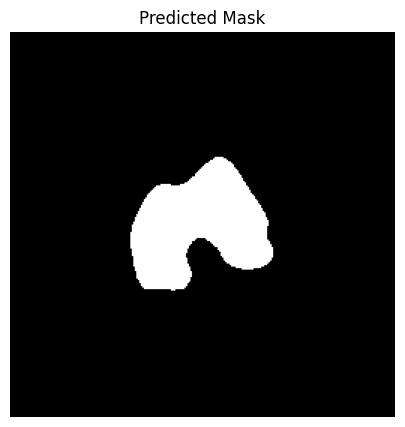

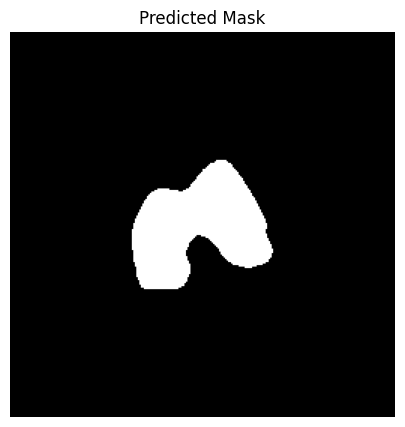

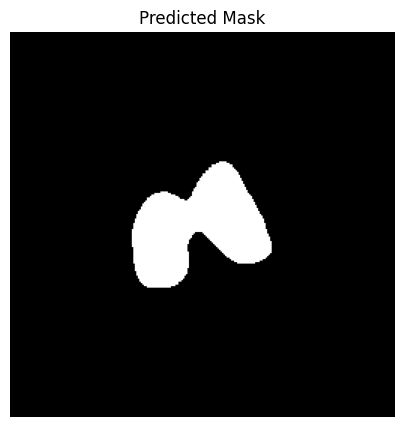

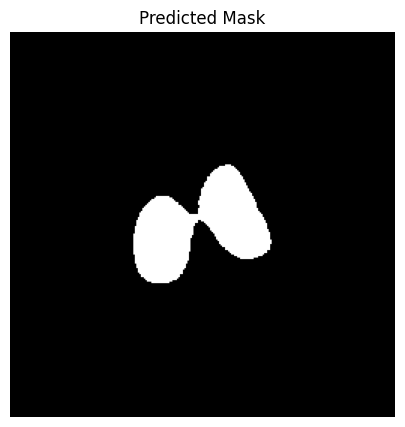

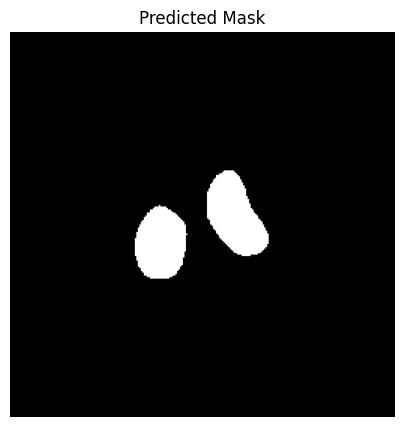

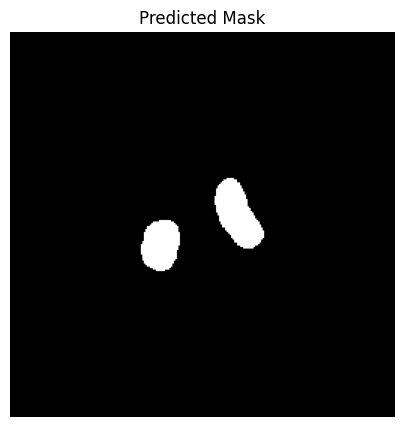

In [36]:
for i in range(40):
  index = 319 - i
  plot_single_image(test_dl, model, torch.device('cuda'), index)

In [37]:
volume_similarities,vol_sim_abs, miou_test, dicescores, execution_time, list_mioU3D,list_dice3D = calculate_results(model,test_dl )

print_results(miou_test,dicescores,volume_similarities,vol_sim_abs,execution_time,list_mioU3D,list_dice3D)

100%|██████████| 320/320 [00:12<00:00, 26.33it/s]


The MIOU for the segmentation over the test set resulted in:
0.929  +\-  0.081

The MIOU 3D for the segmentation over the test set resulted in:
0.945  +\-  0.014

The Dicescore for the segmentation over the test set resulted in:
0.961  +\-  0.058

The Dicescore 3D for the segmentation over the test set resulted in:
0.972  +\-  0.008

The volume similarity for the segmentation over the test set resulted in:
1.005  +\-  0.016

The volume similarity abs for the segmentation over the test set resulted in:
0.988  +\-  0.011


The time needed for the segmentation of 8 3D images is:
12.22 seconds.


#Resnet34 Unet++

In [38]:

model = smp.UnetPlusPlus(
    encoder_name='resnet34',
    encoder_depth=5,
    encoder_weights="imagenet",
    in_channels=1,
    classes=n_cls,
    activation=None,
    )



In [39]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model.parameters(), lr = 3e-4)


In [41]:

device = "cuda" if torch.cuda.is_available() else "cpu"

history = train(model = model, tr_dl = tr_dl, val_dl = val_dl,
                 loss_fn = loss_fn, opt = optimizer, device = device,
                 epochs = EPOCHS, save_prefix = "UnetppResnet34", n_cls=n_cls)

Start training process...
Epoch 1 train process is started...


100%|██████████| 60/60 [00:26<00:00,  2.29it/s]


Epoch 1 validation process is started...


100%|██████████| 20/20 [00:03<00:00,  5.77it/s]


Epoch 1 train process is completed.

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Epoch 1 train process results: 

Train Time         -> 29.657 secs
Train Loss         -> 0.338
Train PA           -> 0.852
Train IoU          -> 0.757
Validation Loss    -> 0.148
Validation PA      -> 0.960
Validation IoU     -> 0.901

Loss decreased from inf to 0.148!
Saving the model with the best loss value...
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Epoch 2 train process is started...


100%|██████████| 60/60 [00:25<00:00,  2.34it/s]


Epoch 2 validation process is started...


100%|██████████| 20/20 [00:03<00:00,  5.20it/s]


Epoch 2 train process is completed.

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Epoch 2 train process results: 

Train Time         -> 29.514 secs
Train Loss         -> 0.099
Train PA           -> 0.913
Train IoU          -> 0.915
Validation Loss    -> 0.068
Validation PA      -> 0.962
Validation IoU     -> 0.924

Loss decreased from 0.148 to 0.068!
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Epoch 3 train process is started...


100%|██████████| 60/60 [00:25<00:00,  2.36it/s]


Epoch 3 validation process is started...


100%|██████████| 20/20 [00:03<00:00,  5.74it/s]


Epoch 3 train process is completed.

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Epoch 3 train process results: 

Train Time         -> 28.983 secs
Train Loss         -> 0.050
Train PA           -> 0.912
Train IoU          -> 0.941
Validation Loss    -> 0.066
Validation PA      -> 0.957
Validation IoU     -> 0.876

Loss decreased from 0.068 to 0.066!
Saving the model with the best loss value...
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Epoch 4 train process is started...


100%|██████████| 60/60 [00:25<00:00,  2.33it/s]


Epoch 4 validation process is started...


100%|██████████| 20/20 [00:03<00:00,  5.99it/s]


Epoch 4 train process is completed.

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Epoch 4 train process results: 

Train Time         -> 29.103 secs
Train Loss         -> 0.034
Train PA           -> 0.913
Train IoU          -> 0.949
Validation Loss    -> 0.026
Validation PA      -> 0.962
Validation IoU     -> 0.959

Loss decreased from 0.066 to 0.026!
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Epoch 5 train process is started...


100%|██████████| 60/60 [00:25<00:00,  2.35it/s]


Epoch 5 validation process is started...


100%|██████████| 20/20 [00:03<00:00,  5.73it/s]


Epoch 5 train process is completed.

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Epoch 5 train process results: 

Train Time         -> 29.074 secs
Train Loss         -> 0.023
Train PA           -> 0.913
Train IoU          -> 0.963
Validation Loss    -> 0.022
Validation PA      -> 0.962
Validation IoU     -> 0.959

Loss decreased from 0.026 to 0.022!
Saving the model with the best loss value...
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Train process is completed in 2.454 minutes.


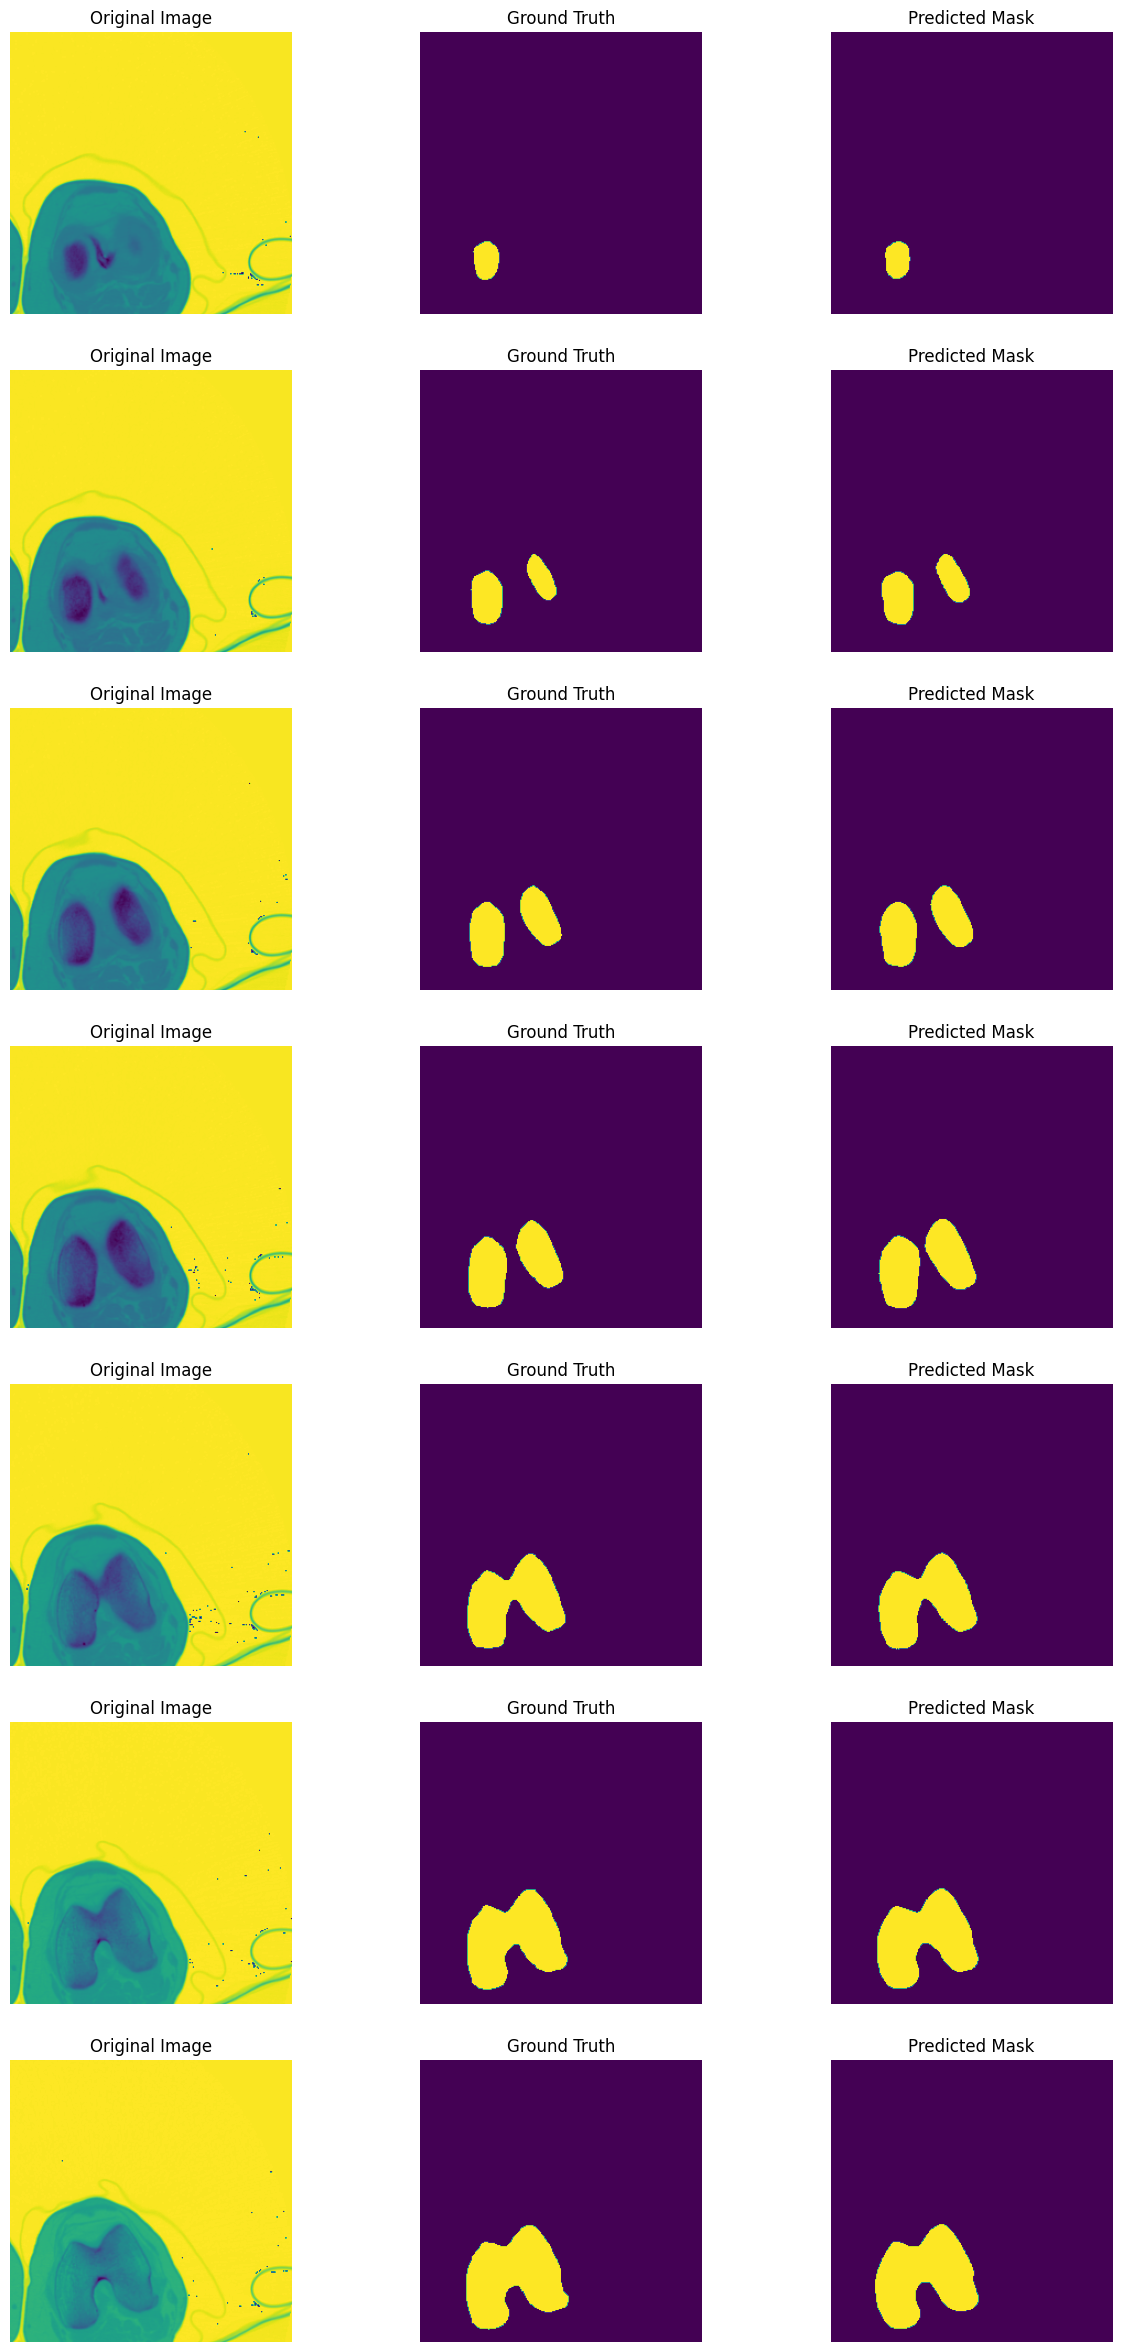

In [42]:
# model = torch.load("saved_models/liver_best_model.pt")
inference(test_dl, model = model, device = device,n_ims = 21)

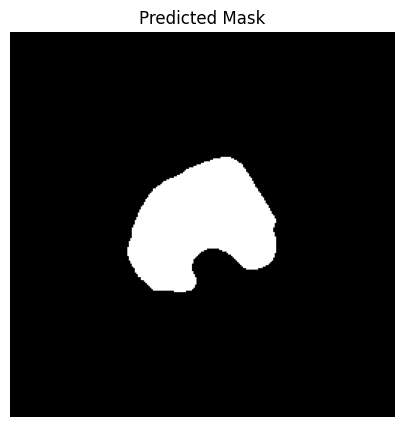

In [43]:
plot_single_image(test_dl, model, torch.device('cuda'), 320-27)

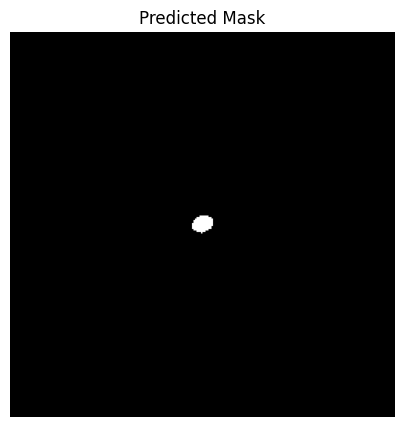

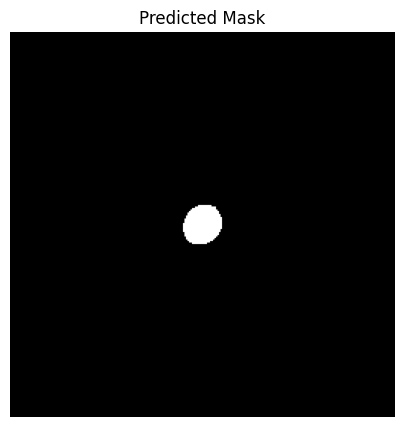

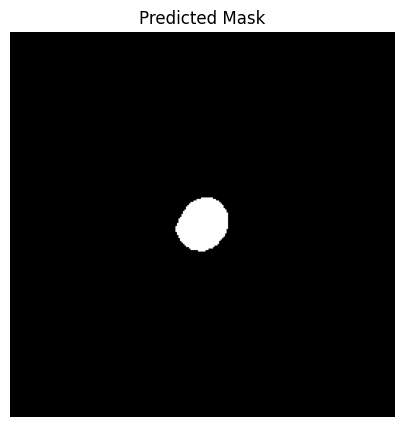

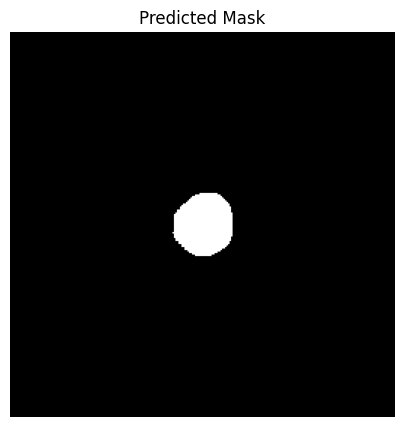

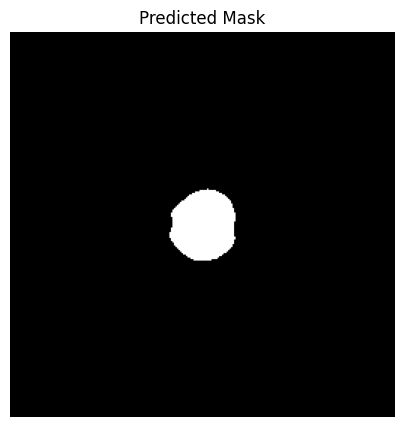

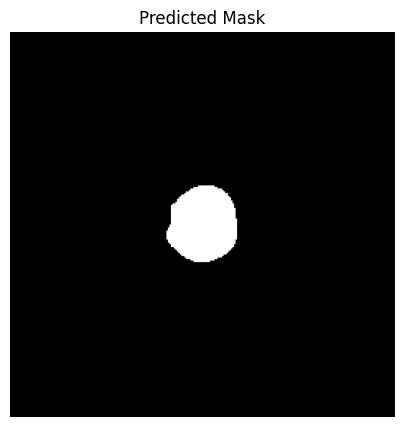

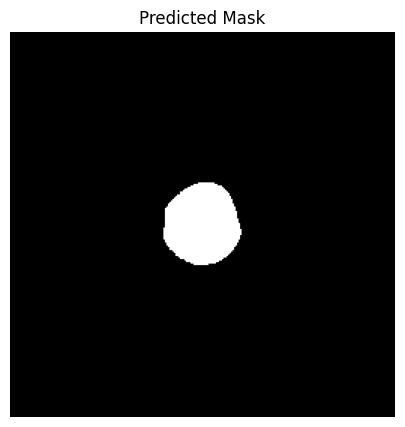

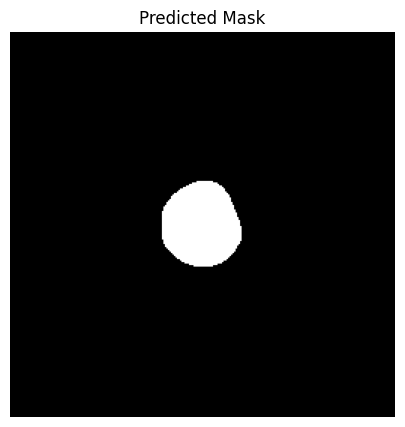

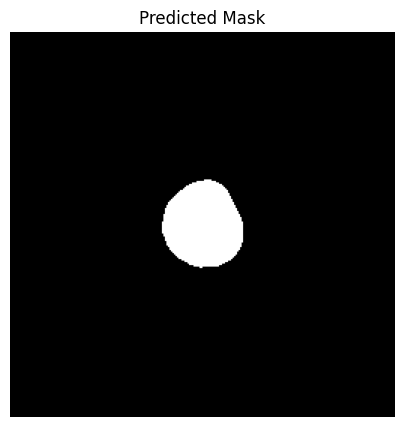

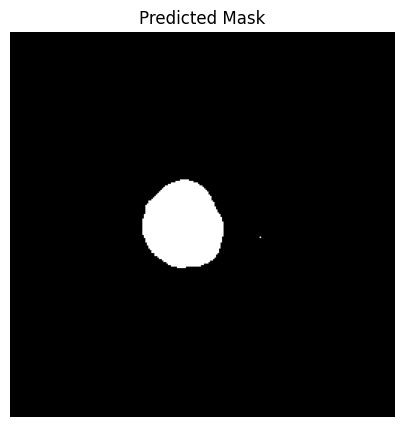

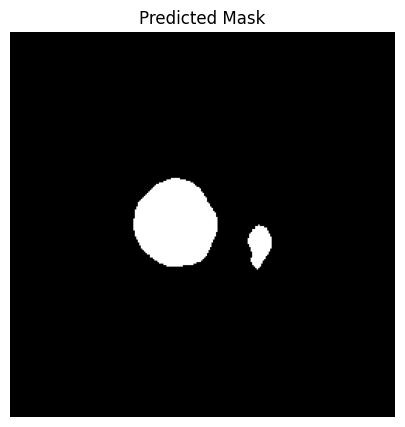

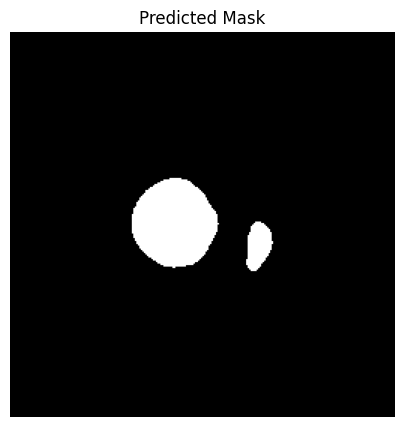

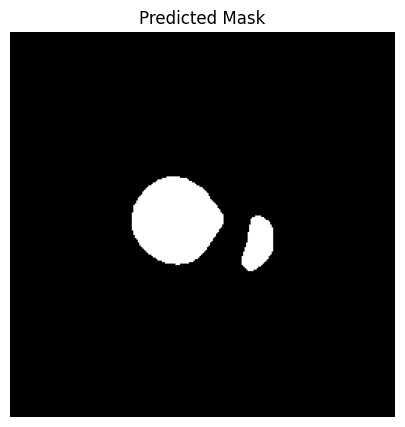

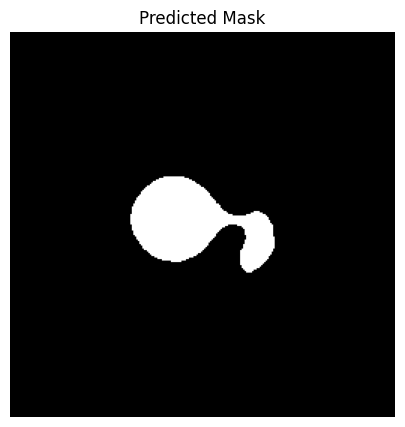

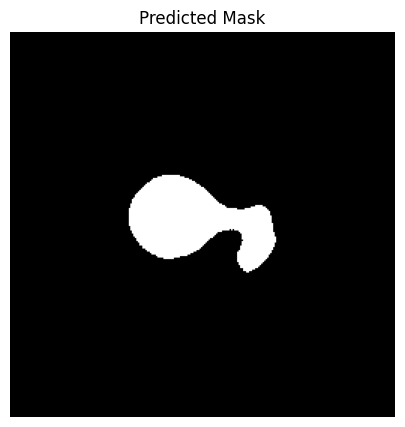

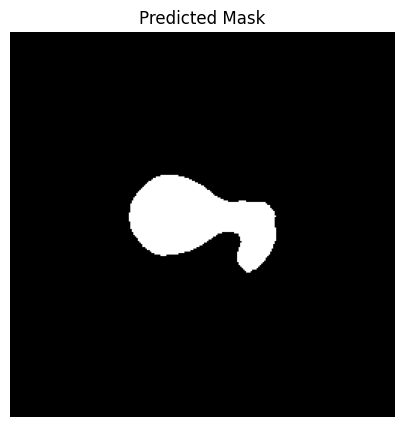

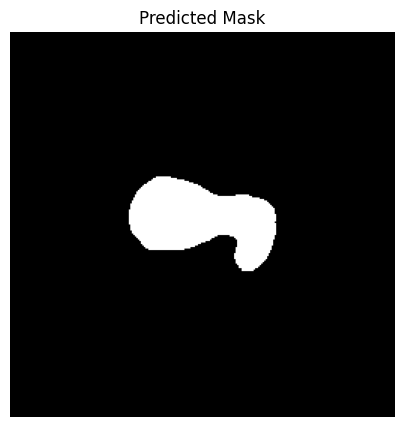

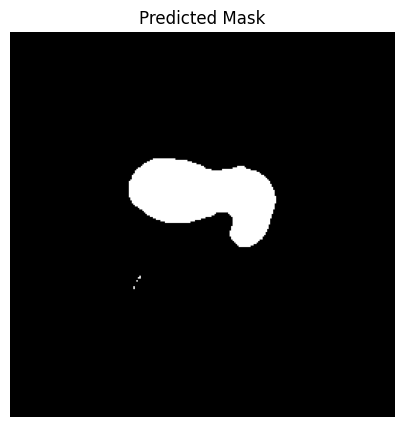

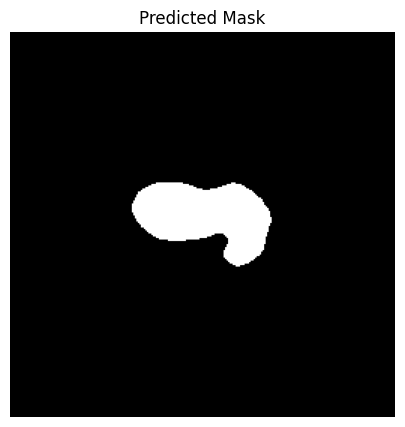

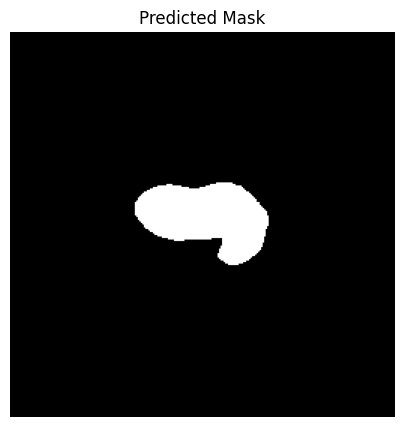

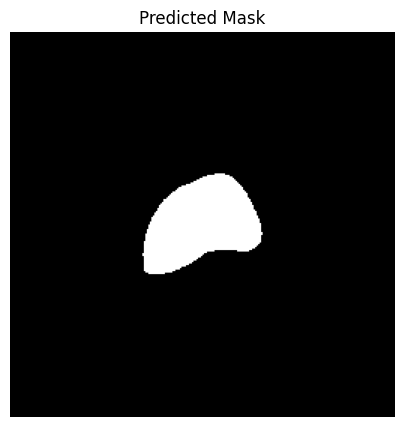

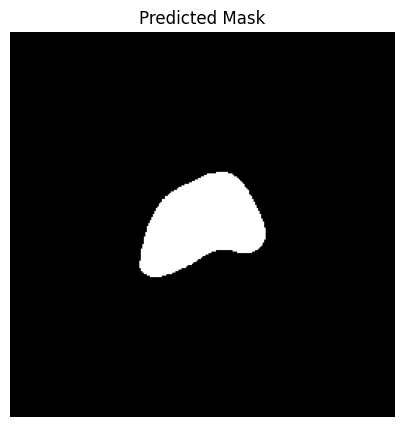

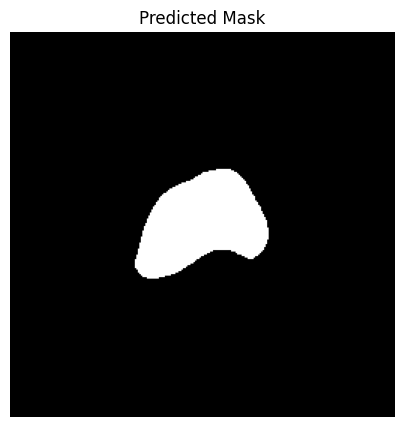

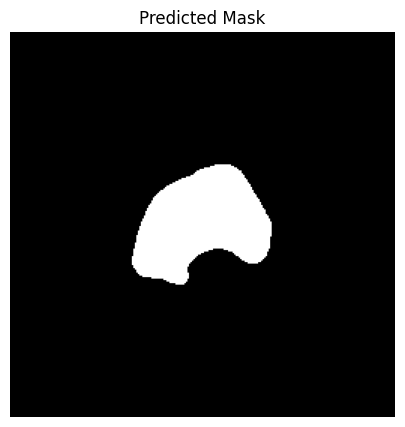

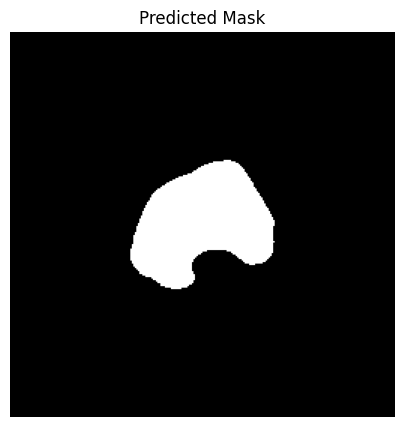

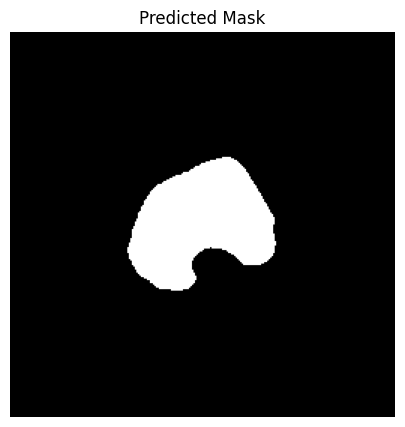

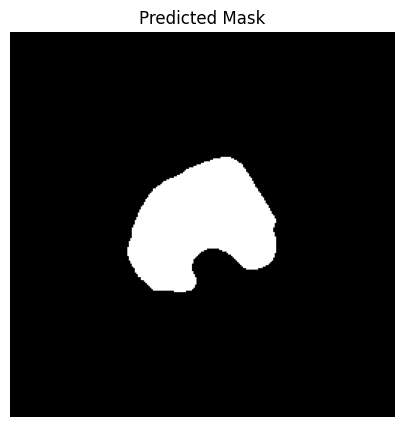

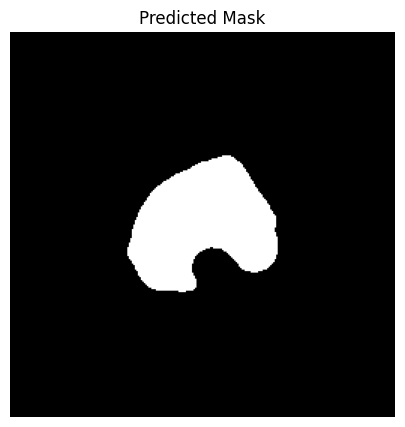

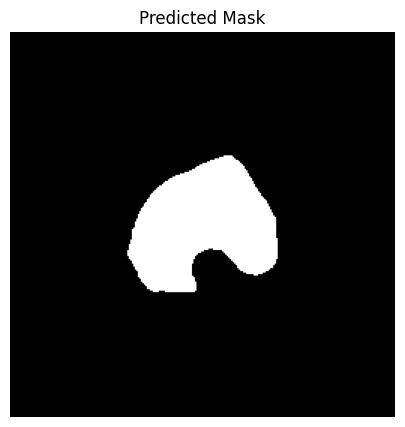

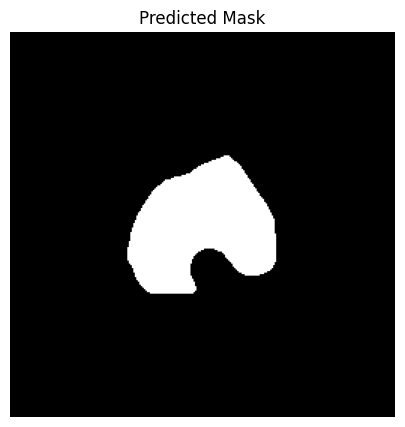

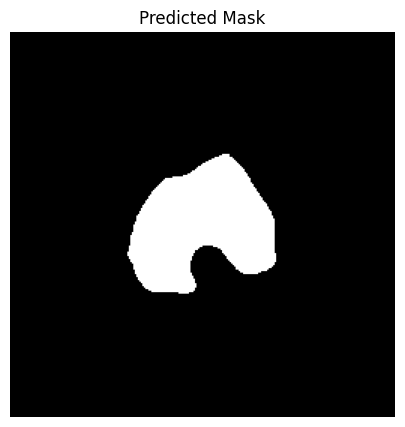

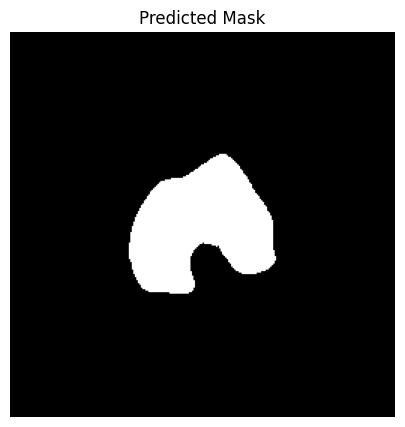

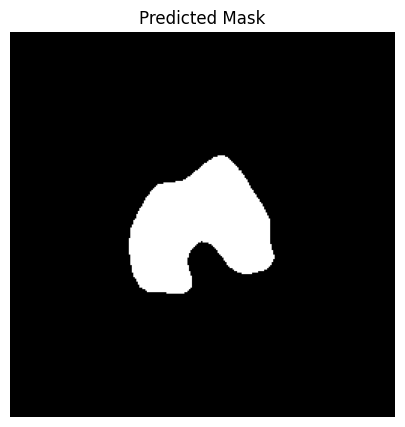

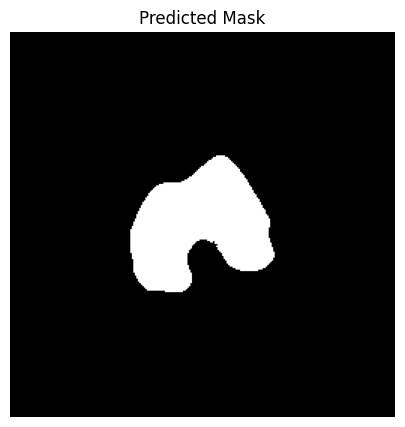

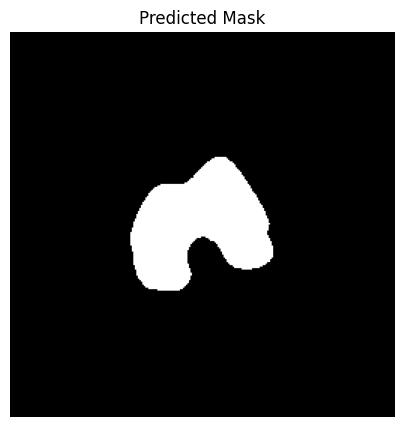

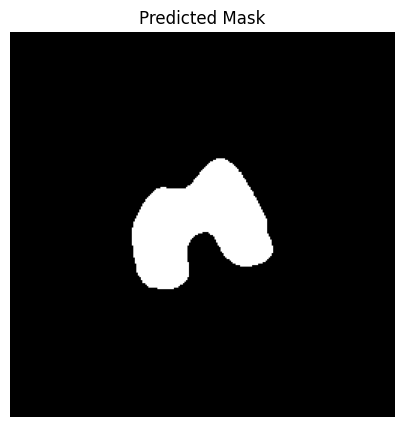

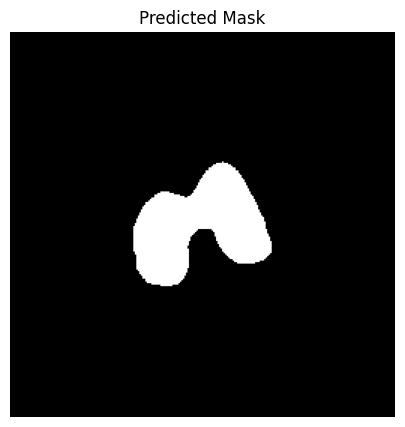

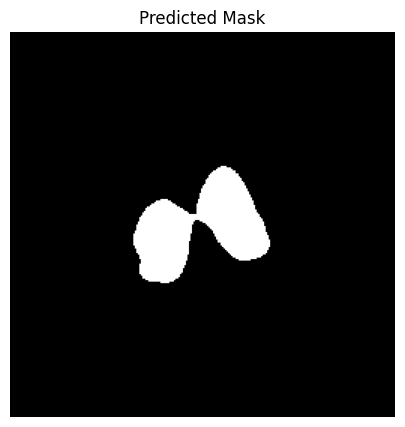

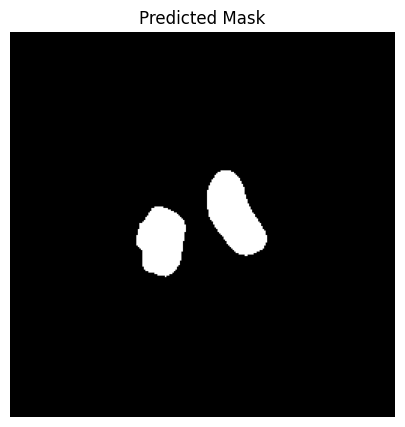

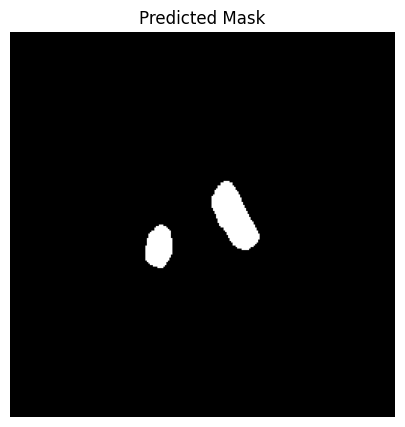

In [44]:
for i in range(40):
  index = 319 - i
  plot_single_image(test_dl, model, torch.device('cuda'), index)

In [45]:
volume_similarities,vol_sim_abs, miou_test, dicescores, execution_time, list_mioU3D,list_dice3D = calculate_results(model,test_dl )

print_results(miou_test,dicescores,volume_similarities,vol_sim_abs,execution_time,list_mioU3D,list_dice3D)

100%|██████████| 320/320 [00:06<00:00, 45.78it/s]

The MIOU for the segmentation over the test set resulted in:
0.921  +\-  0.086

The MIOU 3D for the segmentation over the test set resulted in:
0.94  +\-  0.014

The Dicescore for the segmentation over the test set resulted in:
0.956  +\-  0.06

The Dicescore 3D for the segmentation over the test set resulted in:
0.969  +\-  0.007

The volume similarity for the segmentation over the test set resulted in:
1.005  +\-  0.015

The volume similarity abs for the segmentation over the test set resulted in:
0.989  +\-  0.012


The time needed for the segmentation of 8 3D images is:
7.08 seconds.


# Unet mobile

In [46]:

model= smp.Unet(
    encoder_name='timm-mobilenetv3_large_100',
    encoder_depth=5,
    encoder_weights="imagenet",
    in_channels=1,
    classes=n_cls,
    activation=None,
    )



device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/tf_mobilenetv3_large_100-427764d5.pth" to /root/.cache/torch/hub/checkpoints/tf_mobilenetv3_large_100-427764d5.pth
100%|██████████| 21.1M/21.1M [00:00<00:00, 56.5MB/s]


In [47]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model.parameters(), lr = 3e-4)


In [49]:

device = "cuda" if torch.cuda.is_available() else "cpu"

history = train(model = model, tr_dl = tr_dl, val_dl = val_dl,
                 loss_fn = loss_fn, opt = optimizer, device = device,
                 epochs = EPOCHS, save_prefix = "UnetMobile", n_cls=n_cls)

Start training process...
Epoch 1 train process is started...


100%|██████████| 60/60 [00:10<00:00,  5.77it/s]


Epoch 1 validation process is started...


100%|██████████| 20/20 [00:02<00:00,  9.00it/s]


Epoch 1 train process is completed.

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Epoch 1 train process results: 

Train Time         -> 12.654 secs
Train Loss         -> 0.248
Train PA           -> 0.887
Train IoU          -> 0.724
Validation Loss    -> 0.099
Validation PA      -> 0.953
Validation IoU     -> 0.865

Loss decreased from inf to 0.099!
Saving the model with the best loss value...
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Epoch 2 train process is started...


100%|██████████| 60/60 [00:10<00:00,  5.88it/s]


Epoch 2 validation process is started...


100%|██████████| 20/20 [00:02<00:00,  8.61it/s]


Epoch 2 train process is completed.

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Epoch 2 train process results: 

Train Time         -> 12.558 secs
Train Loss         -> 0.064
Train PA           -> 0.913
Train IoU          -> 0.909
Validation Loss    -> 0.039
Validation PA      -> 0.962
Validation IoU     -> 0.940

Loss decreased from 0.099 to 0.039!
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Epoch 3 train process is started...


100%|██████████| 60/60 [00:10<00:00,  5.71it/s]


Epoch 3 validation process is started...


100%|██████████| 20/20 [00:01<00:00, 12.34it/s]


Epoch 3 train process is completed.

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Epoch 3 train process results: 

Train Time         -> 12.156 secs
Train Loss         -> 0.035
Train PA           -> 0.913
Train IoU          -> 0.941
Validation Loss    -> 0.033
Validation PA      -> 0.959
Validation IoU     -> 0.930

Loss decreased from 0.039 to 0.033!
Saving the model with the best loss value...
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Epoch 4 train process is started...


100%|██████████| 60/60 [00:10<00:00,  5.80it/s]


Epoch 4 validation process is started...


100%|██████████| 20/20 [00:01<00:00, 12.41it/s]


Epoch 4 train process is completed.

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Epoch 4 train process results: 

Train Time         -> 11.969 secs
Train Loss         -> 0.022
Train PA           -> 0.912
Train IoU          -> 0.953
Validation Loss    -> 0.019
Validation PA      -> 0.962
Validation IoU     -> 0.958

Loss decreased from 0.033 to 0.019!
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Epoch 5 train process is started...


100%|██████████| 60/60 [00:10<00:00,  5.77it/s]


Epoch 5 validation process is started...


100%|██████████| 20/20 [00:01<00:00, 11.56it/s]

Epoch 5 train process is completed.

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Epoch 5 train process results: 

Train Time         -> 12.158 secs
Train Loss         -> 0.017
Train PA           -> 0.912
Train IoU          -> 0.961
Validation Loss    -> 0.020
Validation PA      -> 0.962
Validation IoU     -> 0.950

Loss did not decrease for 1 epoch(s)!
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Train process is completed in 1.030 minutes.


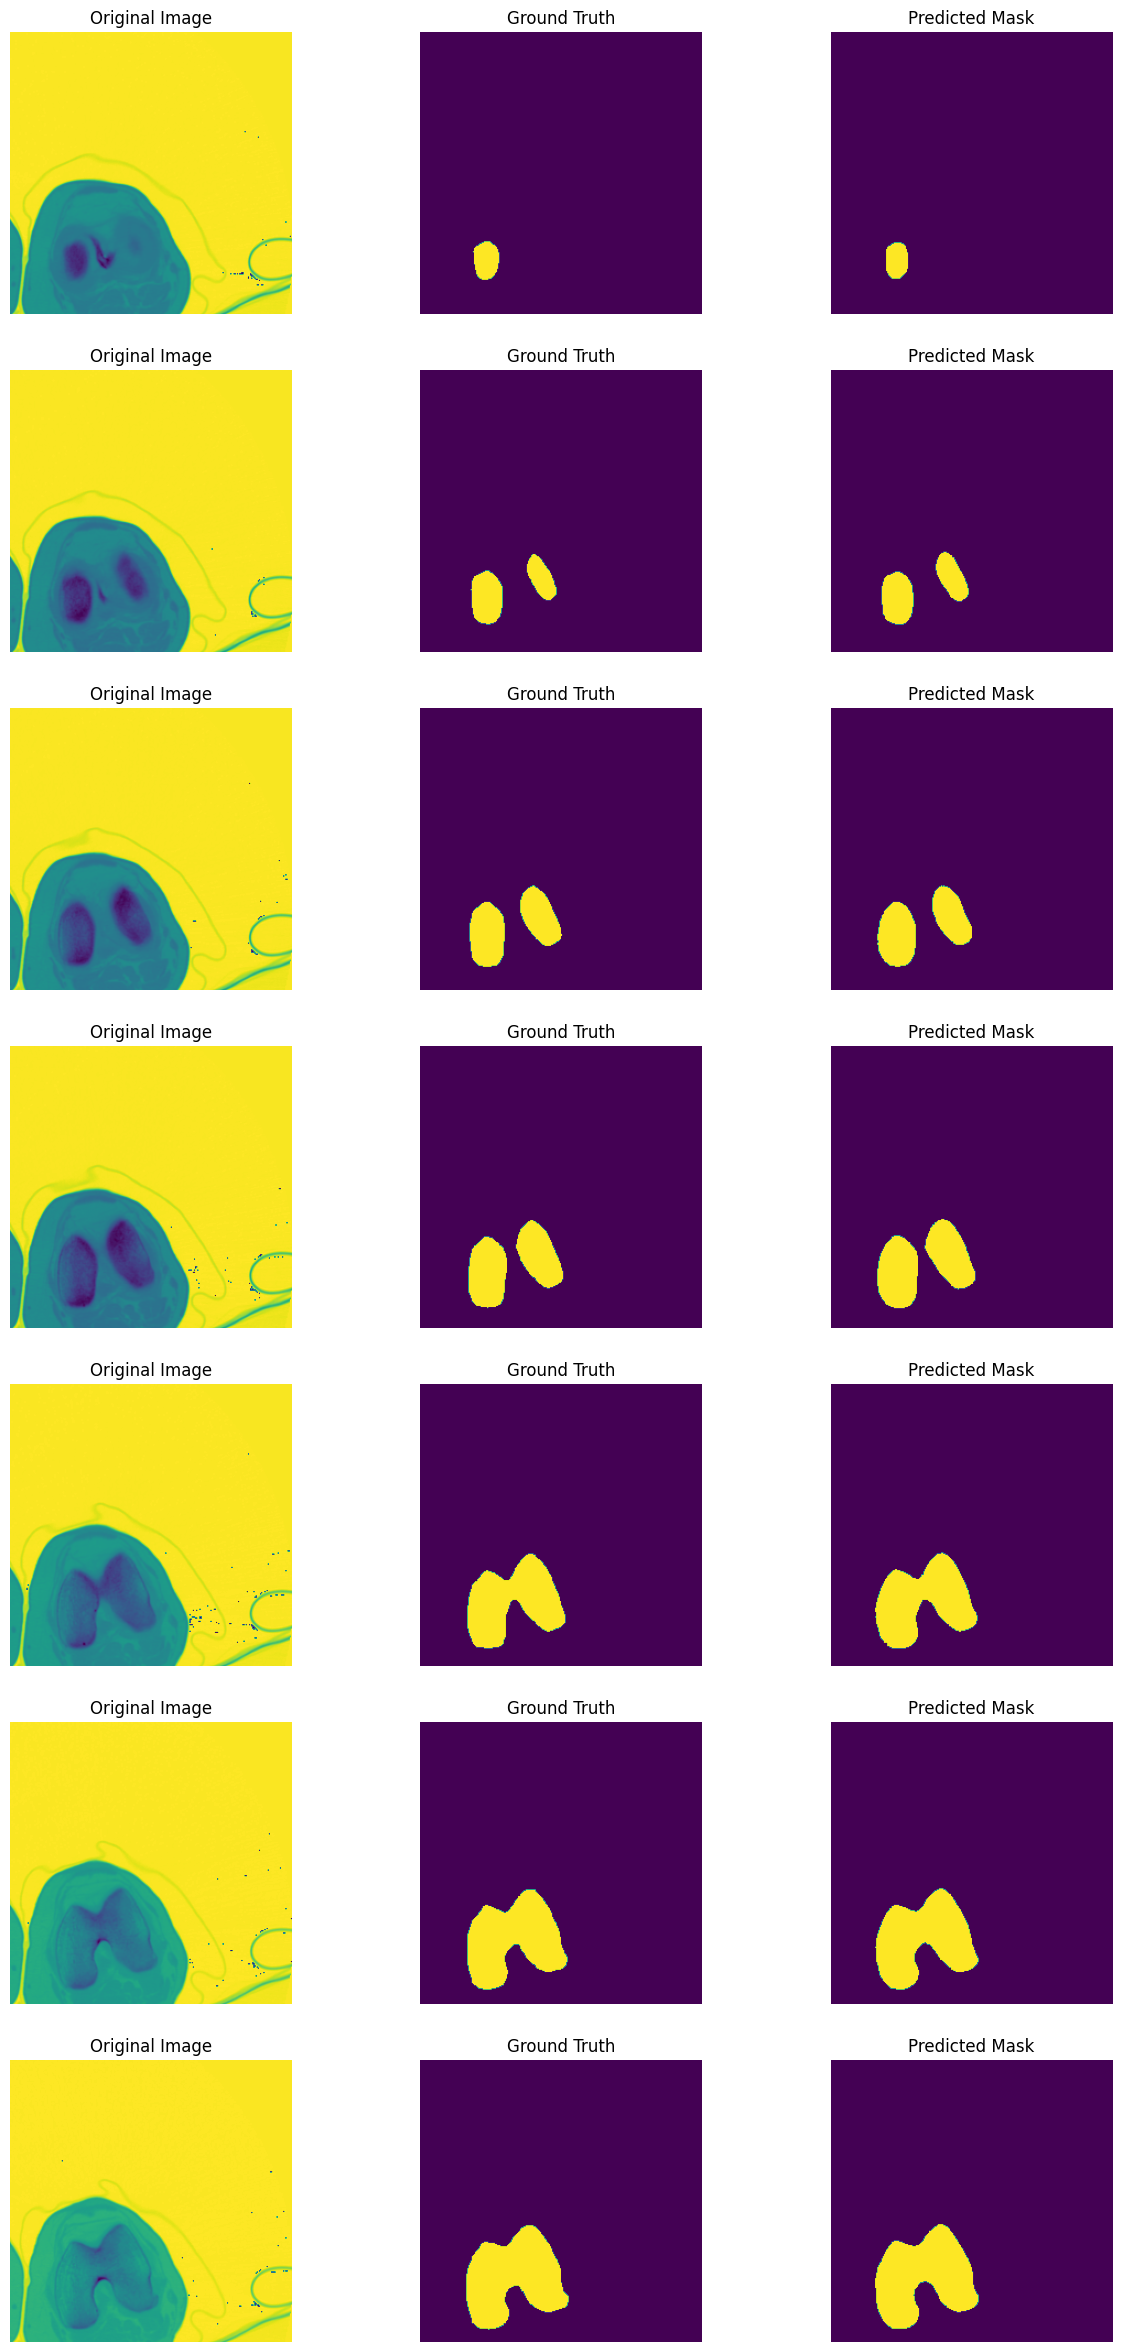

In [50]:
inference(test_dl, model = model, device = device,n_ims = 21)

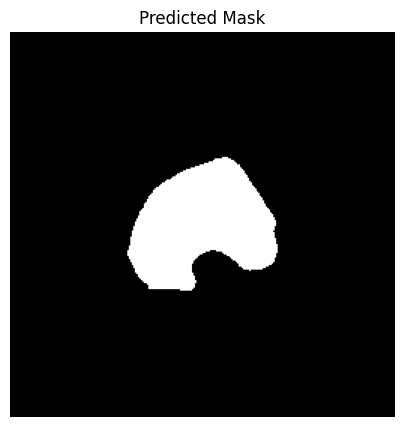

In [51]:
plot_single_image(test_dl, model, torch.device('cuda'), 320-27)

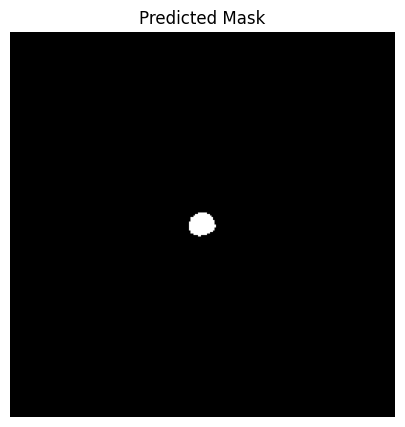

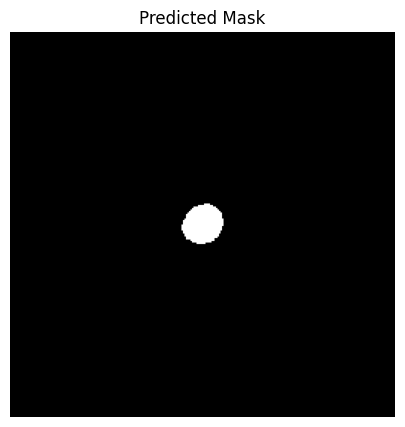

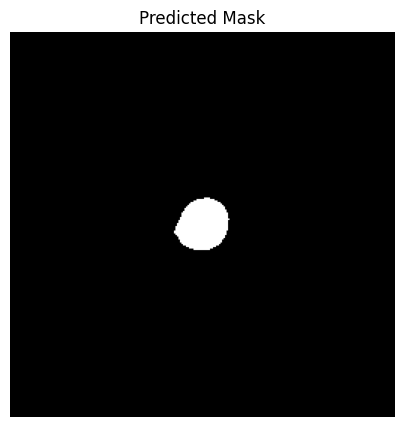

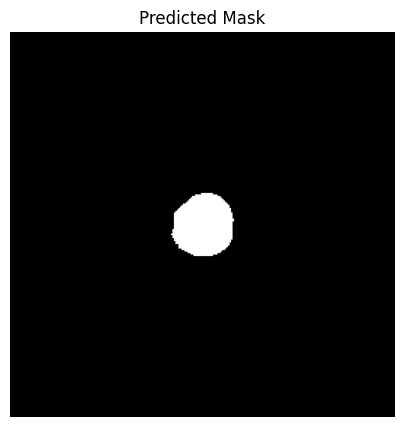

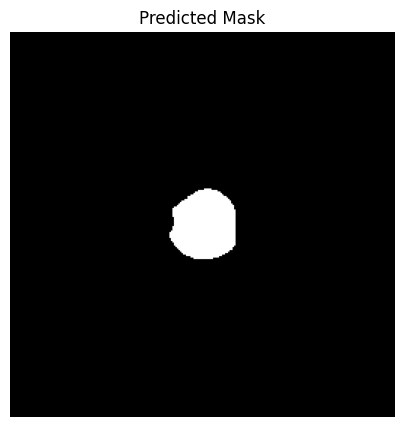

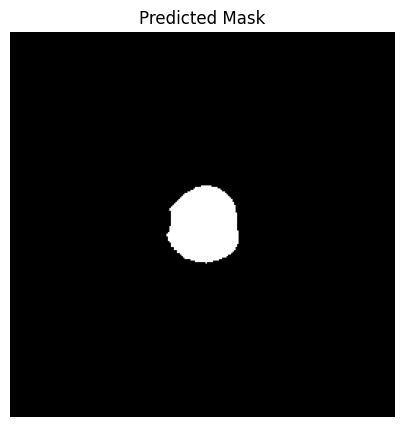

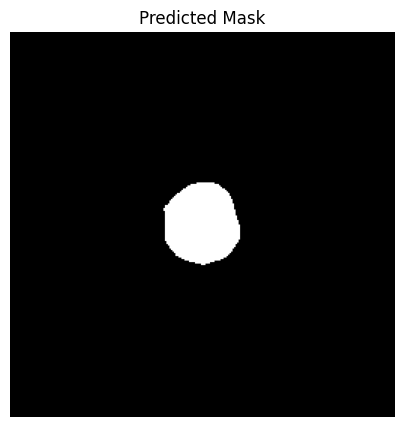

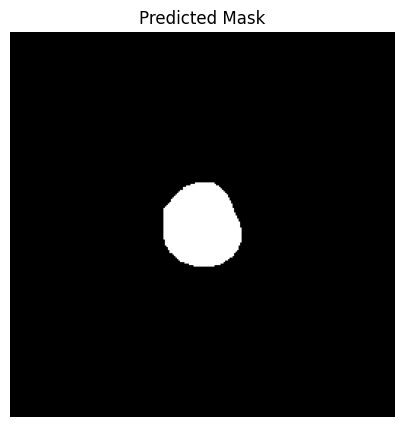

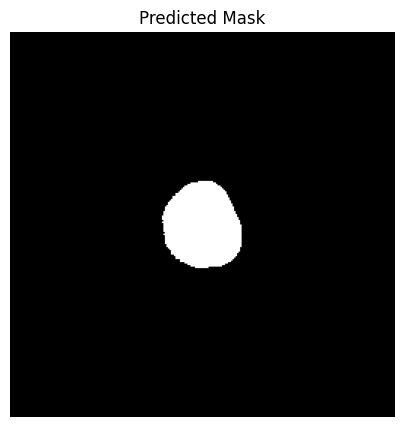

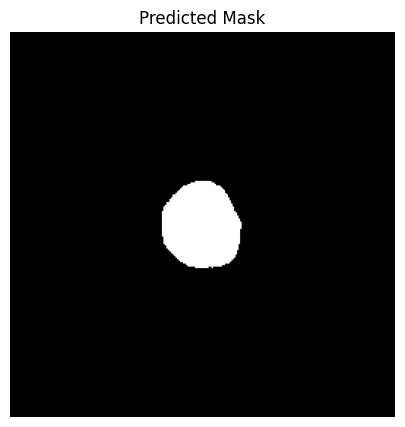

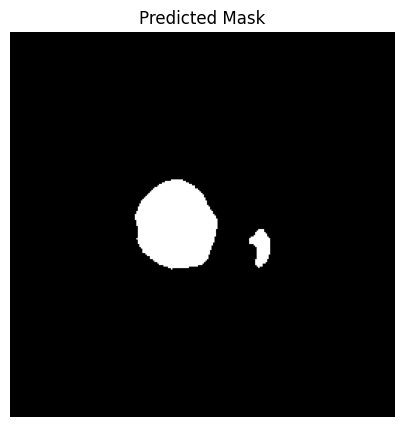

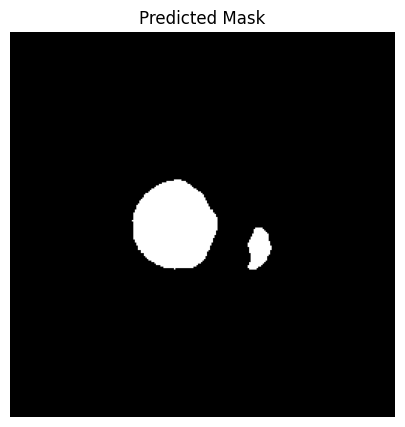

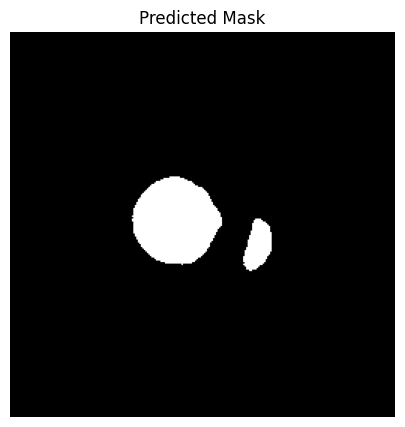

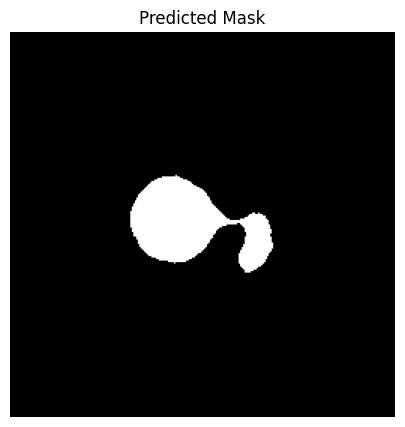

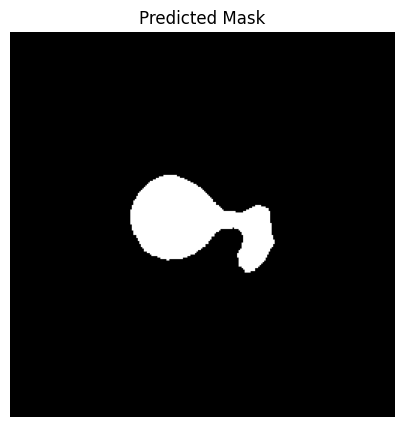

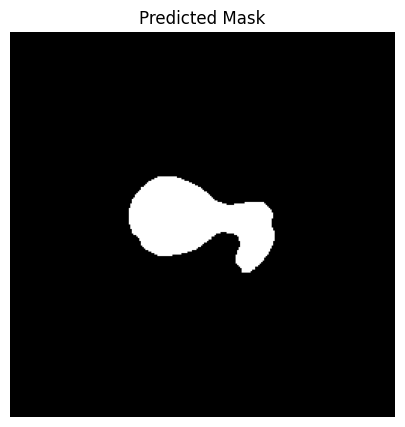

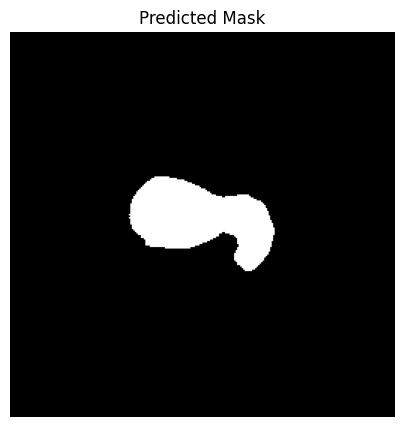

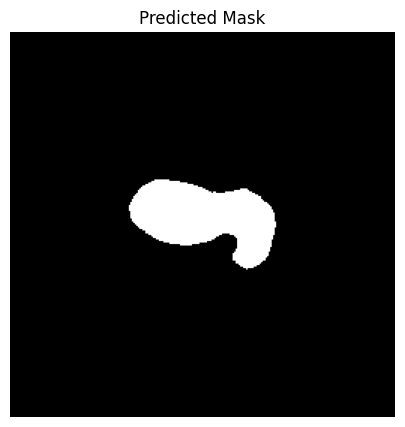

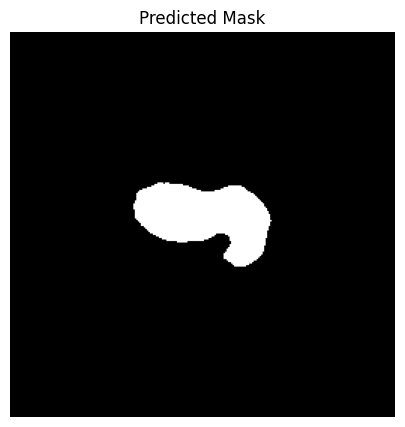

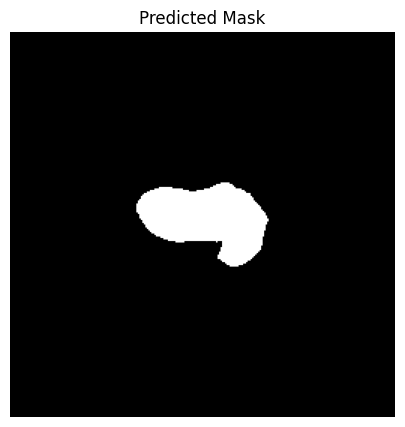

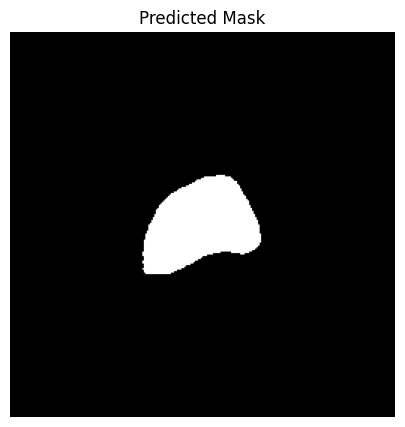

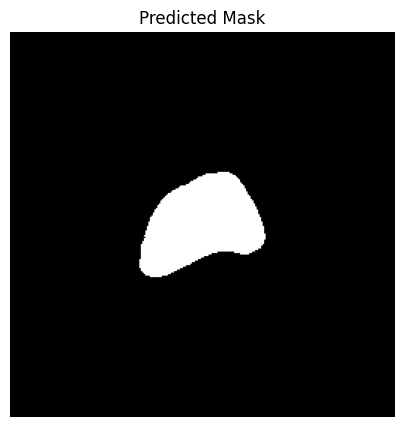

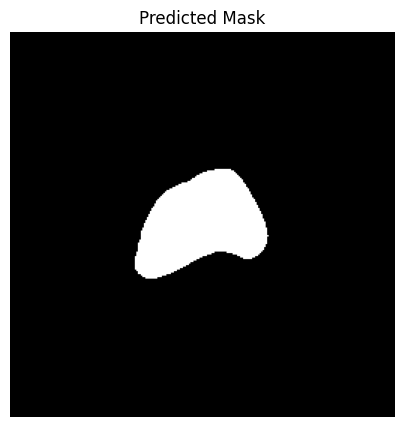

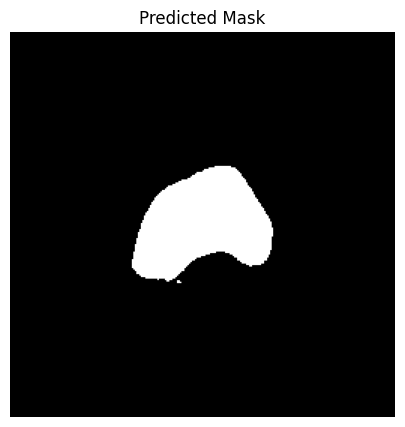

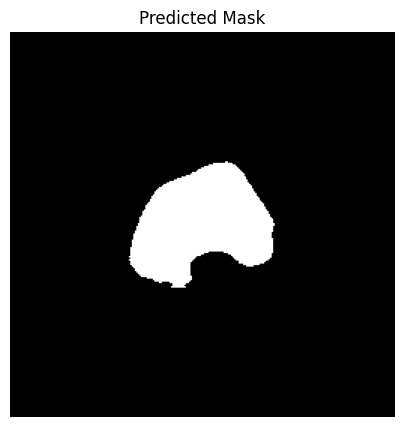

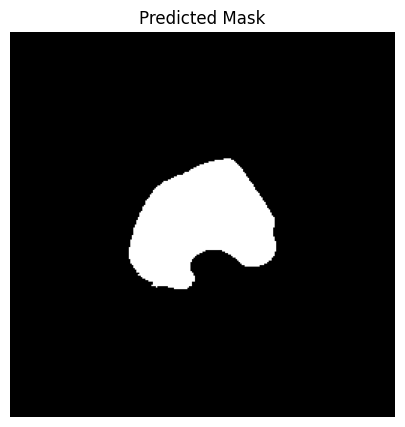

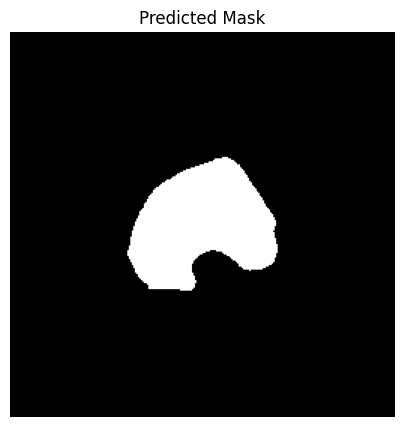

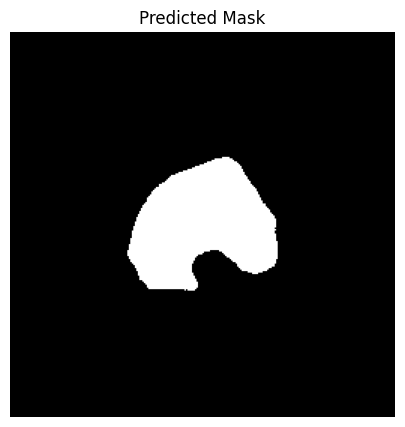

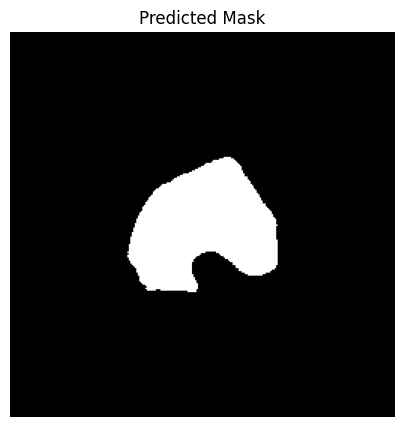

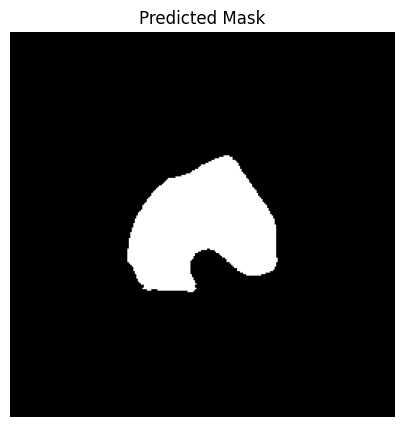

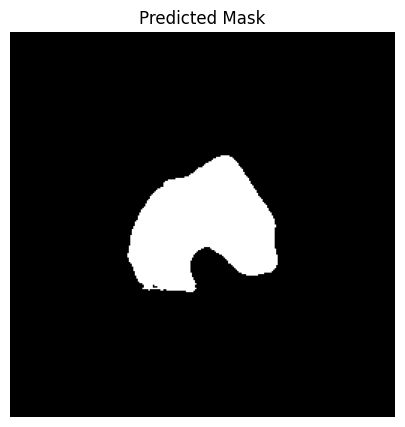

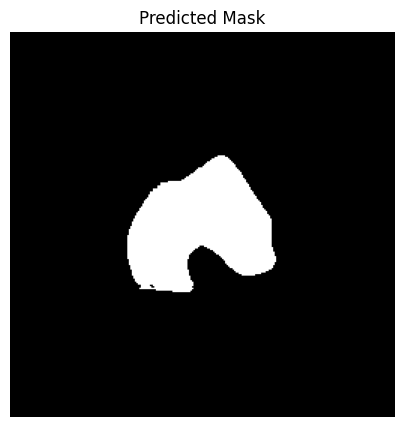

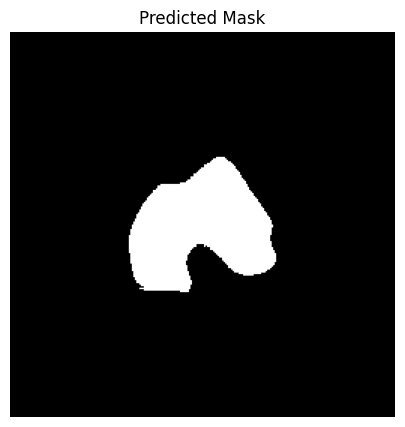

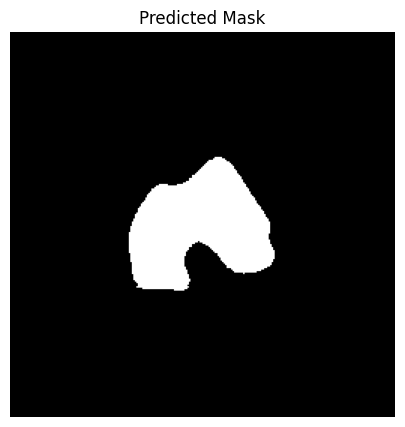

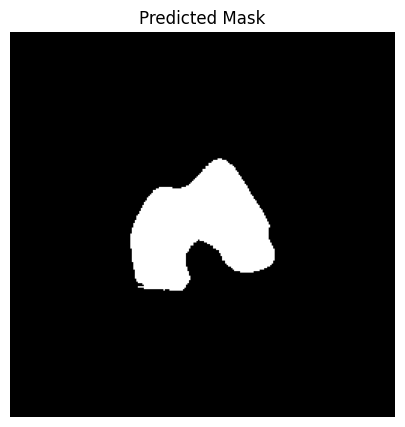

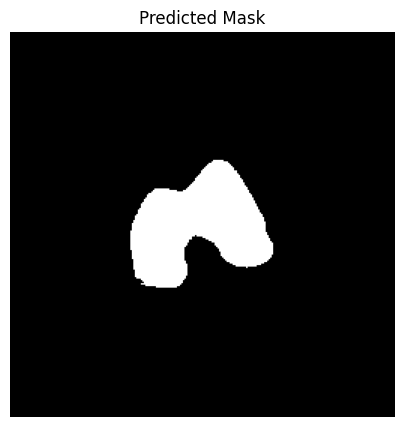

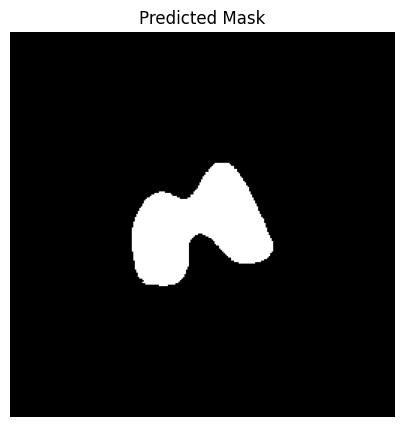

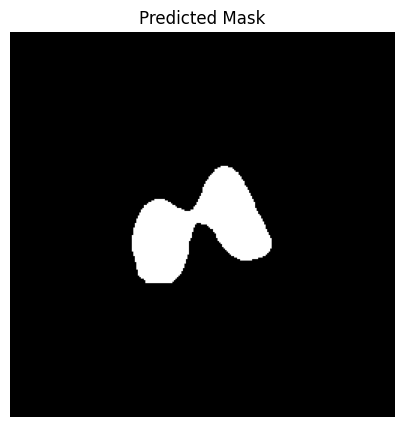

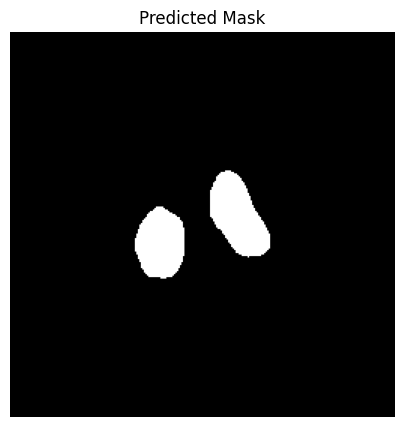

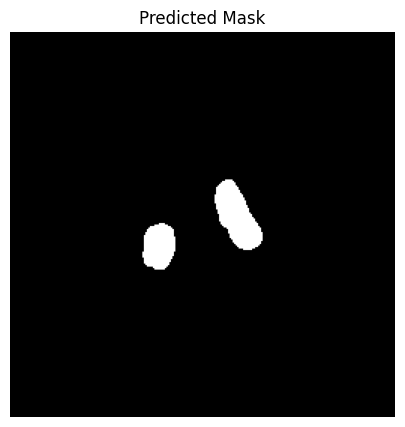

In [52]:
for i in range(40):
  index = 319 - i
  plot_single_image(test_dl, model, torch.device('cuda'), index)

In [53]:
volume_similarities,vol_sim_abs, miou_test, dicescores, execution_time, list_mioU3D,list_dice3D = calculate_results(model,test_dl )

print_results(miou_test,dicescores,volume_similarities,vol_sim_abs,execution_time,list_mioU3D,list_dice3D)

100%|██████████| 320/320 [00:07<00:00, 42.89it/s]

The MIOU for the segmentation over the test set resulted in:
0.922  +\-  0.082

The MIOU 3D for the segmentation over the test set resulted in:
0.94  +\-  0.012

The Dicescore for the segmentation over the test set resulted in:
0.957  +\-  0.057

The Dicescore 3D for the segmentation over the test set resulted in:
0.969  +\-  0.006

The volume similarity for the segmentation over the test set resulted in:
0.999  +\-  0.016

The volume similarity abs for the segmentation over the test set resulted in:
0.988  +\-  0.01


The time needed for the segmentation of 8 3D images is:
7.54 seconds.


# Unet++ mobile

In [54]:

model= smp.UnetPlusPlus(
    encoder_name='timm-mobilenetv3_large_100',
    encoder_depth=5,
    encoder_weights="imagenet",
    in_channels=1,
    classes=n_cls,
    activation=None,
    )

In [55]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model.parameters(), lr = 3e-4)


In [57]:

device = "cuda" if torch.cuda.is_available() else "cpu"

history = train(model = model, tr_dl = tr_dl, val_dl = val_dl,
                 loss_fn = loss_fn, opt = optimizer, device = device,
                 epochs = EPOCHS, save_prefix = "UnetppMobile", n_cls=n_cls)

Start training process...
Epoch 1 train process is started...


100%|██████████| 60/60 [00:14<00:00,  4.15it/s]


Epoch 1 validation process is started...


100%|██████████| 20/20 [00:02<00:00,  9.21it/s]


Epoch 1 train process is completed.

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Epoch 1 train process results: 

Train Time         -> 16.635 secs
Train Loss         -> 0.662
Train PA           -> 0.662
Train IoU          -> 0.503
Validation Loss    -> 0.272
Validation PA      -> 0.945
Validation IoU     -> 0.823

Loss decreased from inf to 0.272!
Saving the model with the best loss value...
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Epoch 2 train process is started...


100%|██████████| 60/60 [00:14<00:00,  4.15it/s]


Epoch 2 validation process is started...


100%|██████████| 20/20 [00:02<00:00,  9.32it/s]


Epoch 2 train process is completed.

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Epoch 2 train process results: 

Train Time         -> 16.613 secs
Train Loss         -> 0.157
Train PA           -> 0.913
Train IoU          -> 0.897
Validation Loss    -> 0.103
Validation PA      -> 0.962
Validation IoU     -> 0.937

Loss decreased from 0.272 to 0.103!
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Epoch 3 train process is started...


100%|██████████| 60/60 [00:14<00:00,  4.11it/s]


Epoch 3 validation process is started...


100%|██████████| 20/20 [00:02<00:00,  9.13it/s]


Epoch 3 train process is completed.

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Epoch 3 train process results: 

Train Time         -> 16.828 secs
Train Loss         -> 0.087
Train PA           -> 0.914
Train IoU          -> 0.926
Validation Loss    -> 0.066
Validation PA      -> 0.962
Validation IoU     -> 0.938

Loss decreased from 0.103 to 0.066!
Saving the model with the best loss value...
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Epoch 4 train process is started...


100%|██████████| 60/60 [00:14<00:00,  4.10it/s]


Epoch 4 validation process is started...


100%|██████████| 20/20 [00:02<00:00,  8.42it/s]


Epoch 4 train process is completed.

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Epoch 4 train process results: 

Train Time         -> 17.060 secs
Train Loss         -> 0.059
Train PA           -> 0.914
Train IoU          -> 0.940
Validation Loss    -> 0.046
Validation PA      -> 0.962
Validation IoU     -> 0.948

Loss decreased from 0.066 to 0.046!
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Epoch 5 train process is started...


100%|██████████| 60/60 [00:14<00:00,  4.15it/s]


Epoch 5 validation process is started...


100%|██████████| 20/20 [00:02<00:00,  7.71it/s]


Epoch 5 train process is completed.

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Epoch 5 train process results: 

Train Time         -> 17.080 secs
Train Loss         -> 0.042
Train PA           -> 0.913
Train IoU          -> 0.954
Validation Loss    -> 0.037
Validation PA      -> 0.961
Validation IoU     -> 0.950

Loss decreased from 0.046 to 0.037!
Saving the model with the best loss value...
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Train process is completed in 1.413 minutes.


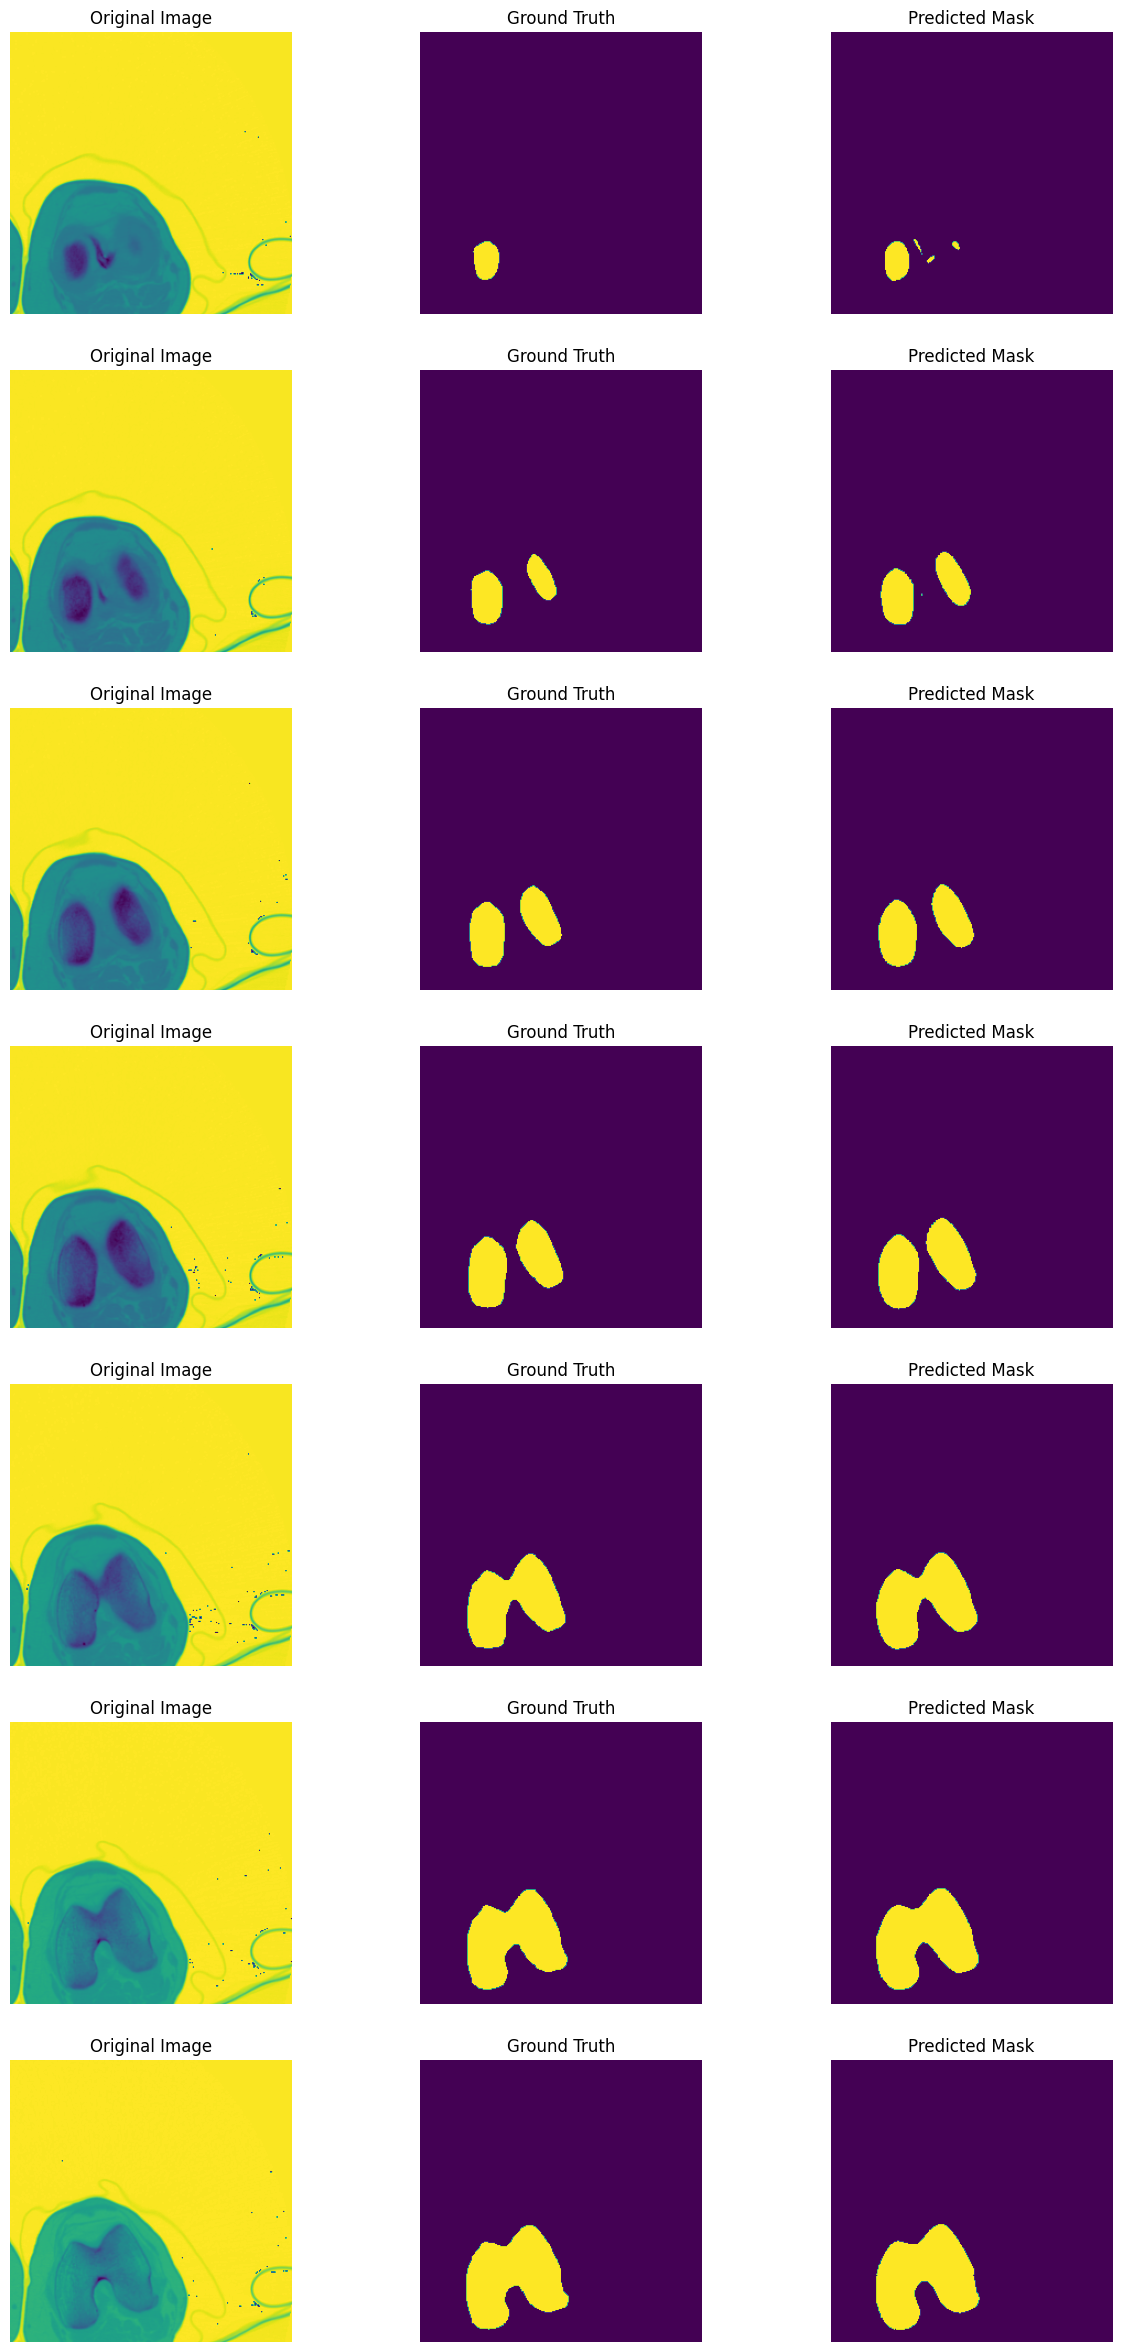

In [58]:
inference(test_dl, model = model, device = device,n_ims = 21)

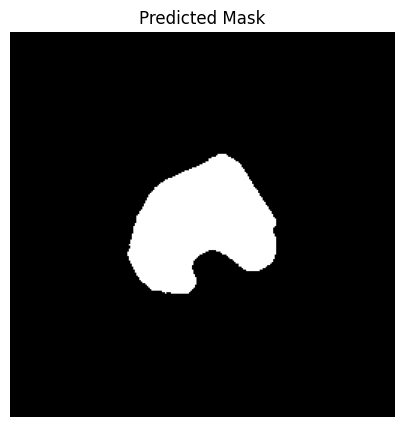

In [59]:
plot_single_image(test_dl, model, torch.device('cuda'), 320-27)

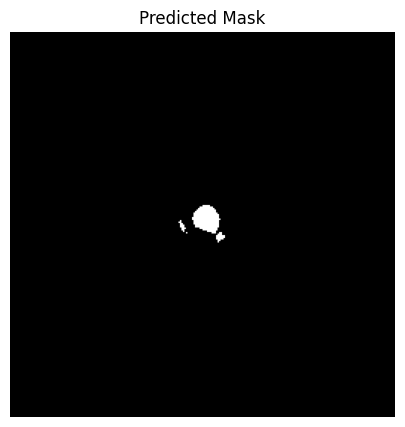

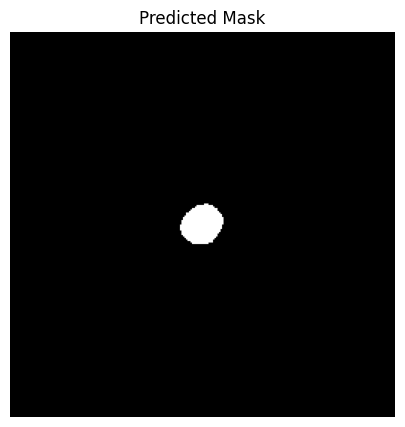

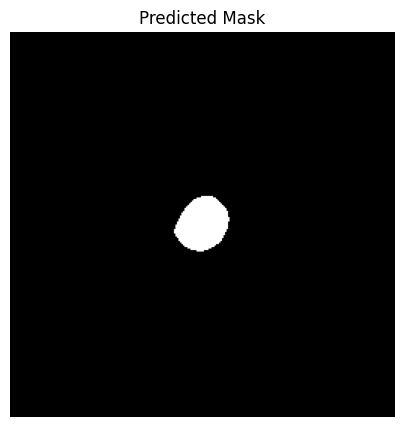

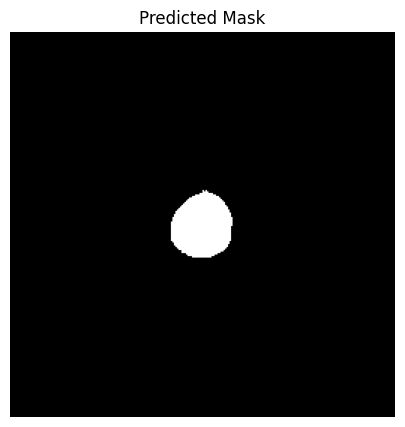

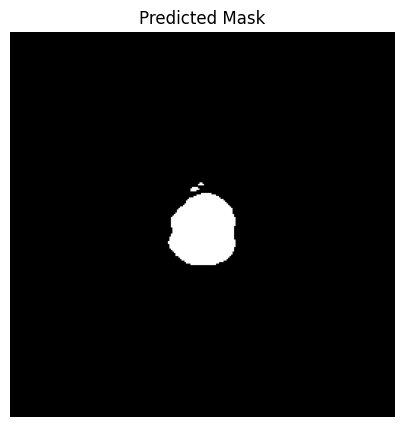

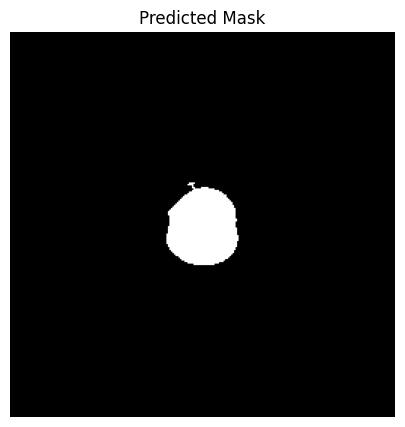

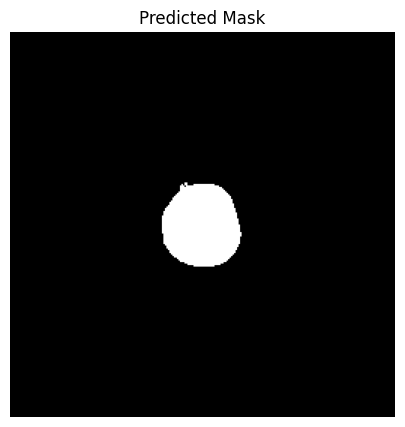

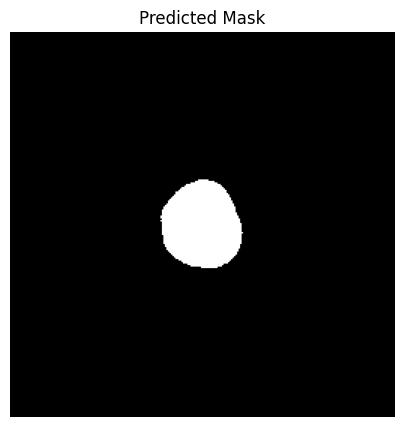

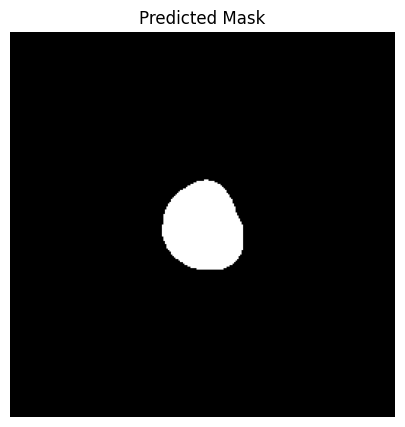

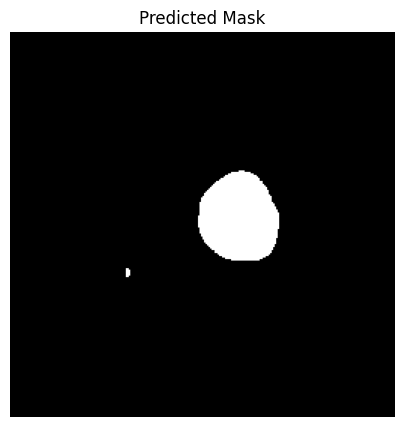

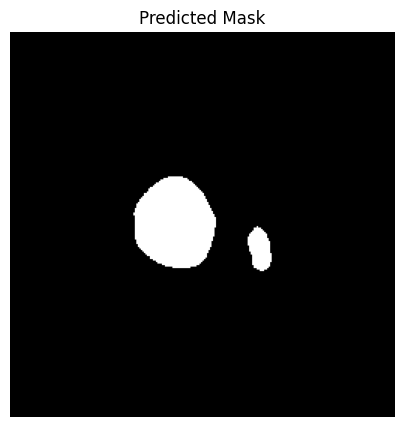

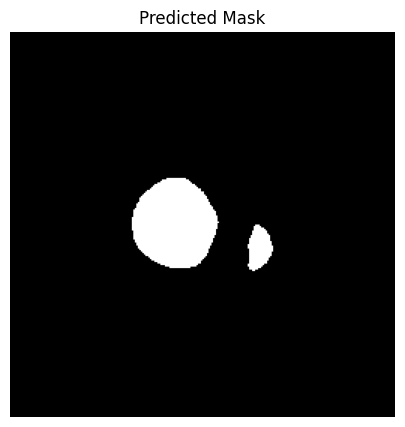

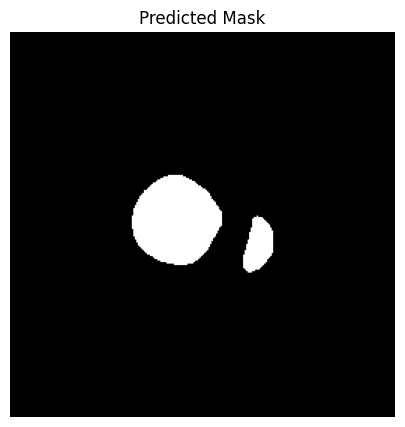

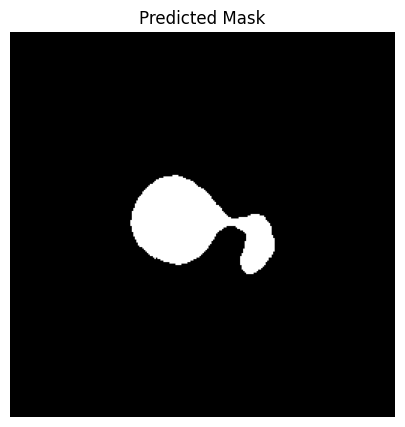

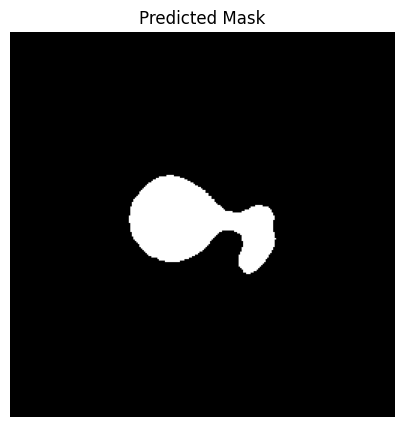

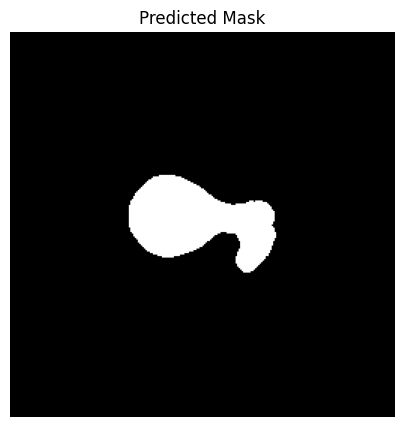

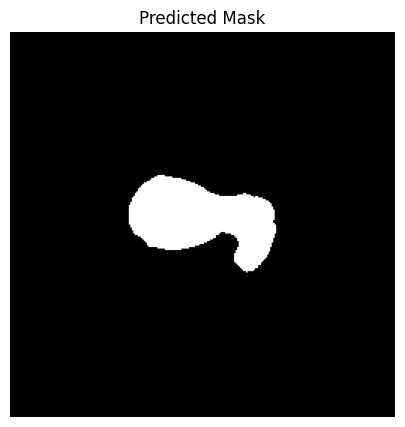

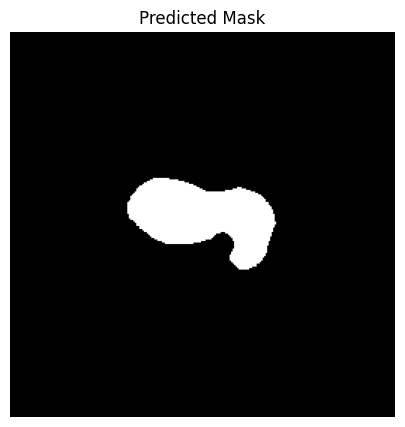

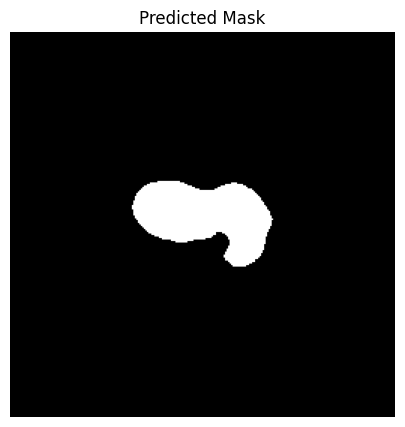

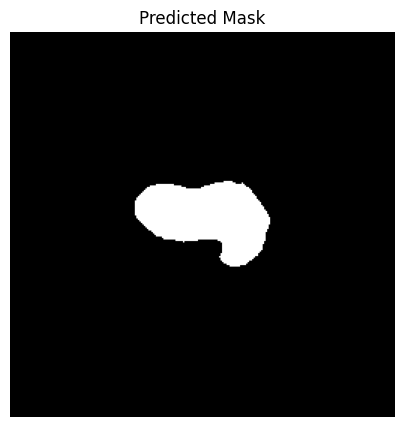

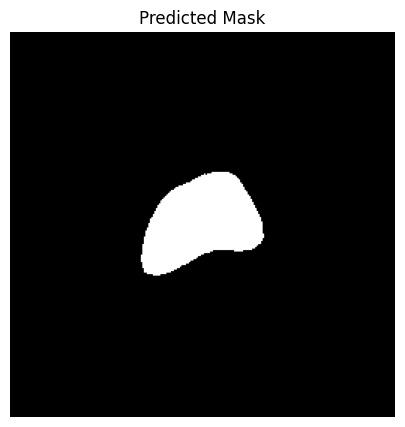

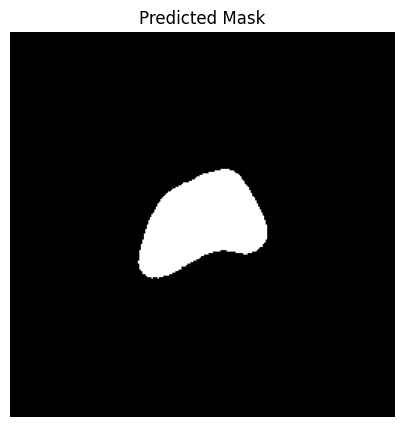

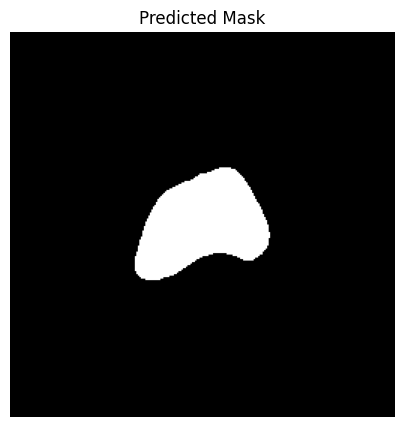

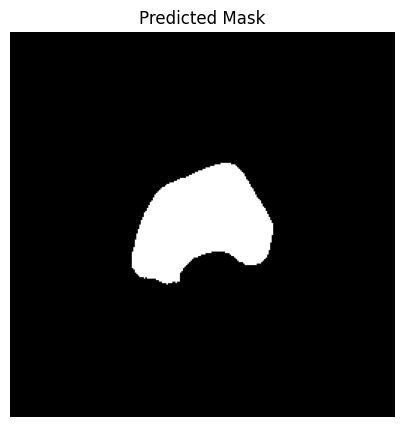

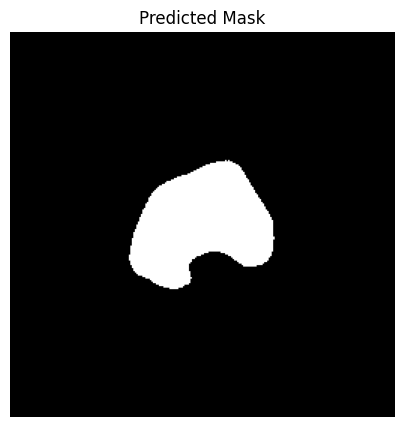

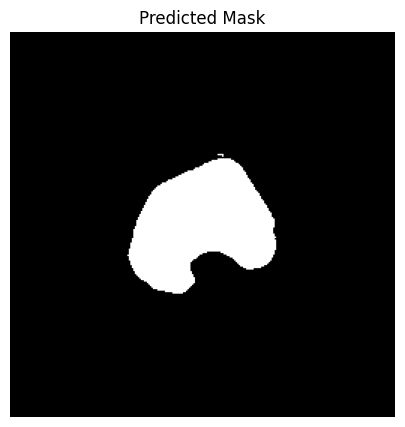

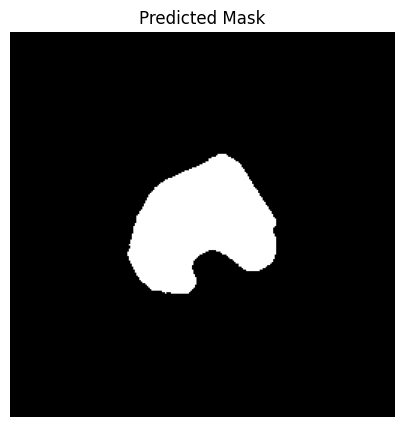

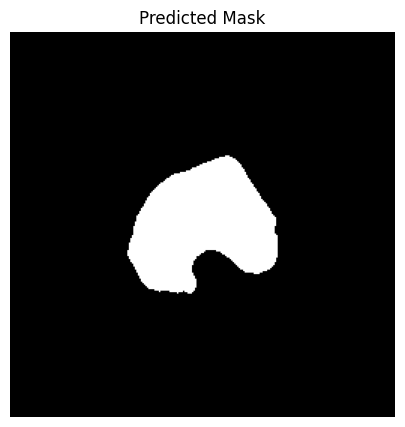

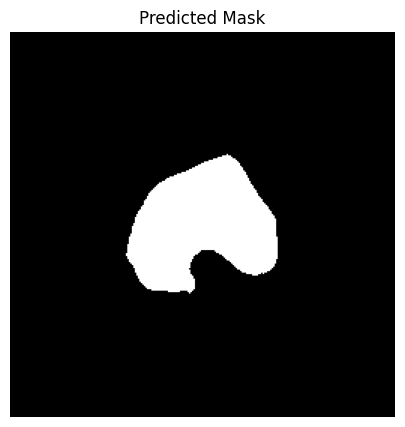

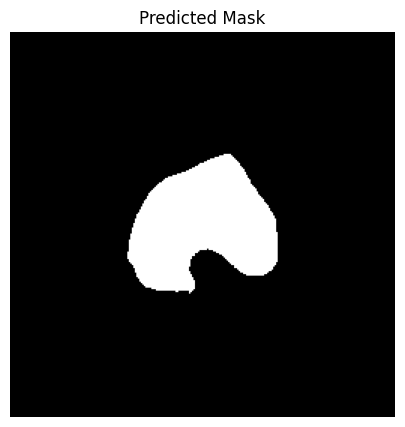

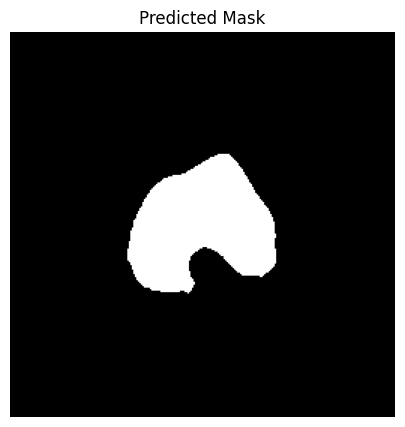

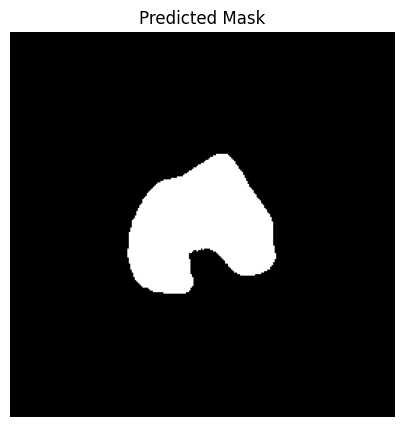

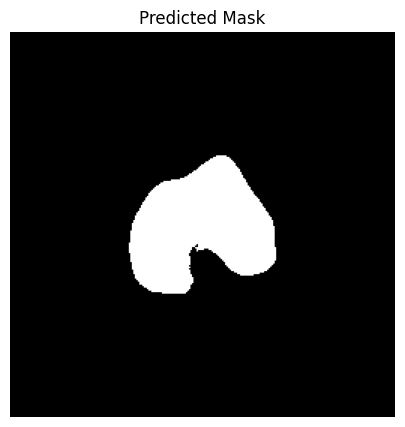

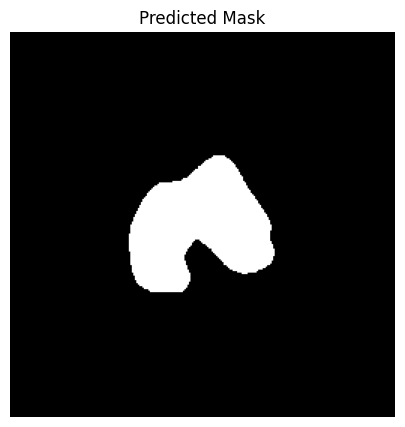

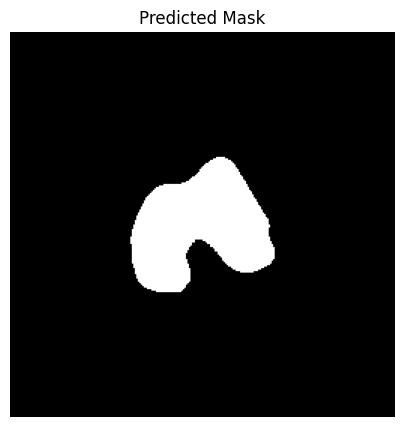

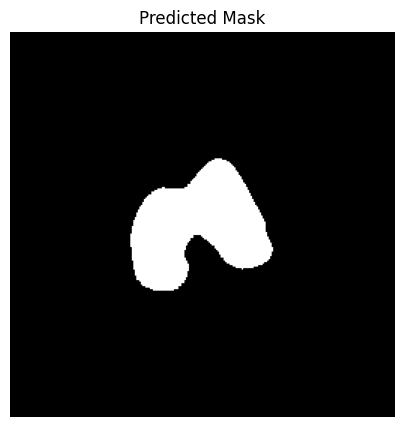

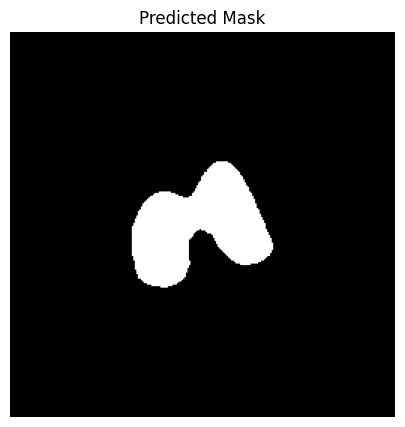

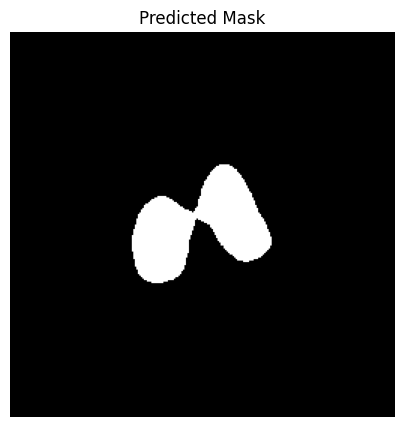

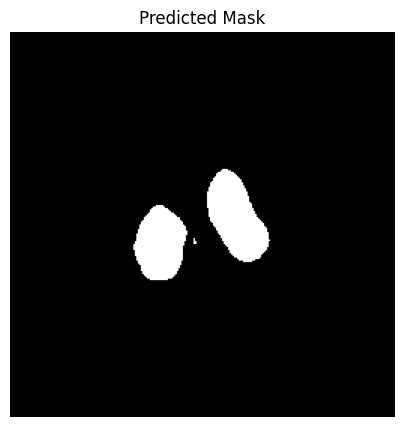

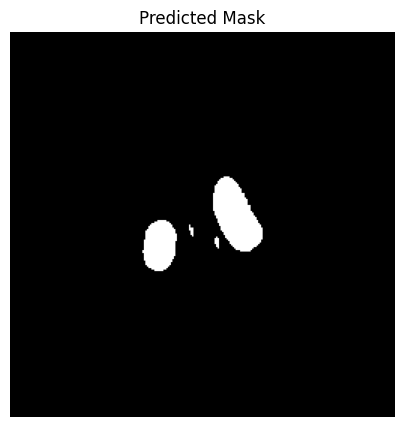

In [60]:
for i in range(40):
  index = 319 - i
  plot_single_image(test_dl, model, torch.device('cuda'), index)

In [61]:
volume_similarities,vol_sim_abs, miou_test, dicescores, execution_time, list_mioU3D,list_dice3D = calculate_results(model,test_dl )

print_results(miou_test,dicescores,volume_similarities,vol_sim_abs,execution_time,list_mioU3D,list_dice3D)

100%|██████████| 320/320 [00:07<00:00, 41.38it/s]


The MIOU for the segmentation over the test set resulted in:
0.911  +\-  0.099

The MIOU 3D for the segmentation over the test set resulted in:
0.932  +\-  0.016

The Dicescore for the segmentation over the test set resulted in:
0.95  +\-  0.075

The Dicescore 3D for the segmentation over the test set resulted in:
0.964  +\-  0.009

The volume similarity for the segmentation over the test set resulted in:
1.018  +\-  0.017

The volume similarity abs for the segmentation over the test set resulted in:
0.979  +\-  0.012


The time needed for the segmentation of 8 3D images is:
7.8 seconds.
